# Header

In [2]:
from utils import *
from scipy.stats import pearsonr, spearmanr
from sklearn.decomposition import PCA
import pickle as pkl
from glob import glob
import forestplot as fp
from statannotations.Annotator import Annotator

def join_with_linebreaks(words):
    modified_words = [word if i%3 != 0 and (i<len(words)-1) else word + '\n' for i, word in enumerate(words)]
    
#     modified_words = [word if i==0 else word.capitalize() for i,word in enumerate(modified_words)]
    
    return ' '.join(modified_words)

In [3]:
sns.set(style='white', font_scale=1)
plt.rcParams['figure.dpi'] = 300  # set default dpi to 300

## Correlation

In [3]:
dat1 = pd.read_excel('../data/vectra/vectra_v1.xlsx', sheet_name='vectra_v1')
dat2 = pd.read_csv('../data/raw/Meta_BulkRNAseqCohort_updated.csv')#pd.read_excel('../data/vectra/vectra_v1.xlsx', sheet_name='patient', index_col=0)

dat = pd.merge(dat2,dat1, left_on='Sample ID', right_on='Slide ID')
dat

Patient ID   Sample ID Tumor type  Age at diagnosis   Race  Postmenopausal  \
0   TP17_M510  PBC_PR_758        ILC                44  White               0   
1   TP17_M510  PBC_PR_758        ILC                44  White               0   
2   TP17_M510  PBC_PR_758        ILC                44  White               0   
3   TP17_M510  PBC_PR_758        ILC                44  White               0   
4   TP17_M510  PBC_PR_758        ILC                44  White               0   
..        ...         ...        ...               ...    ...             ...   
92  TP18_M403  PBC_PR_771        ILC                67  White               1   
93  TP18_M403  PBC_PR_771        ILC                67  White               1   
94  TP18_M403  PBC_PR_771        ILC                67  White               1   
95  TP18_M403  PBC_PR_771        ILC                67  White               1   
96  TP18_M403  PBC_PR_771        ILC                67  White               1   

    Pathological grade Pathological stage  Ki67  ER   ...  \
0                    2                 1A    15    1  ...   
1                    2                 1A    15    1  ...   
2                    2                 1A    15    1  ...   
3                    2                 1A    15    1  ...   
4                    2                 1A    15    1  ...   
..                 ...                ...   ...  ...  ...   
92                   1                 1A     1    1  ...   
93                   1                 1A     1    1  ...   
94                   1                 1A     1    1  ...   
95                   1                 1A     1    1  ...   
96                   1                 1A     1    1  ...   

    Stromal CD4 T cells Stromal CD8 T cells  Stromal Treg cells  \
0           1445.530589          127.946168            7.311210   
1           1454.560435          387.288711           10.282001   
2            561.699570          234.587357            0.000000   
3           1034.642032          307.693544           12.595642   
4            644.698879          140.963099           18.656881   
..                  ...                 ...                 ...   
92           225.867078           91.229699            8.828681   
93           370.547126          500.730778            2.540169   
94           459.051417          296.760512            5.667301   
95            73.963500           14.917008            0.000000   
96             0.000000           19.569550            0.000000   

   Stromal Macrophages Tumor B cells  Tumor CD4 T cells  Tumor CD8 T cells  \
0           428.227992     44.145958          30.902171           3.433575   
1          1104.286928      2.099531           9.237934           2.099531   
2           725.050975      6.438246          17.475240           4.138873   
3           714.352847      0.000000          50.910054          10.717906   
4           842.669113      4.273107          76.559841          12.819322   
..                 ...           ...                ...                ...   
92          447.319815      0.000000          45.406179          19.586979   
93         2684.640917      0.000000           0.000000           0.000000   
94          509.541921      0.000000           0.000000           0.000000   
95          415.190065      0.000000           0.000000           0.000000   
96           77.127052      0.000000          35.652580           0.000000   

    Tumor Treg cells  Tumor Macrophages  Tumor PanCK cells  
0           0.000000          98.592640        4514.169488  
1           0.839812         122.192678        3987.008507  
2           0.000000          58.404092        4351.334822  
3           2.679477         219.717073        5133.341081  
4           0.000000         399.535542        3477.241151  
..               ...                ...                ...  
92          2.225793         162.037738        4375.464097  
93          0.000000        2544.051463        2228.080271  
94    

In [4]:
sel_cols = [
'Stromal B cells','Stromal CD4 T cells','Stromal CD8 T cells','Stromal Treg cells','Stromal Macrophages',
'Tumor B cells','Tumor CD4 T cells','Tumor CD8 T cells','Tumor Treg cells','Tumor Macrophages',
]

for i, pt in enumerate(dat['Patient ID'].unique()):
    temp = dat[dat['Patient ID']==pt][sel_cols]
    med = pd.DataFrame(temp.median(axis=0), columns=[pt])
    out = med if i==0 else out.join(med)
    
X1 = out.T
X1

Stromal B cells  Stromal CD4 T cells  Stromal CD8 T cells  \
TP17_M510       409.545112           936.798085           271.140450   
TP17_M802        39.246455           831.990124           526.255345   
TP17_M882        18.866986          1345.109066          1266.781240   
TP18_M95          2.836019           854.540233           961.831527   
TP18_M121        21.207763           368.380739           368.886551   
TP18_M202         6.162910           295.826137           151.235180   
TP18_M251        42.631332           517.338341           139.549327   
TP18_M278       208.913351           261.281870           172.023878   
TP18_M302       353.489236           734.849739           187.346072   
TP18_M329        64.895636           902.530032           604.311556   
TP18_M355         1.023019            75.759910            23.942933   
TP18_M372       474.199144           693.029948           338.400987   
TP18_M403        11.334603           225.867078            91.229699   

           Stromal Treg cells  Stromal Macrophages  Tumor B cells  \
TP17_M510           15.626261           906.234462       3.186319   
TP17_M802           47.503077          1659.711156       0.000000   
TP17_M882           57.753448          1620.112984       0.000000   
TP18_M95             5.672038          1227.523639       0.000000   
TP18_M121           22.380845           448.903905       0.000000   
TP18_M202           18.983495           380.619084       0.000000   
TP18_M251          146.759426          1512.282142       0.000000   
TP18_M278            4.787422           279.185145       0.000000   
TP18_M302           12.000347           454.035063       0.000000   
TP18_M329           29.569828           639.178956       0.000000   
TP18_M355            5.517067           364.854602       0.000000   
TP18_M372           11.516980           479.437684       8.967411   
TP18_M403            3.145313           386.521121       0.000000   

           Tumor CD4 T cells  Tumor CD8 T cells  Tumor Treg cells  \
TP17_M510          43.349718           8.474431          1.759644   
TP17_M802         181.931795          28.241975         15.503423   
TP17_M882         303.787599         165.844109         21.896182   
TP18_M95           54.160049          45.226433          0.000000   
TP18_M121          38.710649          26.205744          0.000000   
TP18_M202          18.370207          16.569206          1.080600   
TP18_M251          38.516379           9.823408         21.468145   
TP18_M278          49.610500          27.527116          0.000000   
TP18_M302          14.833961           5.711385          0.000000   
TP18_M329         147.507060         130.311280         13.404322   
TP18_M355           6.368833           8.697501          0.000000   
TP18_M372          73.352942          33.806139          4.483706   
TP18_M403           4.967195           0.000000          0.000000   

           Tumor Macrophages  
TP17_M510         213.366027  
TP17_M802        1034.484941  
TP17_M882        1866.607815  
TP18_M95          368.833014  
TP18_M121         228.097321  
TP18_M202         108.243169  
TP18_M251         410.883348  
TP18_M278         151.788117  
TP18_M302         217.270737  
TP18_M329         243.075707  
TP18_M355         122.702672  
TP18_M372         258.329927  
TP18_M403         100.710151

In [5]:
tpm = pd.read_csv('../data/gex/tpm.csv', index_col=0)

tpm_sel = tpm[X1.index]
tpm_sel = tpm_sel[~tpm_sel.index.duplicated(keep='first')].T

X2 = np.log2(tpm_sel+1) # here changed to log2(TPM+1)
X2

A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1     A2ML1  A2MP1  \
TP17_M510  1.523219  2.398769  0.000000  8.734121  2.518463  0.000000    0.0   
TP17_M802  2.424640  2.334086  0.000000  7.502509  1.582095  0.000000    0.0   
TP17_M882  2.966162  3.224735  0.000000  9.227753  0.496362  0.000000    0.0   
TP18_M95   0.000000  1.872103  0.000000  6.761360  0.000000  0.000000    0.0   
TP18_M121  2.727257  3.068021  0.000000  8.872379  1.261132  0.192075    0.0   
TP18_M202  2.788187  2.855826  0.000000  8.988377  1.830079  0.187708    0.0   
TP18_M251  2.826528  2.614345  0.000000  6.077874  0.952788  0.000000    0.0   
TP18_M278  3.008932  2.738704  0.000000  8.742116  1.440054  0.000000    0.0   
TP18_M302  2.571447  2.652085  0.000000  9.203274  1.704346  0.030579    0.0   
TP18_M329  2.000544  2.117141  0.000000  8.893812  3.152484  0.000000    0.0   
TP18_M355  2.530896  2.279173  0.068374  9.074924  1.886048  0.060902    0.0   
TP18_M372  2.264661  2.657595  0.000000  7.849310  2.775250  0.482666    0.0   
TP18_M403  2.367799  2.810131  0.000000  9.413291  2.512127  0.000000    0.0   

            A3GALT2    A4GALT     A4GNT  ...    ZWILCH     ZWINT      ZXDA  \
TP17_M510  0.265709  4.097531  0.000000  ...  4.493446  2.945968  2.348975   
TP17_M802  0.149657  3.247735  0.000000  ...  4.383150  2.840337  2.387637   
TP17_M882  0.000000  4.246992  0.000000  ...  5.060798  3.551247  2.801407   
TP18_M95   0.000000  2.731992  0.000000  ...  3.287518  4.093722  0.998743   
TP18_M121  0.922853  4.417566  0.000000  ...  3.949713  2.236765  3.099739   
TP18_M202  0.789478  3.801417  0.000000  ...  3.795435  2.624483  2.868038   
TP18_M251  0.454600  3.410893  0.000000  ...  5.029259  3.783879  3.089899   
TP18_M278  2.025736  4.107317  0.000000  ...  4.224008  2.887418  2.907554   
TP18_M302  0.836820  3.330721  0.175990  ...  4.129028  2.313891  2.983646   
TP18_M329  0.000000  4.069510  0.000000  ...  4.378768  2.872049  2.714773   
TP18_M355  1.012343  3.224259  0.177051  ...  4.398136  2.391635  2.642316   
TP18_M372  0.401032  3.345840  0.127703  ...  4.321867  2.811799  3.037884   
TP18_M403  0.269342  3.503139  0.559992  ...  4.214704  2.786371  2.107240   

               ZXDB      ZXDC    ZYG11A    ZYG11B       ZYX     ZZEF1  \
TP17_M510  2.960415  3.817546  2.165918  3.713691  6.545415  5.774502   
TP17_M802  3.617900  4.022356  2.864629  3.708400  6.941980  5.077072   
TP17_M882  3.471453  3.896493  2.420280  4.101867  6.224268  6.002235   
TP18_M95   3.813326  3.749869  2.890128  3.648782  5.886622  5.735042   
TP18_M121  3.296560  4.287045  1.975474  3.839921  7.234875  6.182299   
TP18_M202  2.988098  4.240153  1.456700  3.859503  7.320415  5.801989   
TP18_M251  3.477846  4.196605  2.479732  3.748953  5.004023  5.514936   
TP18_M278  3.115966  4.269861  2.998234  3.893906  7.584991  6.069950   
TP18_M302  3.529531  4.149610  2.464400  3.861117  7.077507  6.033967   
TP18_M329  2.572785  3.766056  0.125401  3.599680  6.949685  5.563480   
TP18_M355  3.504471  3.790341  1.746386  4.105753  7.021889  5.598284   
TP18_M372  3.301713  3.942088  2.130022  3.574261  6.570453  5.857766   
TP18_M403  3.152188  3.711113  1.981792  3.967952  7.243348  5.556116   

               ZZZ3  
TP17_M510  4.977575  
TP17_M802  5.237180  
TP17_M882  5.334426  
TP18_M95   5.964778  
TP18_M121  5.503065  
TP18_M202  5.623460  
TP18_M251  5.014077  
TP18_M278  5.443604  
TP18_M302  5.608336  
TP18_M329  5.114282  
TP18_M355  5.884013  
TP18_M372  5.466236  
TP18_M403  5.332537  

[13 rows x 26485 columns]

In [6]:
# 1min
from scipy.stats import spearmanr

corrs, pvals, names = [],[],[]

for name1 in X1.columns:
    for name2 in X2.columns:
        res = spearmanr(X1[name1].values, X2[name2].values)
        name_mg = f'{name1}_{name2}'
        names.append(name_mg)
        corrs.append(res.correlation)
        pvals.append(res.pvalue)
        
from statsmodels.stats.multitest import multipletests
_,fdr,_,_ = multipletests(pvals, method='fdr_bh')

corr_result = pd.DataFrame({'interaction':names, 'spearmanr':corrs,'pvals':pvals}).dropna()
corr_result

interaction  spearmanr     pvals
0           Stromal B cells_A1BG  -0.071429  0.816628
1       Stromal B cells_A1BG-AS1   0.016484  0.957376
2           Stromal B cells_A1CF  -0.462910  0.111173
3            Stromal B cells_A2M  -0.263736  0.383937
4        Stromal B cells_A2M-AS1   0.384615  0.194413
...                          ...        ...       ...
264845  Tumor Macrophages_ZYG11A   0.428571  0.143971
264846  Tumor Macrophages_ZYG11B  -0.428571  0.143971
264847     Tumor Macrophages_ZYX  -0.763736  0.002377
264848   Tumor Macrophages_ZZEF1  -0.142857  0.641516
264849    Tumor Macrophages_ZZZ3  -0.241758  0.426176

[216490 rows x 3 columns]

In [8]:
from statsmodels.stats.multitest import multipletests
_,fdr,_,_ = multipletests(corr_result['pvals'].values, method='fdr_bh')
corr_result['FDR'] = fdr

corr_result['cell'] = [x.split('_')[0] for x in corr_result['interaction']]
corr_result['gene'] = [x.split('_')[1] for x in corr_result['interaction']]

corr_result

interaction  spearmanr     pvals       FDR  \
0           Stromal B cells_A1BG  -0.071429  0.816628  0.952306   
1       Stromal B cells_A1BG-AS1   0.016484  0.957376  0.989872   
2           Stromal B cells_A1CF  -0.462910  0.111173  0.583020   
3            Stromal B cells_A2M  -0.263736  0.383937  0.812425   
4        Stromal B cells_A2M-AS1   0.384615  0.194413  0.673953   
...                          ...        ...       ...       ...   
264845  Tumor Macrophages_ZYG11A   0.428571  0.143971  0.634665   
264846  Tumor Macrophages_ZYG11B  -0.428571  0.143971  0.634665   
264847     Tumor Macrophages_ZYX  -0.763736  0.002377  0.155208   
264848   Tumor Macrophages_ZZEF1  -0.142857  0.641516  0.908669   
264849    Tumor Macrophages_ZZZ3  -0.241758  0.426176  0.835335   

                     cell      gene  
0         Stromal B cells      A1BG  
1         Stromal B cells  A1BG-AS1  
2         Stromal B cells      A1CF  
3         Stromal B cells       A2M  
4         Stromal B cells   A2M-AS1  
...                   ...       ...  
264845  Tumor Macrophages    ZYG11A  
264846  Tumor Macrophages    ZYG11B  
264847  Tumor Macrophages       ZYX  
264848  Tumor Macrophages     ZZEF1  
264849  Tumor Macrophages      ZZZ3  

[216490 rows x 6 columns]

In [9]:
corr_result.to_csv('../data_rebuttal/corr/spearmanr_pairwise.csv')

In [29]:
corr1 = pd.read_csv('../data/corr/spearmanr_pairwise.csv', index_col=0)
corr2 = pd.read_csv('../data_rebuttal/corr/spearmanr_pairwise.csv', index_col=0)
corr2 = corr2.astype(corr1.dtypes)

comparison = corr1.compare(corr2)
differences = comparison.dropna()

differences # no difference

Empty DataFrame
Columns: []
Index: []

## Corr coef

In [4]:
corr_result = pd.read_csv('../data_rebuttal/corr/spearmanr_pairwise.csv', index_col=0)
corr_result

interaction  spearmanr     pvals       FDR  \
0           Stromal B cells_A1BG  -0.071429  0.816628  0.952306   
1       Stromal B cells_A1BG-AS1   0.016484  0.957376  0.989872   
2           Stromal B cells_A1CF  -0.462910  0.111173  0.583020   
3            Stromal B cells_A2M  -0.263736  0.383937  0.812425   
4        Stromal B cells_A2M-AS1   0.384615  0.194413  0.673953   
...                          ...        ...       ...       ...   
264845  Tumor Macrophages_ZYG11A   0.428571  0.143971  0.634665   
264846  Tumor Macrophages_ZYG11B  -0.428571  0.143971  0.634665   
264847     Tumor Macrophages_ZYX  -0.763736  0.002377  0.155208   
264848   Tumor Macrophages_ZZEF1  -0.142857  0.641516  0.908669   
264849    Tumor Macrophages_ZZZ3  -0.241758  0.426176  0.835335   

                     cell      gene  
0         Stromal B cells      A1BG  
1         Stromal B cells  A1BG-AS1  
2         Stromal B cells      A1CF  
3         Stromal B cells       A2M  
4         Stromal B cells   A2M-AS1  
...                   ...       ...  
264845  Tumor Macrophages    ZYG11A  
264846  Tumor Macrophages    ZYG11B  
264847  Tumor Macrophages       ZYX  
264848  Tumor Macrophages     ZZEF1  
264849  Tumor Macrophages      ZZZ3  

[216490 rows x 6 columns]

In [8]:
corr_result['spearmanr_abs'] = corr_result['spearmanr'].abs()

sel = corr_result[(corr_result['FDR']<0.05) & (corr_result['spearmanr_abs']>0.4)]
print(sel.shape)

sel['cell'] = [x.split('_')[0] for x in sel['interaction']]
sel['gene'] = [x.split('_')[1] for x in sel['interaction']]
sel['Correlation'] = ['Positive' if x>0 else 'Negative' if x<0 else 'None' for x in sel['spearmanr']]

Counter(sel['cell'])

(651, 7)


Counter({'Stromal B cells': 1,
         'Stromal CD4 T cells': 29,
         'Stromal CD8 T cells': 10,
         'Stromal Treg cells': 12,
         'Stromal Macrophages': 466,
         'Tumor B cells': 2,
         'Tumor CD4 T cells': 7,
         'Tumor CD8 T cells': 2,
         'Tumor Treg cells': 50,
         'Tumor Macrophages': 72})

In [11]:
min(sel['spearmanr_abs'])

0.8626373626373626

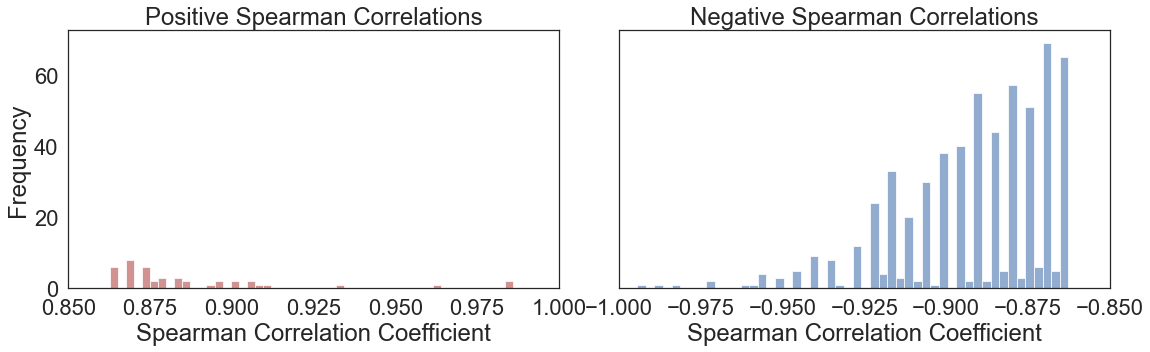

In [22]:
vlag_palette = sns.color_palette("vlag", as_cmap=False)
reddest_color = vlag_palette[-1]  # The last color in the palette (reddest)
bluest_color = vlag_palette[0]    # The first color in the palette (bluest)

# Split the data into positive and negative correlations
positive_corr = sel[sel['spearmanr'] > 0]['spearmanr']
negative_corr = sel[sel['spearmanr'] < 0]['spearmanr']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Plot positive correlations
sns.histplot(positive_corr, bins=50, color=reddest_color, ax=axs[0])
axs[0].set_title('Positive Spearman Correlations')
axs[0].set_xlabel('Spearman Correlation Coefficient')
axs[0].set_ylabel('Frequency')
axs[0].set_xlim(0.85,1)

# Plot negative correlations
sns.histplot(negative_corr, bins=50, color=bluest_color,ax=axs[1])
axs[1].set_title('Negative Spearman Correlations')
axs[1].set_xlabel('Spearman Correlation Coefficient')
axs[1].set_xlim(-1,-0.85)

# Show the plot
plt.tight_layout()
plt.show()

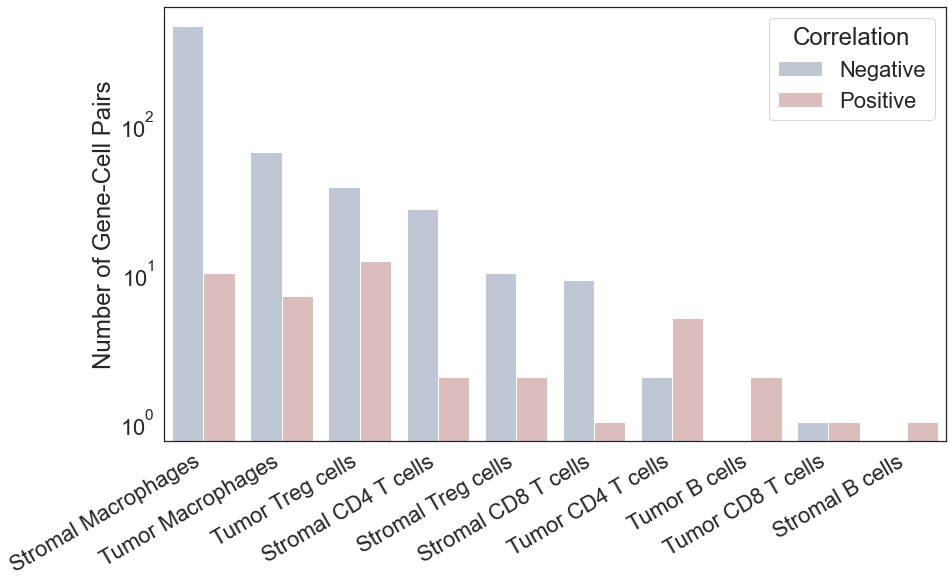

In [7]:
df_p = sel#[sel['spearmanr']>0]

sns.set(style='white', font_scale=2)

fig, ax = plt.subplots(figsize=(14,8))
g = sns.countplot(data=df_p, x='cell', 
                  order=df_p['cell'].value_counts().index, \
                  alpha=1, ax=ax, 
                  hue='Correlation', hue_order=['Negative','Positive'], palette='vlag')
g.set_yscale("log")

ax.set_xlabel('')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_ylabel('Number of Gene-Cell Pairs')

ax.legend(title='Correlation',loc='upper right', bbox_to_anchor=(1, 1))

## PAM50

PAM50              LumA  LumB  Her2  Basal  Normal
class_2c                                          
Non-proliferative   1.0   0.0   0.0    0.0     8.0
Proliferative       3.0   5.0   1.0    2.0     1.0


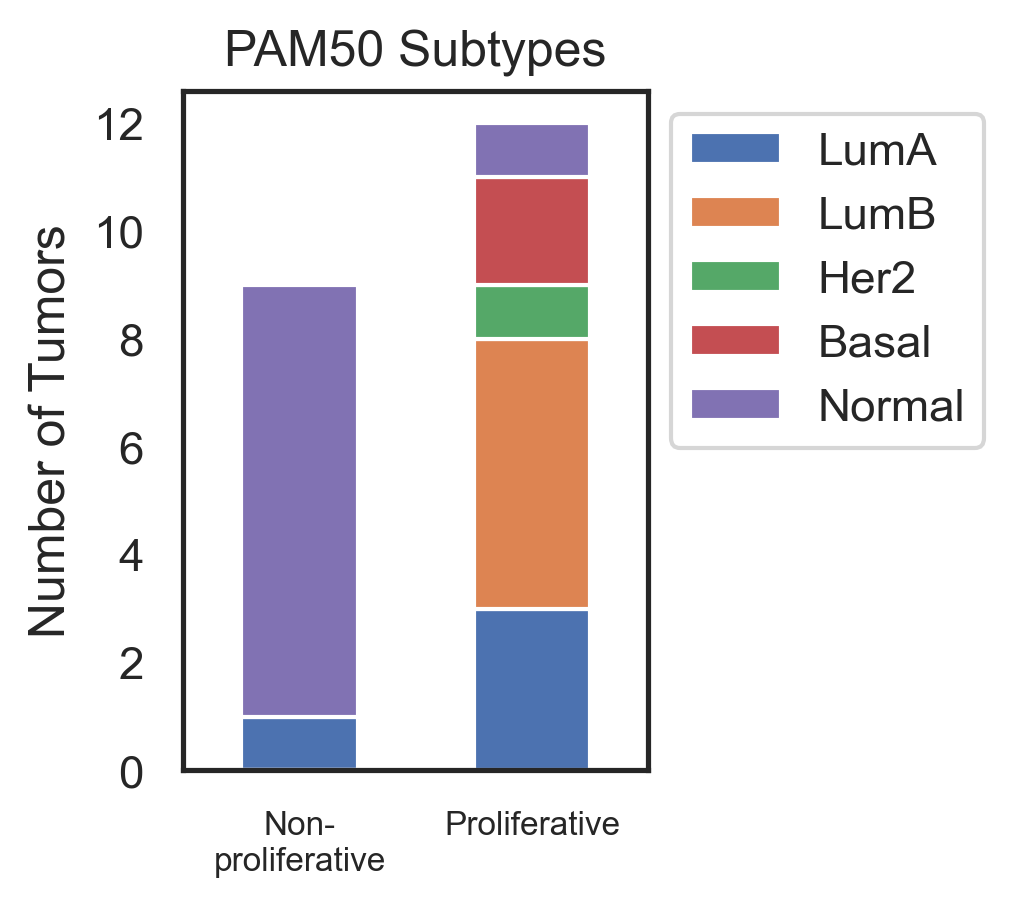

In [32]:
sns.set(style='white', font_scale=1)
plt.rcParams['figure.dpi'] = 300  # set default dpi to 300

df = pd.read_csv('../data/classifier/2_class_pam50.csv', index_col=0)
tbl = df.groupby(['class_2c', 'PAM50']).size().unstack().loc[:,['LumA','LumB','Her2','Basal','Normal']].fillna(0)

print(tbl)

sns.set(context='notebook', style='white', palette='deep', font='sans-serif', font_scale=1, color_codes=True)

fig, ax = plt.subplots(figsize=(2,3))

tbl.plot(kind='bar', stacked=True, ax=ax)
# ax.get_legend().remove()
ax.set_ylabel('Number of Tumors')
ax.set_xlabel('')
ax.set_xticklabels(['Non-\nproliferative', 'Proliferative'], fontsize=8, rotation=0, ha='center')

ax.set_title('PAM50 Subtypes')
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')


## Fig 2G, H y label

In [29]:
dat1 = pd.read_excel('../data/vectra/vectra_v1.xlsx', sheet_name='vectra_v1')
dat2 = pd.read_excel('../data/vectra/vectra_v1.xlsx', sheet_name='patient', index_col=0)

dat = pd.merge(dat2,dat1, on='Slide ID')
dat

Patient ID    Slide ID Tumor type  Age at diagnosis   Race  Postmenopausal  \
0   TP17_M510  PBC_PR_758        ILC               NaN    NaN             NaN   
1   TP17_M510  PBC_PR_758        ILC               NaN    NaN             NaN   
2   TP17_M510  PBC_PR_758        ILC               NaN    NaN             NaN   
3   TP17_M510  PBC_PR_758        ILC               NaN    NaN             NaN   
4   TP17_M510  PBC_PR_758        ILC               NaN    NaN             NaN   
..        ...         ...        ...               ...    ...             ...   
92   TP18_M95  PBC_PR_762        ILC              68.0  White             1.0   
93   TP18_M95  PBC_PR_762        ILC              68.0  White             1.0   
94   TP18_M95  PBC_PR_762        ILC              68.0  White             1.0   
95   TP18_M95  PBC_PR_762        ILC              68.0  White             1.0   
96   TP18_M95  PBC_PR_762        ILC              68.0  White             1.0   

    Pathological grade           Pathological stage  Pathological stage brief  \
0                  NaN                          NaN                       NaN   
1                  NaN                          NaN                       NaN   
2                  NaN                          NaN                       NaN   
3                  NaN                          NaN                       NaN   
4                  NaN                          NaN                       NaN   
..                 ...                          ...                       ...   
92                 2.0  1A                                                1.0   
93                 2.0  1A                                                1.0   
94                 2.0  1A                                                1.0   
95                 2.0  1A                                                1.0   
96                 2.0  1A                                                1.0   

    Ki67  ...  Stromal CD4 T cells  Stromal CD8 T cells Stromal Treg cells  \
0    NaN  ...          1445.530589           127.946168           7.311210   
1    NaN  ...          1454.560435           387.288711          10.282001   
2    NaN  ...           561.699570           234.587357           0.000000   
3    NaN  ...          1034.642032           307.693544          12.595642   
4    NaN  ...           644.698879           140.963099          18.656881   
..   ...  ...                  ...                  ...                ...   
92   NaN  ...          1513.488907          1606.604871           5.672038   
93   NaN  ...           296.088415           625.615974           0.000000   
94   NaN  ...          1263.241173          1732.243026          22.978734   
95   NaN  ...           173.931845           297.547691           0.000000   
96   NaN  ...          1127.528270          1075.627016           6.355256   

    Stromal Macrophages Tumor B cells  Tumor CD4 T cells Tumor CD8 T cells  \
0            428.227992     44.145958          30.902171          3.433575   
1           1104.286928      2.099531           9.237934          2.099531   
2            725.050975      6.438246          17.475240          4.138873   
3            714.352847      0.000000          50.910054         10.717906   
4            842.669113      4.273107          76.559841         12.819322   
..                  ...           ...                ...               ...   
92          1227.523639      0.000000          28.190133         30.662952   
93          1944.942177      1.569522          60.688200        103.065304   
94          1610.868175      0.000000         145.975154        186.244162   
95          1993.383177      0.000000          38.695597         38.695597   
96          1092.044759      0.000000          58.102074         38.279014   

    Tumor Treg cells  Tumor Macrophages  Tumor PanCK cells  
0           0.000000          98.592640        4514.169488  
1           0.839812         122.192678        3987.008507  


In [30]:
meta = pd.read_csv('../data/classifier/2_class_pam50.csv', index_col=0)
meta['Patient ID'] = meta.index
meta['ILC Subtype'] = meta['class_2c']
meta

PAM50     ADH1B     ADH1C   ALDH1L1    AQP7P1     BBOX1   C2orf40  \
TP17_M605  Normal  2.216732  2.243131  3.057598  4.052967  0.086482  0.532357   
TP18_M403  Normal  0.933985  0.902377 -0.642738  1.732441  0.390396  0.222004   
TP17_M383    Her2  0.447186  0.403479 -0.249879  0.766307 -1.139162 -0.897606   
TP18_M202  Normal  0.567718  1.100668 -0.249642 -0.151507  0.059297  0.227326   
TP18_M355  Normal  0.672538  1.513375 -0.648330  0.595814 -0.714074 -0.218622   
TP17_M510    LumB  0.830330  0.131490  0.100744  0.155720  0.828979 -1.804247   
TP17_M802    LumA  0.375887 -0.585520 -0.570657 -0.759950 -0.164619 -1.804247   
TP17_M882    LumB -0.542579 -0.717786 -1.241718 -0.937231 -1.247996 -1.238878   
TP18_M329   Basal -0.073613  0.744683 -0.938536  1.020368  0.408761 -1.155406   
TP17_M378    LumB -2.450577 -1.509660 -1.550600 -0.695033 -1.544119 -1.804247   
TP17_M384    LumA  0.150357  0.363820 -0.256393 -0.254560 -1.544119 -1.215822   
TP17_M559    LumA  0.735329  1.052076  0.226357  0.030718 -1.487956 -0.691991   
TP18_M121  Normal  1.088317  0.974793  0.812011  1.338709  0.331189  0.450679   
TP18_M278  Normal  0.817529  0.929124  0.447646  0.855444  0.324414 -0.611650   
TP18_M302  Normal  1.079029  1.562837  0.335068  0.838566  0.187715  0.648315   
TP18_M372    LumA -0.352259 -0.371564 -0.970231 -0.562181 -1.213064 -0.529141   
TP18_M95     LumB  0.086025 -0.727389 -1.550600 -0.937231 -1.544119 -1.804247   
TP18_M251    LumB -0.630991 -1.735907 -1.208298 -0.875797 -1.544119 -1.673275   
TP17_M622   Basal -0.144736 -0.833726 -1.031509 -0.025977  0.290788 -1.729581   
TP17_M899  Normal  0.255436  0.776637 -0.858541 -0.801629 -0.156329  0.128473   
TP17_M901  Normal  2.277764  5.380004  4.144805  1.012687  1.492712 -1.107871   

              CAPN6   CD300LG    CHRDL1  ...     STX11  TMEM132C      TNMD  \
TP17_M605  1.635425  2.176191  2.184944  ...  2.059167  3.019646  2.782020   
TP18_M403  0.388856  0.012006  0.673717  ...  0.553468  0.711447 -1.259790   
TP17_M383  0.244929  0.147138  0.256099  ... -1.536797  0.864486 -0.091378   
TP18_M202  0.811840 -0.355994  0.515171  ...  0.201882  0.153577 -0.387166   
TP18_M355  0.809317 -1.017934  1.021178  ... -0.277383  0.553212  0.780105   
TP17_M510 -1.384409 -0.256367  0.310411  ... -1.502332 -0.776591 -1.069007   
TP17_M802 -1.423712 -1.417968 -0.897053  ... -1.074886 -0.912153 -0.229906   
TP17_M882 -1.583364 -1.391339 -0.740829  ... -0.939527 -0.877570 -0.577537   
TP18_M329 -0.481491 -0.378645  0.249028  ...  0.658627 -0.887453  0.193058   
TP17_M378 -1.591658 -1.417968 -2.025407  ... -2.432829 -1.587066 -1.259790   
TP17_M384 -0.657944 -0.720590 -0.251579  ... -1.632126  0.038893 -0.194731   
TP17_M559 -0.239150  0.112307  0.887136  ...  0.519854 -0.171419 -1.042415   
TP18_M121  0.868007  0.035689  1.103727  ...  0.025477  1.094350  0.819268   
TP18_M278  0.904911 -0.566758  1.417727  ...  0.227547  0.918322 -0.941454   
TP18_M302  0.787776 -0.098492  0.613780  ... -0.484489  0.480602  0.190383   
TP18_M372 -1.012996 -1.323841 -0.355782  ... -0.595131 -0.788806 -0.844217   
TP18_M95  -1.059795 -1.417968 -1.536918  ... -2.046498 -1.637376 -1.259790   
TP18_M251 -1.382902 -1.395454 -2.018669  ... -2.174944 -1.194575 -1.259790   
TP17_M622 -0.883408 -0.434175  0.063856  ... -1.588676 -0.731844  0.972610   
TP17_M899  0.992113 -0.990553  0.671751  ... -1.628143  0.377553 -0.476405   
TP17_M901 -0.745519 -0.789767 -0.713734  ... -1.060206 -0.900982 -1.194036   

               TNXB      TP63  pred  dataset           class_2c  Patient ID  \
TP17_M605  3.840547  0.161899     1      ILC  Non-proliferative   TP17_M605   
TP18_M403  2.591020 -0.545052     1      ILC  Non-proliferative   TP18_M403   
TP17_M383  1.674882 -0.475650     2      ILC      Proliferative   TP17_M383   
TP18_M202  2.466430  0.299445     0      ILC  Non-proliferative   TP18_M202   
TP18_M355  2.808701 -0.044340     1      ILC  Non-proliferative   TP18_M355   
TP17_M510  1.392548  0.065155     2   

In [31]:
mg = pd.merge(meta, dat[[x for x in dat.columns if (x.startswith('Stromal') or x.startswith('Tumor')) or x=='Patient ID']], on='Patient ID')
mg

PAM50     ADH1B     ADH1C   ALDH1L1    AQP7P1     BBOX1   C2orf40  \
0   Normal  0.933985  0.902377 -0.642738  1.732441  0.390396  0.222004   
1   Normal  0.933985  0.902377 -0.642738  1.732441  0.390396  0.222004   
2   Normal  0.933985  0.902377 -0.642738  1.732441  0.390396  0.222004   
3   Normal  0.933985  0.902377 -0.642738  1.732441  0.390396  0.222004   
4   Normal  0.933985  0.902377 -0.642738  1.732441  0.390396  0.222004   
..     ...       ...       ...       ...       ...       ...       ...   
92    LumB -0.630991 -1.735907 -1.208298 -0.875797 -1.544119 -1.673275   
93    LumB -0.630991 -1.735907 -1.208298 -0.875797 -1.544119 -1.673275   
94    LumB -0.630991 -1.735907 -1.208298 -0.875797 -1.544119 -1.673275   
95    LumB -0.630991 -1.735907 -1.208298 -0.875797 -1.544119 -1.673275   
96    LumB -0.630991 -1.735907 -1.208298 -0.875797 -1.544119 -1.673275   

       CAPN6   CD300LG    CHRDL1  ...  Stromal CD4 T cells  \
0   0.388856  0.012006  0.673717  ...            68.882352   
1   0.388856  0.012006  0.673717  ...           261.461733   
2   0.388856  0.012006  0.673717  ...            90.744066   
3   0.388856  0.012006  0.673717  ...           271.221296   
4   0.388856  0.012006  0.673717  ...           225.867078   
..       ...       ...       ...  ...                  ...   
92 -1.382902 -1.395454 -2.018669  ...           246.381676   
93 -1.382902 -1.395454 -2.018669  ...           874.245312   
94 -1.382902 -1.395454 -2.018669  ...           135.841314   
95 -1.382902 -1.395454 -2.018669  ...           563.477553   
96 -1.382902 -1.395454 -2.018669  ...           408.881678   

    Stromal CD8 T cells  Stromal Treg cells  Stromal Macrophages  \
0             46.865162            3.145313           187.775180   
1            132.620952            8.190368           253.586380   
2             45.267248            4.610553           167.866043   
3            164.538184            0.000000           386.521121   
4             91.229699            8.828681           447.319815   
..                  ...                 ...                  ...   
92            90.725382          220.587204          2229.887586   
93           590.014556           72.741521           514.578905   
94            11.393143          130.582941          2226.044766   
95           139.549327           91.272803           572.529401   
96           102.381397           65.678632           773.333694   

    Tumor B cells  Tumor CD4 T cells  Tumor CD8 T cells  Tumor Treg cells  \
0        0.000000           4.967195           0.000000          0.000000   
1        0.000000          26.619176          13.091398          0.000000   
2        0.000000           0.000000           9.025910          0.000000   
3        0.000000          97.360350          69.798780          0.000000   
4        0.000000          45.406179          19.586979          2.225793   
..            ...                ...                ...               ...   
92       1.469839          24.987260           0.000000         20.577743   
93       0.000000         270.364164          85.706219         42.853110   
94       0.000000          30.374148           4.925537         20.523073   
95       0.000000          17.644210           0.000000         17.644210   
96       0.000000         113.955928          34.507781         11.235092   

    Tumor Macrophages  Tumor PanCK cells  
0           78.765519        2290.586450  
1          246.991047        4333.689199  
2          100.710151        4750.478830  
3           41.879268        3340.677003  
4          162.037738        4375.464097  
..                ...                ...  
92         555.599069        6897.953521  
93         113.755527        6759.104089  
94         640.319871        7252.033002  
95         186.524502        7496.268495  
96         410.883348        7313.242082  

[97 rows x 75 columns]

In [32]:
immune_cells = ['Stromal B cells', 'Stromal CD4 T cells',
       'Stromal CD8 T cells', 'Stromal Treg cells', 'Stromal Macrophages',
       'Tumor B cells', 'Tumor CD4 T cells', 'Tumor CD8 T cells',
       'Tumor Treg cells', 'Tumor Macrophages']

df_wide = mg[['ILC Subtype']+[x for x in mg.columns if x in immune_cells]]
             
df_long = pd.melt(df_wide, id_vars=['ILC Subtype'], var_name='cell type', value_name='count')
df_long['region'] = ['Stromal' if x.startswith('Stromal') else 'Tumor' for x in df_long['cell type']]

df_long['cell type'] = pd.Categorical(df_long['cell type'], categories=immune_cells, ordered=True)
df_long

ILC Subtype          cell type       count   region
0    Non-proliferative    Stromal B cells   56.301101  Stromal
1    Non-proliferative    Stromal B cells    8.190368  Stromal
2    Non-proliferative    Stromal B cells    0.000000  Stromal
3    Non-proliferative    Stromal B cells   24.619180  Stromal
4    Non-proliferative    Stromal B cells   78.354540  Stromal
..                 ...                ...         ...      ...
965      Proliferative  Tumor Macrophages  555.599069    Tumor
966      Proliferative  Tumor Macrophages  113.755527    Tumor
967      Proliferative  Tumor Macrophages  640.319871    Tumor
968      Proliferative  Tumor Macrophages  186.524502    Tumor
969      Proliferative  Tumor Macrophages  410.883348    Tumor

[970 rows x 4 columns]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Stromal CD4 T cells_Non-proliferative vs. Stromal CD4 T cells_Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.695e-07 U_stat=4.730e+02
Stromal B cells_Non-proliferative vs. Stromal B cells_Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.369e-01 U_stat=1.037e+03
Stromal CD8 T cells_Non-proliferative vs. Stromal CD8 T cells_Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.824e-04 U_stat=6.940e+02
Stromal Treg cells_Non-proliferative vs. Stromal Treg cells_Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.228e-07 U_stat=4.640e+02
Stromal Macrophages_Non-proliferative vs. Stromal Macrophages_Proliferative: Mann-Whit

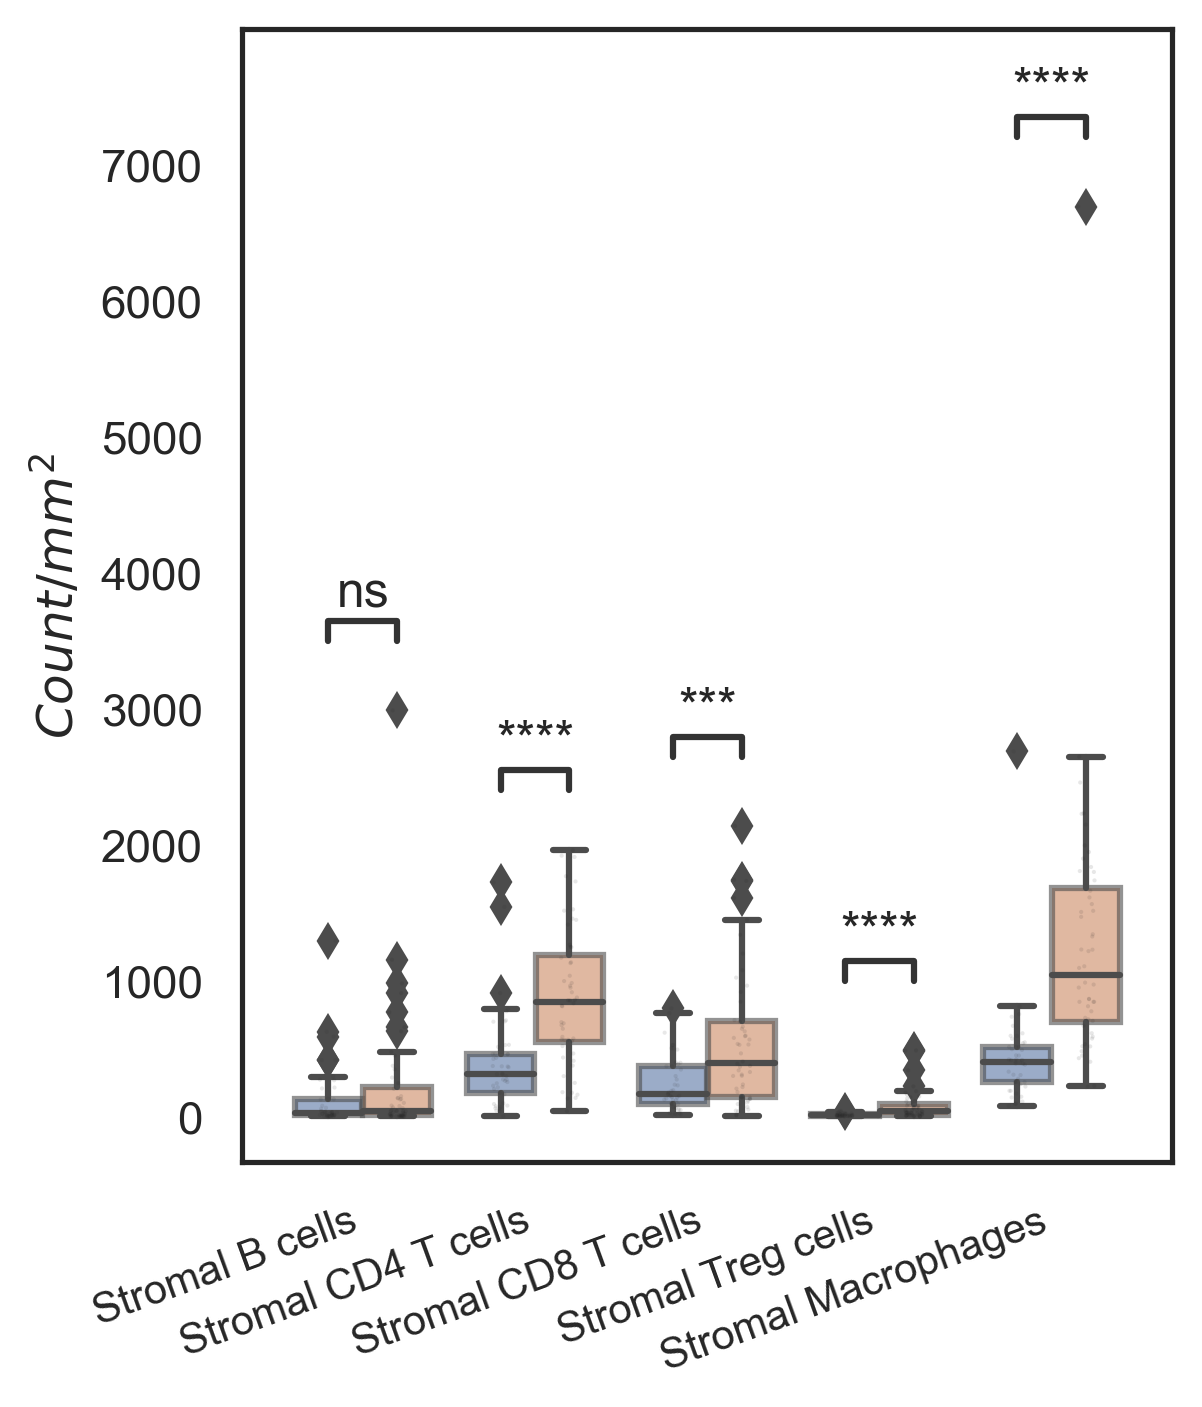

In [43]:
fig,ax = plt.subplots(figsize=(4,5))


immune_cells = ['Stromal B cells', 'Stromal CD4 T cells',
       'Stromal CD8 T cells', 'Stromal Treg cells', 'Stromal Macrophages'
       ]
dfpp = df_long[df_long['cell type'].isin(immune_cells)]
dfpp['cell type'] = dfpp['cell type'].cat.remove_unused_categories()

prolif_groups = ['Non-proliferative', 'Proliferative']

pairs = [tuple((immune_cells[i],prolif_groups[j]) for j in range(2)) for i in range(len(immune_cells)) ]

ax = sns.boxplot(data=dfpp, hue='ILC Subtype',x='cell type', y='count',
                order=immune_cells, boxprops=dict(alpha=.6))
sns.stripplot(data=dfpp, hue='ILC Subtype',x='cell type', y='count',
              order=immune_cells,
              dodge=True, color='k',alpha=0.1, size=1,jitter=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right', fontsize=10)

annotator = Annotator(ax, pairs, data=dfpp, hue='ILC Subtype',x='cell type', y='count')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction='fdr_bh')
annotator.apply_and_annotate()


ax.set_xlabel('')
ax.set_ylabel('$Count/mm^{2}$')

ax.get_legend().remove()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Tumor CD4 T cells_Non-proliferative vs. Tumor CD4 T cells_Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.369e-06 U_stat=5.020e+02
Tumor B cells_Non-proliferative vs. Tumor B cells_Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.939e-03 U_stat=8.955e+02
Tumor CD8 T cells_Non-proliferative vs. Tumor CD8 T cells_Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:7.880e-03 U_stat=8.030e+02
Tumor Treg cells_Non-proliferative vs. Tumor Treg cells_Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.867e-08 U_stat=4.465e+02
Tumor Macrophages_Non-proliferative vs. Tumor Macrophages_Proliferative: Mann-Whitney-Wilcoxon test tw

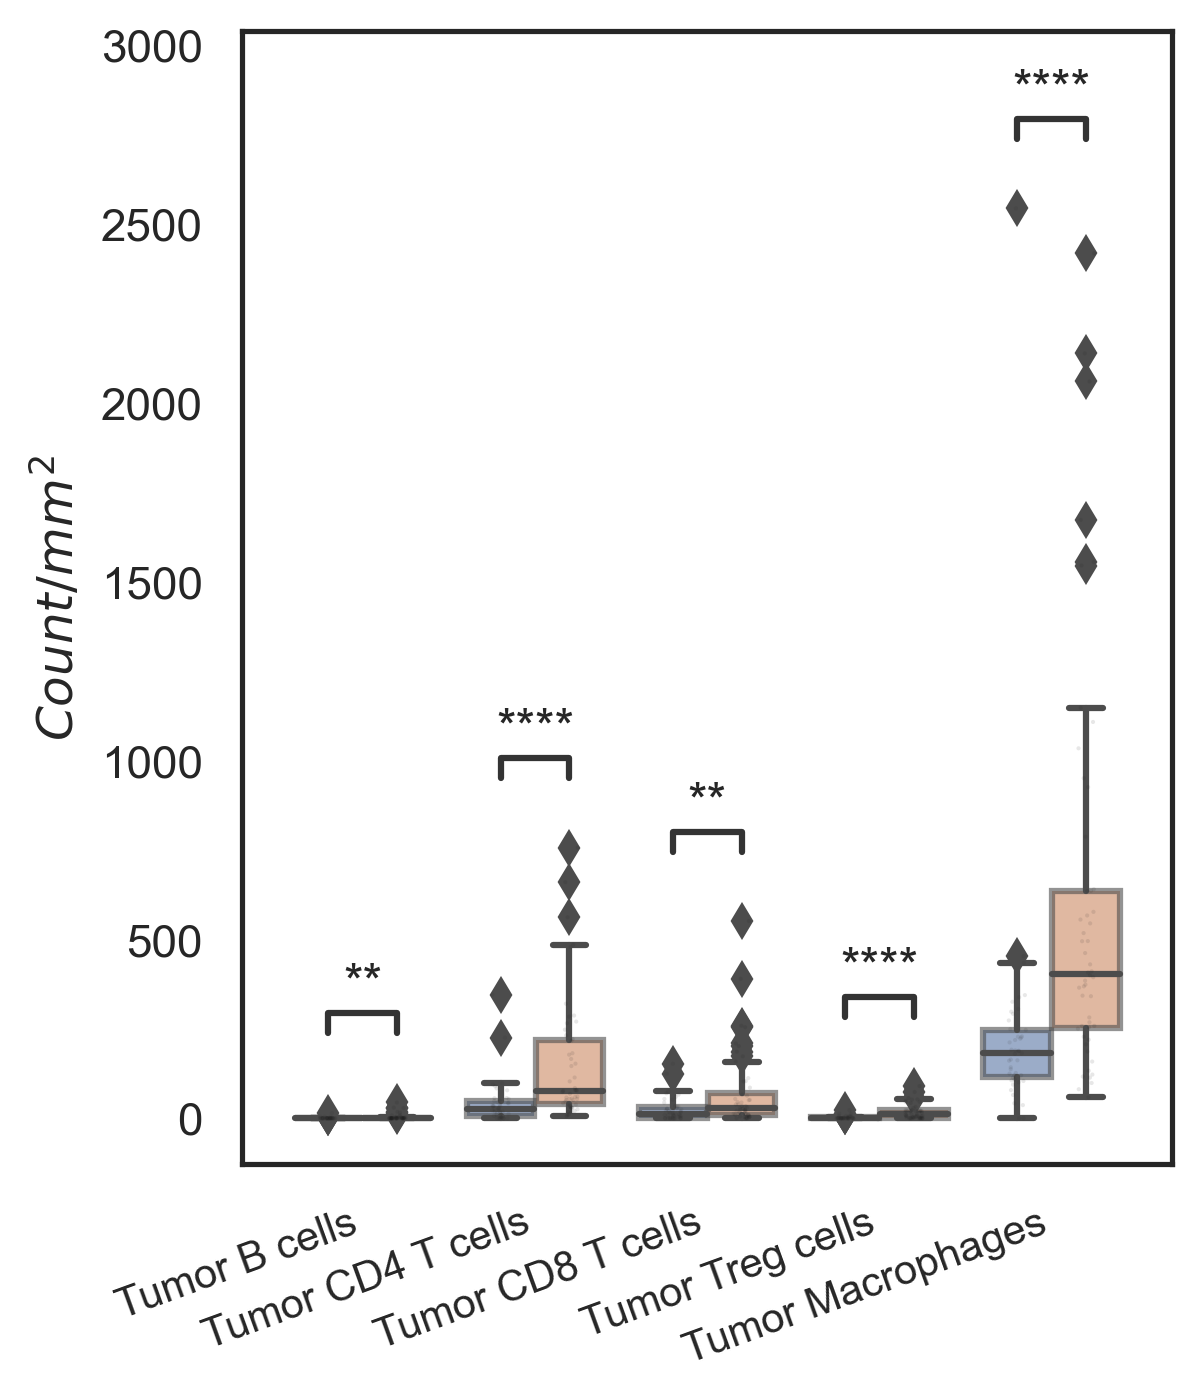

In [46]:
fig,ax = plt.subplots(figsize=(4,5))


immune_cells = ['Tumor B cells', 'Tumor CD4 T cells', 'Tumor CD8 T cells',
       'Tumor Treg cells', 'Tumor Macrophages'
       ]
dfpp = df_long[df_long['cell type'].isin(immune_cells)]
dfpp['cell type'] = dfpp['cell type'].cat.remove_unused_categories()

prolif_groups = ['Non-proliferative', 'Proliferative']

pairs = [tuple((immune_cells[i],prolif_groups[j]) for j in range(2)) for i in range(len(immune_cells)) ]

ax = sns.boxplot(data=dfpp, hue='ILC Subtype',x='cell type', y='count',
                order=immune_cells, boxprops=dict(alpha=.6))
sns.stripplot(data=dfpp, hue='ILC Subtype',x='cell type', y='count',
              order=immune_cells,
              dodge=True, color='k',alpha=0.1, size=1,jitter=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right',fontsize=10)

annotator = Annotator(ax, pairs, data=dfpp, hue='ILC Subtype',x='cell type', y='count')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction='fdr_bh')
annotator.apply_and_annotate()

ax.set_xlabel('')
ax.set_ylabel('$Count/mm^{2}$')

ax.get_legend().remove()

## Pattern annotation

In [66]:
dat1 = pd.read_excel('../data/vectra/vectra_v1.xlsx', sheet_name='vectra_v1')
dat2 = pd.read_csv('../data/raw/Meta_BulkRNAseqCohort_updated.csv')#pd.read_excel('../data/vectra/vectra_v1.xlsx', sheet_name='patient', index_col=0)

dat = pd.merge(dat2,dat1, left_on='Sample ID', right_on='Slide ID')
dat = dat.set_index('Patient ID',drop=True)

In [41]:
sel_cols = [
       'Stromal B cells','Stromal CD4 T cells', 
       'Stromal CD8 T cells', 'Stromal Treg cells',
       'Stromal Macrophages', 'Tumor B cells', 'Tumor CD4 T cells',
       'Tumor CD8 T cells', 'Tumor Treg cells', 'Tumor Macrophages',
       'Tumor PanCK cells']

df_p = dat[sel_cols].T
df_p = np.log2(df_p + 1)

df_corr = df_p.corr(method='spearman')
df_corr

Patient ID  TP17_M510  TP17_M510  TP17_M510  TP17_M510  TP17_M510  TP17_M510  \
Patient ID                                                                     
TP17_M510    1.000000   0.943055   0.938499   0.881818   0.836364   0.636364   
TP17_M510    0.943055   1.000000   0.899543   0.965834   0.906608   0.801824   
TP17_M510    0.938499   0.899543   1.000000   0.920276   0.915720   0.724375   
TP17_M510    0.881818   0.965834   0.920276   1.000000   0.945455   0.854545   
TP17_M510    0.836364   0.906608   0.915720   0.945455   1.000000   0.927273   
...               ...        ...        ...        ...        ...        ...   
TP18_M403    0.790909   0.870162   0.906608   0.945455   0.981818   0.900000   
TP18_M403    0.514870   0.611608   0.625942   0.657889   0.829512   0.867651   
TP18_M403    0.818826   0.895302   0.860329   0.907222   0.953746   0.916527   
TP18_M403    0.877356   0.889293   0.919102   0.907097   0.827788   0.703868   
TP18_M403    0.574991   0.541525   0.690569   0.624559   0.619602   0.505595   

Patient ID  TP17_M510  TP17_M510  TP17_M802  TP17_M802  ...  TP18_M372  \
Patient ID                                              ...              
TP17_M510    0.936364   0.800000   0.836364   0.709091  ...   0.710708   
TP17_M510    0.961278   0.892941   0.902052   0.788157  ...   0.643836   
TP17_M510    0.961278   0.892941   0.920276   0.851938  ...   0.732877   
TP17_M510    0.963636   0.954545   0.945455   0.881818  ...   0.660594   
TP17_M510    0.954545   0.990909   0.981818   0.963636  ...   0.660594   
...               ...        ...        ...        ...  ...        ...   
TP18_M403    0.918182   0.990909   0.981818   0.981818  ...   0.683373   
TP18_M403    0.696028   0.829512   0.762770   0.829512  ...   0.334473   
TP18_M403    0.916527   0.953746   0.921179   0.888612  ...   0.587542   
TP18_M403    0.917011   0.827788   0.817875   0.728652  ...   0.578786   
TP18_M403    0.688997   0.619602   0.555163   0.639429  ...   0.439679   

Patient ID  TP18_M403  TP18_M403  TP18_M403  TP18_M403  TP18_M403  TP18_M403  \
Patient ID                                                                     
TP17_M510    0.834898   0.662107   0.530376   0.642229   0.790909   0.514870   
TP17_M510    0.882780   0.775746   0.645830   0.708063   0.870162   0.611608   
TP17_M510    0.891975   0.810071   0.669145   0.836802   0.906608   0.625942   
TP17_M510    0.917470   0.863023   0.707168   0.825723   0.945455   0.657889   
TP17_M510    0.972518   0.936083   0.846741   0.853247   0.981818   0.829512   
...               ...        ...        ...        ...        ...        ...   
TP18_M403    0.954169   0.949782   0.856045   0.889946   1.000000   0.800909   
TP18_M403    0.817913   0.780628   0.907587   0.625463   0.800909   1.000000   
TP18_M403    0.943756   0.855290   0.873810   0.737162   0.930484   0.878310   
TP18_M403    0.790395   0.709579   0.631646   0.780390   0.827788   0.561465   
TP18_M403    0.615308   0.525337   0.370363   0.710355   0.619602   0.384708   

Patient ID  TP18_M403  TP18_M403  TP18_M403  
Patient ID                                   
TP17_M510    0.818826   0.877356   0.574991  
TP17_M510    0.895302   0.889293   0.541525  
TP17_M510    0.860329   0.919102   0.690569  
TP17_M510    0.907222   0.907097   0.624559  
TP17_M510    0.953746   0.827788   0.619602  
...               ...        ...        ...  
TP18_M403    0.930484   0.827788   0.619602  
TP18_M403    0.878310   0.561465   0.384708  
TP18_M403    1.000000   0.847268   0.494663  
TP18_M403    0.847268   1.000000   0.662162  
TP18_M403    0.494663   0.662162   1.000000  

[97 rows x 97 columns]

In [42]:
import matplotlib as mpl
mpl.rc('figure', dpi=300)

from scipy.spatial import distance
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, cut_tree, leaves_list, cophenet

k_sel = 5 # number of clusters

model_dict = pkl.load(open('../data/nmf/k2_12_immune.pkl','rb')) # 

model = model_dict[k_sel]
mat_c = pd.DataFrame(model.consensus_matrix_h, 
                     index=df_corr.index.tolist(), columns=df_corr.index.tolist())

# ivl1 = leaves_list(row_linkage)
# ivl2 = leaves_list(col_linkage)
# mat_sorted = mat_c.iloc[ivl1,].iloc[:,ivl2]

row_linkage = hierarchy.linkage(distance.pdist(mat_c), method='ward')
col_linkage = hierarchy.linkage(distance.pdist(mat_c.T), method='ward')

cutree = cut_tree(col_linkage, n_clusters=[k_sel])
cluster_df = pd.DataFrame({'NMF Cluster': cutree.flatten()})
cluster_df['NMF Cluster'] = cluster_df['NMF Cluster'] + 1
cluster_df.index = df_corr.index.tolist() # in original order (unsorted)

In [67]:
dat['Immune Infiltration Pattern'] = cluster_df['NMF Cluster']
dat

Sample ID Tumor type  Age at diagnosis   Race  Postmenopausal  \
Patient ID                                                                   
TP17_M510   PBC_PR_758        ILC                44  White               0   
TP17_M510   PBC_PR_758        ILC                44  White               0   
TP17_M510   PBC_PR_758        ILC                44  White               0   
TP17_M510   PBC_PR_758        ILC                44  White               0   
TP17_M510   PBC_PR_758        ILC                44  White               0   
...                ...        ...               ...    ...             ...   
TP18_M403   PBC_PR_771        ILC                67  White               1   
TP18_M403   PBC_PR_771        ILC                67  White               1   
TP18_M403   PBC_PR_771        ILC                67  White               1   
TP18_M403   PBC_PR_771        ILC                67  White               1   
TP18_M403   PBC_PR_771        ILC                67  White               1   

            Pathological grade Pathological stage  Ki67  ER   PR  ...  \
Patient ID                                                        ...   
TP17_M510                    2                 1A    15    1   1  ...   
TP17_M510                    2                 1A    15    1   1  ...   
TP17_M510                    2                 1A    15    1   1  ...   
TP17_M510                    2                 1A    15    1   1  ...   
TP17_M510                    2                 1A    15    1   1  ...   
...                        ...                ...   ...  ...  ..  ...   
TP18_M403                    1                 1A     1    1   0  ...   
TP18_M403                    1                 1A     1    1   0  ...   
TP18_M403                    1                 1A     1    1   0  ...   
TP18_M403                    1                 1A     1    1   0  ...   
TP18_M403                    1                 1A     1    1   0  ...   

           Stromal CD8 T cells  Stromal Treg cells Stromal Macrophages  \
Patient ID                                                               
TP17_M510           127.946168            7.311210          428.227992   
TP17_M510           387.288711           10.282001         1104.286928   
TP17_M510           234.587357            0.000000          725.050975   
TP17_M510           307.693544           12.595642          714.352847   
TP17_M510           140.963099           18.656881          842.669113   
...                        ...                 ...                 ...   
TP18_M403            91.229699            8.828681          447.319815   
TP18_M403           500.730778            2.540169         2684.640917   
TP18_M403           296.760512            5.667301          509.541921   
TP18_M403            14.917008            0.000000          415.190065   
TP18_M403            19.569550            0.000000           77.127052   

           Tumor B cells  Tumor CD4 T cells  Tumor CD8 T cells  \
Patient ID                                                       
TP17_M510      44.145958          30.902171           3.433575   
TP17_M510       2.099531           9.237934           2.099531   
TP17_M510       6.438246          17.475240           4.138873   
TP17_M510       0.000000          50.910054          10.717906   
TP17_M510       4.273107          76.559841          12.819322   
...                  ...                ...                ...   
TP18_M403       0.000000          45.406179          19.586979   
TP18_M403       0.000000           0.000000           0.000000   
TP18_M403       0.000000           0.000000           0.000000   
TP18_M403       0.000000           0.000000           0.000000   
TP18_M403       0.000000          35.652580           0.000000   

            Tumor Treg cells  Tumor Macrophages  Tumor PanCK cells  \
Patient ID                                                           
TP17_M510           0.000000          98.592640        4514.169488   
TP17_M510       

In [68]:
dat.columns = ['ER' if x=='ER ' else x for x in dat.columns]

In [69]:
dat.to_csv('../data/corr/data_nmflabeled.csv')

In [49]:
dat.columns

Index(['Sample ID', 'Tumor type', 'Age at diagnosis', 'Race', 'Postmenopausal',
       'Pathological grade', 'Pathological stage', 'Ki67', 'ER', 'PR', 'HER2',
       'ER IHC score', 'Sample Name', 'Slide ID', 'Stromal B cells',
       'Stromal CD4 T cells', 'Stromal CD8 T cells', 'Stromal Treg cells',
       'Stromal Macrophages', 'Tumor B cells', 'Tumor CD4 T cells',
       'Tumor CD8 T cells', 'Tumor Treg cells', 'Tumor Macrophages',
       'Tumor PanCK cells', 'NMF Cluster'],
      dtype='object')

In [51]:
dat['NMF Cluster'] = dat['NMF Cluster'].astype(object)

<Axes: xlabel='NMF Cluster', ylabel='Age at diagnosis'>

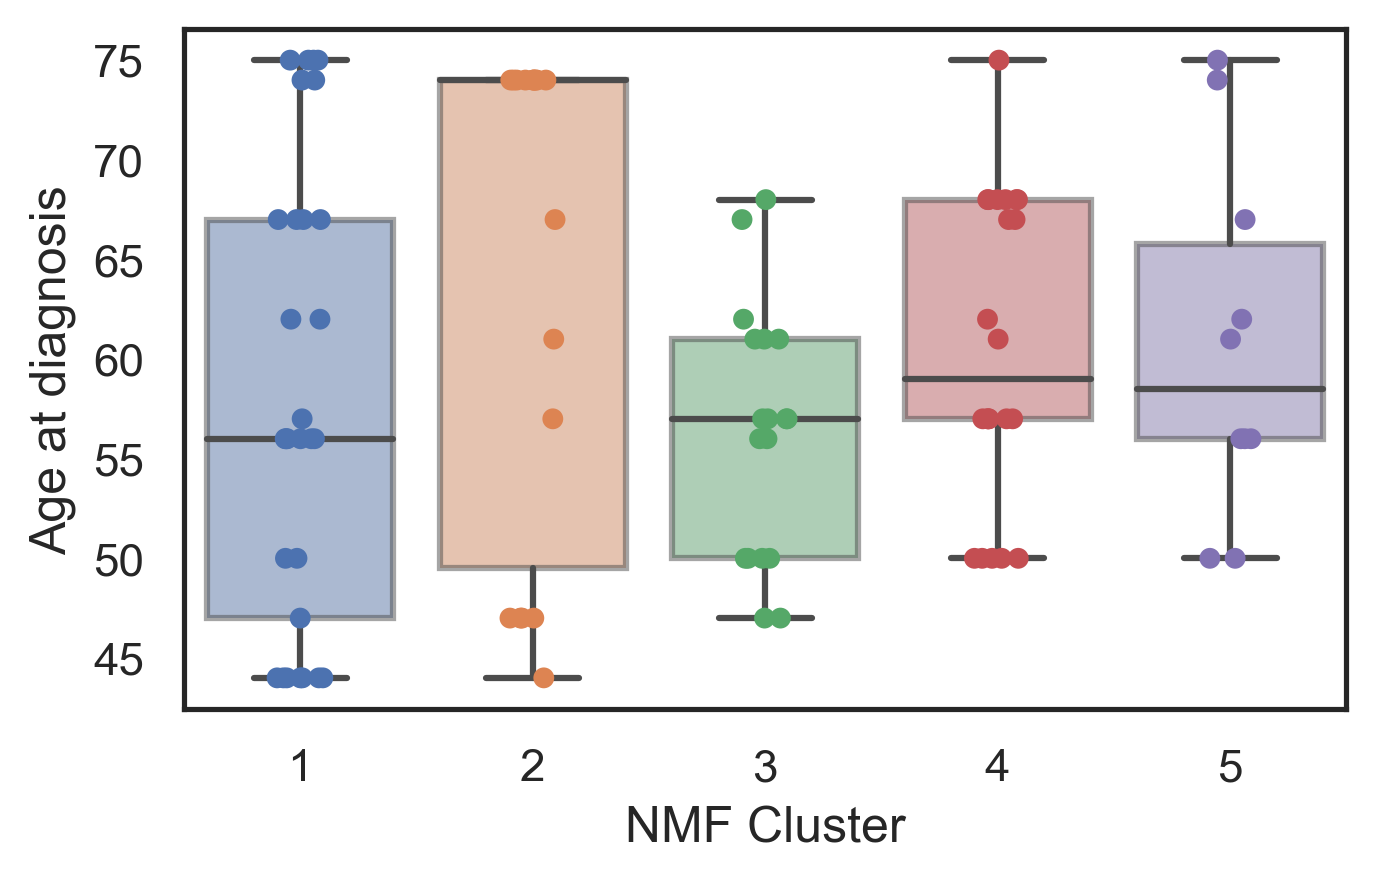

In [63]:
col = 'NMF Cluster'
test = 'Age at diagnosis'

fig, ax = plt.subplots(figsize=(5,3))
sns.boxplot(x=col, y=test, data=dat, boxprops=dict(alpha=0.5))
sns.stripplot(x=col, y=test, data=dat)

<Axes: xlabel='NMF Cluster', ylabel='Ki67'>

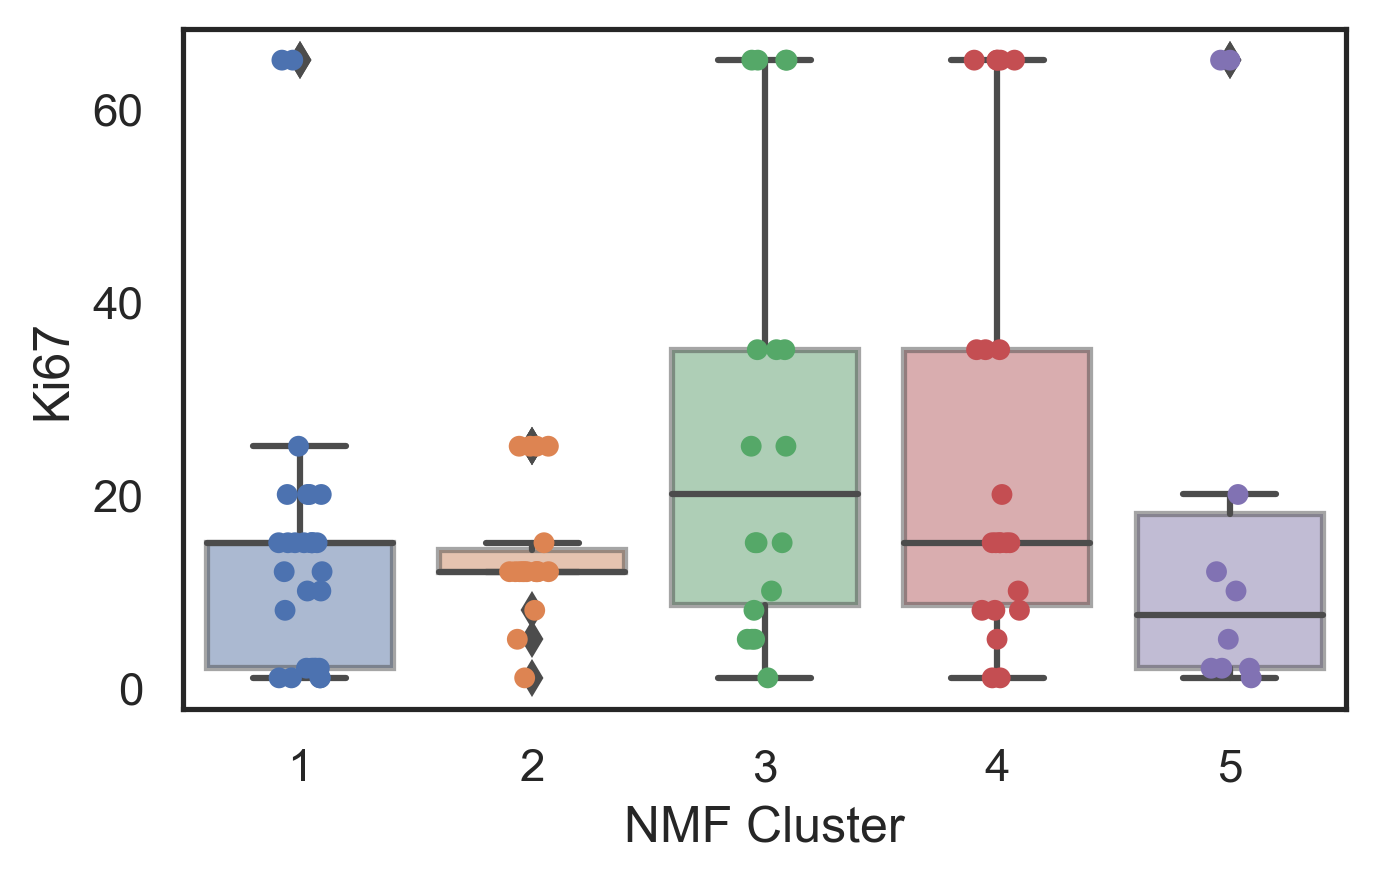

In [65]:
col = 'NMF Cluster'
test = 'Ki67'

fig, ax = plt.subplots(figsize=(5,3))
sns.boxplot(x=col, y=test, data=dat, boxprops=dict(alpha=0.5))
sns.stripplot(x=col, y=test, data=dat)

In [55]:
# go to .R

Object `boxplot` not found.


# scRNA-seq, GSE176078

In [23]:
import scanpy as sc
import anndata as ad
sc.settings.set_figure_params(dpi=50, facecolor="white")

In [24]:
# downloaded from https://cellxgene.cziscience.com/collections/dea97145-f712-431c-a223-6b5f565f362a
dat = sc.read_h5ad('../data_rebuttal/scpublic/966b60ee-b416-44bd-981c-817bfc476646.h5ad')
dat

AnnData object with n_obs × n_vars = 100064 × 29067
    obs: 'donor_id', 'percent_mito', 'nCount_RNA', 'nFeature_RNA', 'celltype_major', 'celltype_minor', 'celltype_subset', 'subtype', 'gene_module', 'calls', 'normal_cell_call', 'CNA_value', 'batch_run', 'multiplexed', 'cryo_state', 'development_stage_ontology_term_id', 'cancer_type', 'ER', 'PR', 'HER2_IHC', 'HER2_ISH', 'HER2_ISH_ratio', 'Ki67', 'subtype_by_IHC', 'treatment_status', 'treatment_details', 'assay_ontology_term_id', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'disease_ontology_term_id', 'grade', 'cell_type_ontology_term_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'citation', 'schema_referen

In [25]:
# Our meta data: https://docs.google.com/spreadsheets/d/1m26OKm330K7NxRk-_skO7dlSYSBtPOvxuLmNw5fckSo/edit?gid=1326860056#gid=1326860056
Counter(dat.obs['donor_id']) # ILC pt, 4471

Counter({'CID3586': 6178,
         'CID3921': 3024,
         'CID45171': 2447,
         'CID3838': 2353,
         'CID4066': 5309,
         'CID44041': 2131,
         'CID4465': 1564,
         'CID4495': 7985,
         'CID44971': 7986,
         'CID44991': 7023,
         'CID4513': 5619,
         'CID4515': 4149,
         'CID4523': 1754,
         'CID3946': 774,
         'CID3963': 3527,
         'CID4461': 631,
         'CID4463': 1138,
         'CID4471': 8609,
         'CID4530N': 4409,
         'CID4535': 3961,
         'CID4040': 2531,
         'CID3941': 631,
         'CID3948': 2327,
         'CID4067': 3764,
         'CID4290A': 5789,
         'CID4398': 4451})

In [156]:
dat_sel = dat[dat.obs['donor_id'].isin(['CID4471','CID4535'])] #ILC
dat_sel

View of AnnData object with n_obs × n_vars = 12570 × 29067
    obs: 'donor_id', 'percent_mito', 'nCount_RNA', 'nFeature_RNA', 'celltype_major', 'celltype_minor', 'celltype_subset', 'subtype', 'gene_module', 'calls', 'normal_cell_call', 'CNA_value', 'batch_run', 'multiplexed', 'cryo_state', 'development_stage_ontology_term_id', 'cancer_type', 'ER', 'PR', 'HER2_IHC', 'HER2_ISH', 'HER2_ISH_ratio', 'Ki67', 'subtype_by_IHC', 'treatment_status', 'treatment_details', 'assay_ontology_term_id', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'disease_ontology_term_id', 'grade', 'cell_type_ontology_term_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'TAM-Low'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'citation

In [157]:
dat_sel.obs.groupby(['donor_id','celltype_major']).size().unstack().T

donor_id           CID4471  CID4535
celltype_major                     
B-cells                 99       56
CAFs                  1292      102
Cancer Epithelial      212     2223
Endothelial           2778      219
Myeloid                285      255
Normal Epithelial     1966       22
PVL                   1285      592
Plasmablasts            51       96
T-cells                641      396

In [158]:
sigs = read_gmt('../data/geneset/Macrophages.gmt')
sigs

{'ma_neg_pred': ['AASS',
  'ABCA10',
  'ABCA6',
  'ABCA8',
  'ABCA9',
  'ABCC9',
  'ABI3BP',
  'ABT1',
  'ACOT9',
  'ADAM22',
  'ADAM33',
  'ADAMTS1',
  'ADAMTS3',
  'ADAMTS5',
  'ADAMTS9',
  'ADD1',
  'ADD3',
  'ADGRA2',
  'ADGRD1',
  'ADGRL2',
  'AKAP12',
  'AKAP13',
  'AKAP6',
  'ALDH1A1',
  'ALX4',
  'AMOTL1',
  'AMOTL2',
  'ANGPTL1',
  'ANK2',
  'ANKRD11',
  'ANKRD20A12P',
  'ANTXR2',
  'ANXA1',
  'ANXA8',
  'ARHGAP10',
  'ARHGAP6',
  'ARHGEF25',
  'ARID5B',
  'ATP10D',
  'ATP11A',
  'ATP8B2',
  'AXL',
  'BACH1',
  'BACH2',
  'BAG2',
  'BBS2',
  'BCHE',
  'BHLHE22',
  'BICC1',
  'BICD2',
  'BMP1',
  'BNC2',
  'BNIP2',
  'BOC',
  'BRD7',
  'C14orf37',
  'C1S',
  'CACHD1',
  'CACNA1G',
  'CAPN6',
  'CAV1',
  'CAV2',
  'CCDC80',
  'CCDC82',
  'CCL18',
  'CCND2',
  'CD163L1',
  'CD34',
  'CD99',
  'CDH5',
  'CDK11A',
  'CDK6',
  'CEBPB-AS1',
  'CEP112',
  'CEP85L',
  'CES1',
  'CFDP1',
  'CFH',
  'CFI',
  'CHD9',
  'CHL1',
  'CHRDL1',
  'CLCA4',
  'CLEC12A',
  'CLEC4G',
  'CLIC2',
  '

In [159]:
genes_ma = sigs['ma_neg_pred']
print(len(genes_ma))
genes_ma

483


['AASS',
 'ABCA10',
 'ABCA6',
 'ABCA8',
 'ABCA9',
 'ABCC9',
 'ABI3BP',
 'ABT1',
 'ACOT9',
 'ADAM22',
 'ADAM33',
 'ADAMTS1',
 'ADAMTS3',
 'ADAMTS5',
 'ADAMTS9',
 'ADD1',
 'ADD3',
 'ADGRA2',
 'ADGRD1',
 'ADGRL2',
 'AKAP12',
 'AKAP13',
 'AKAP6',
 'ALDH1A1',
 'ALX4',
 'AMOTL1',
 'AMOTL2',
 'ANGPTL1',
 'ANK2',
 'ANKRD11',
 'ANKRD20A12P',
 'ANTXR2',
 'ANXA1',
 'ANXA8',
 'ARHGAP10',
 'ARHGAP6',
 'ARHGEF25',
 'ARID5B',
 'ATP10D',
 'ATP11A',
 'ATP8B2',
 'AXL',
 'BACH1',
 'BACH2',
 'BAG2',
 'BBS2',
 'BCHE',
 'BHLHE22',
 'BICC1',
 'BICD2',
 'BMP1',
 'BNC2',
 'BNIP2',
 'BOC',
 'BRD7',
 'C14orf37',
 'C1S',
 'CACHD1',
 'CACNA1G',
 'CAPN6',
 'CAV1',
 'CAV2',
 'CCDC80',
 'CCDC82',
 'CCL18',
 'CCND2',
 'CD163L1',
 'CD34',
 'CD99',
 'CDH5',
 'CDK11A',
 'CDK6',
 'CEBPB-AS1',
 'CEP112',
 'CEP85L',
 'CES1',
 'CFDP1',
 'CFH',
 'CFI',
 'CHD9',
 'CHL1',
 'CHRDL1',
 'CLCA4',
 'CLEC12A',
 'CLEC4G',
 'CLIC2',
 'CLIP4',
 'CLMP',
 'CNGA1',
 'CNRIP1',
 'COL14A1',
 'COL16A1',
 'COL21A1',
 'COPZ2',
 'CPE',
 'CPNE8',


In [160]:
genes_tbl = pd.read_csv('../data_rebuttal/scpublic/gene name conversion.csv', index_col=0)
genes_tbl

converted_alias      name  \
initial_alias                              
AASS           ENSG00000008311      AASS   
ABCA10         ENSG00000154263    ABCA10   
ABCA6          ENSG00000154262     ABCA6   
ABCA8          ENSG00000141338     ABCA8   
ABCA9          ENSG00000154258     ABCA9   
...                        ...       ...   
SMCO4          ENSG00000166002     SMCO4   
SNAPC1         ENSG00000023608    SNAPC1   
VTRNA2-1       ENSG00000270123  VTRNA2-1   
YBX1           ENSG00000065978      YBX1   
ZNF732         ENSG00000186777    ZNF732   

                                                     description  \
initial_alias                                                      
AASS           aminoadipate-semialdehyde synthase [Source:HGN...   
ABCA10         ATP binding cassette subfamily A member 10 [So...   
ABCA6          ATP binding cassette subfamily A member 6 [Sou...   
ABCA8          ATP binding cassette subfamily A member 8 [Sou...   
ABCA9          ATP binding cassette subfamily A member 9 [Sou...   
...                                                          ...   
SMCO4          single-pass membrane protein with coiled-coil ...   
SNAPC1         small nuclear RNA activating complex polypepti...   
VTRNA2-1       vault RNA 2-1 [Source:HGNC Symbol;Acc:HGNC:37054]   
YBX1           Y-box binding protein 1 [Source:HGNC Symbol;Ac...   
ZNF732         zinc finger protein 732 [Source:HGNC Symbol;Ac...   

                                                   namespace  
initial_alias                                                 
AASS           ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE  
ABCA10         ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE  
ABCA6          ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE  
ABCA8          ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE  
ABCA9          ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE  
...                                                      ...  
SMCO4          ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE  
SNAPC1         ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE  
VTRNA2-1                                      GENECARDS,HGNC  
YBX1           ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE  
ZNF732         ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE  

[488 rows x 4 columns]

In [161]:
genes_ma_v2 = ['ARMH4' if g=='C14orf37' else g for g in genes_ma]

genes_ensg = genes_tbl.loc[genes_ma_v2,'converted_alias'].values
genes_ensg = [x for x in genes_ensg if x!='None']

len(genes_ensg)

476

In [162]:
sc.tl.score_genes(dat_sel, 
                  gene_list=genes_ensg, ctrl_size=len(genes_ensg), 
                  gene_pool=None, n_bins=25, score_name='TAM-Low', 
                  random_state=2024, copy=False)


In [163]:
dat_sel

AnnData object with n_obs × n_vars = 12570 × 29067
    obs: 'donor_id', 'percent_mito', 'nCount_RNA', 'nFeature_RNA', 'celltype_major', 'celltype_minor', 'celltype_subset', 'subtype', 'gene_module', 'calls', 'normal_cell_call', 'CNA_value', 'batch_run', 'multiplexed', 'cryo_state', 'development_stage_ontology_term_id', 'cancer_type', 'ER', 'PR', 'HER2_IHC', 'HER2_ISH', 'HER2_ISH_ratio', 'Ki67', 'subtype_by_IHC', 'treatment_status', 'treatment_details', 'assay_ontology_term_id', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'disease_ontology_term_id', 'grade', 'cell_type_ontology_term_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'TAM-Low'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'citation', 'sche

In [104]:
Counter(dat_sel.obs['cell_type'])

Counter({'endothelial cell': 7402,
         'fibroblast of breast': 6573,
         'pericyte': 5423,
         'endothelial cell of lymphatic vessel': 203,
         'memory B cell': 2581,
         'naive B cell': 625,
         'CD8-positive, alpha-beta T cell': 11487,
         'CD4-positive, alpha-beta T cell': 19231,
         'natural killer cell': 1846,
         'T cell': 1528,
         'mature NK T cell': 1122,
         'macrophage': 5929,
         'monocyte': 2328,
         'myeloid cell': 1418,
         'basal-myoepithelial cell of mammary gland': 1098,
         'luminal epithelial cell of mammary gland': 14367,
         'plasmablast': 3524,
         'mammary gland epithelial cell': 13379})

Text(0.5, 0, 'Donor ID')

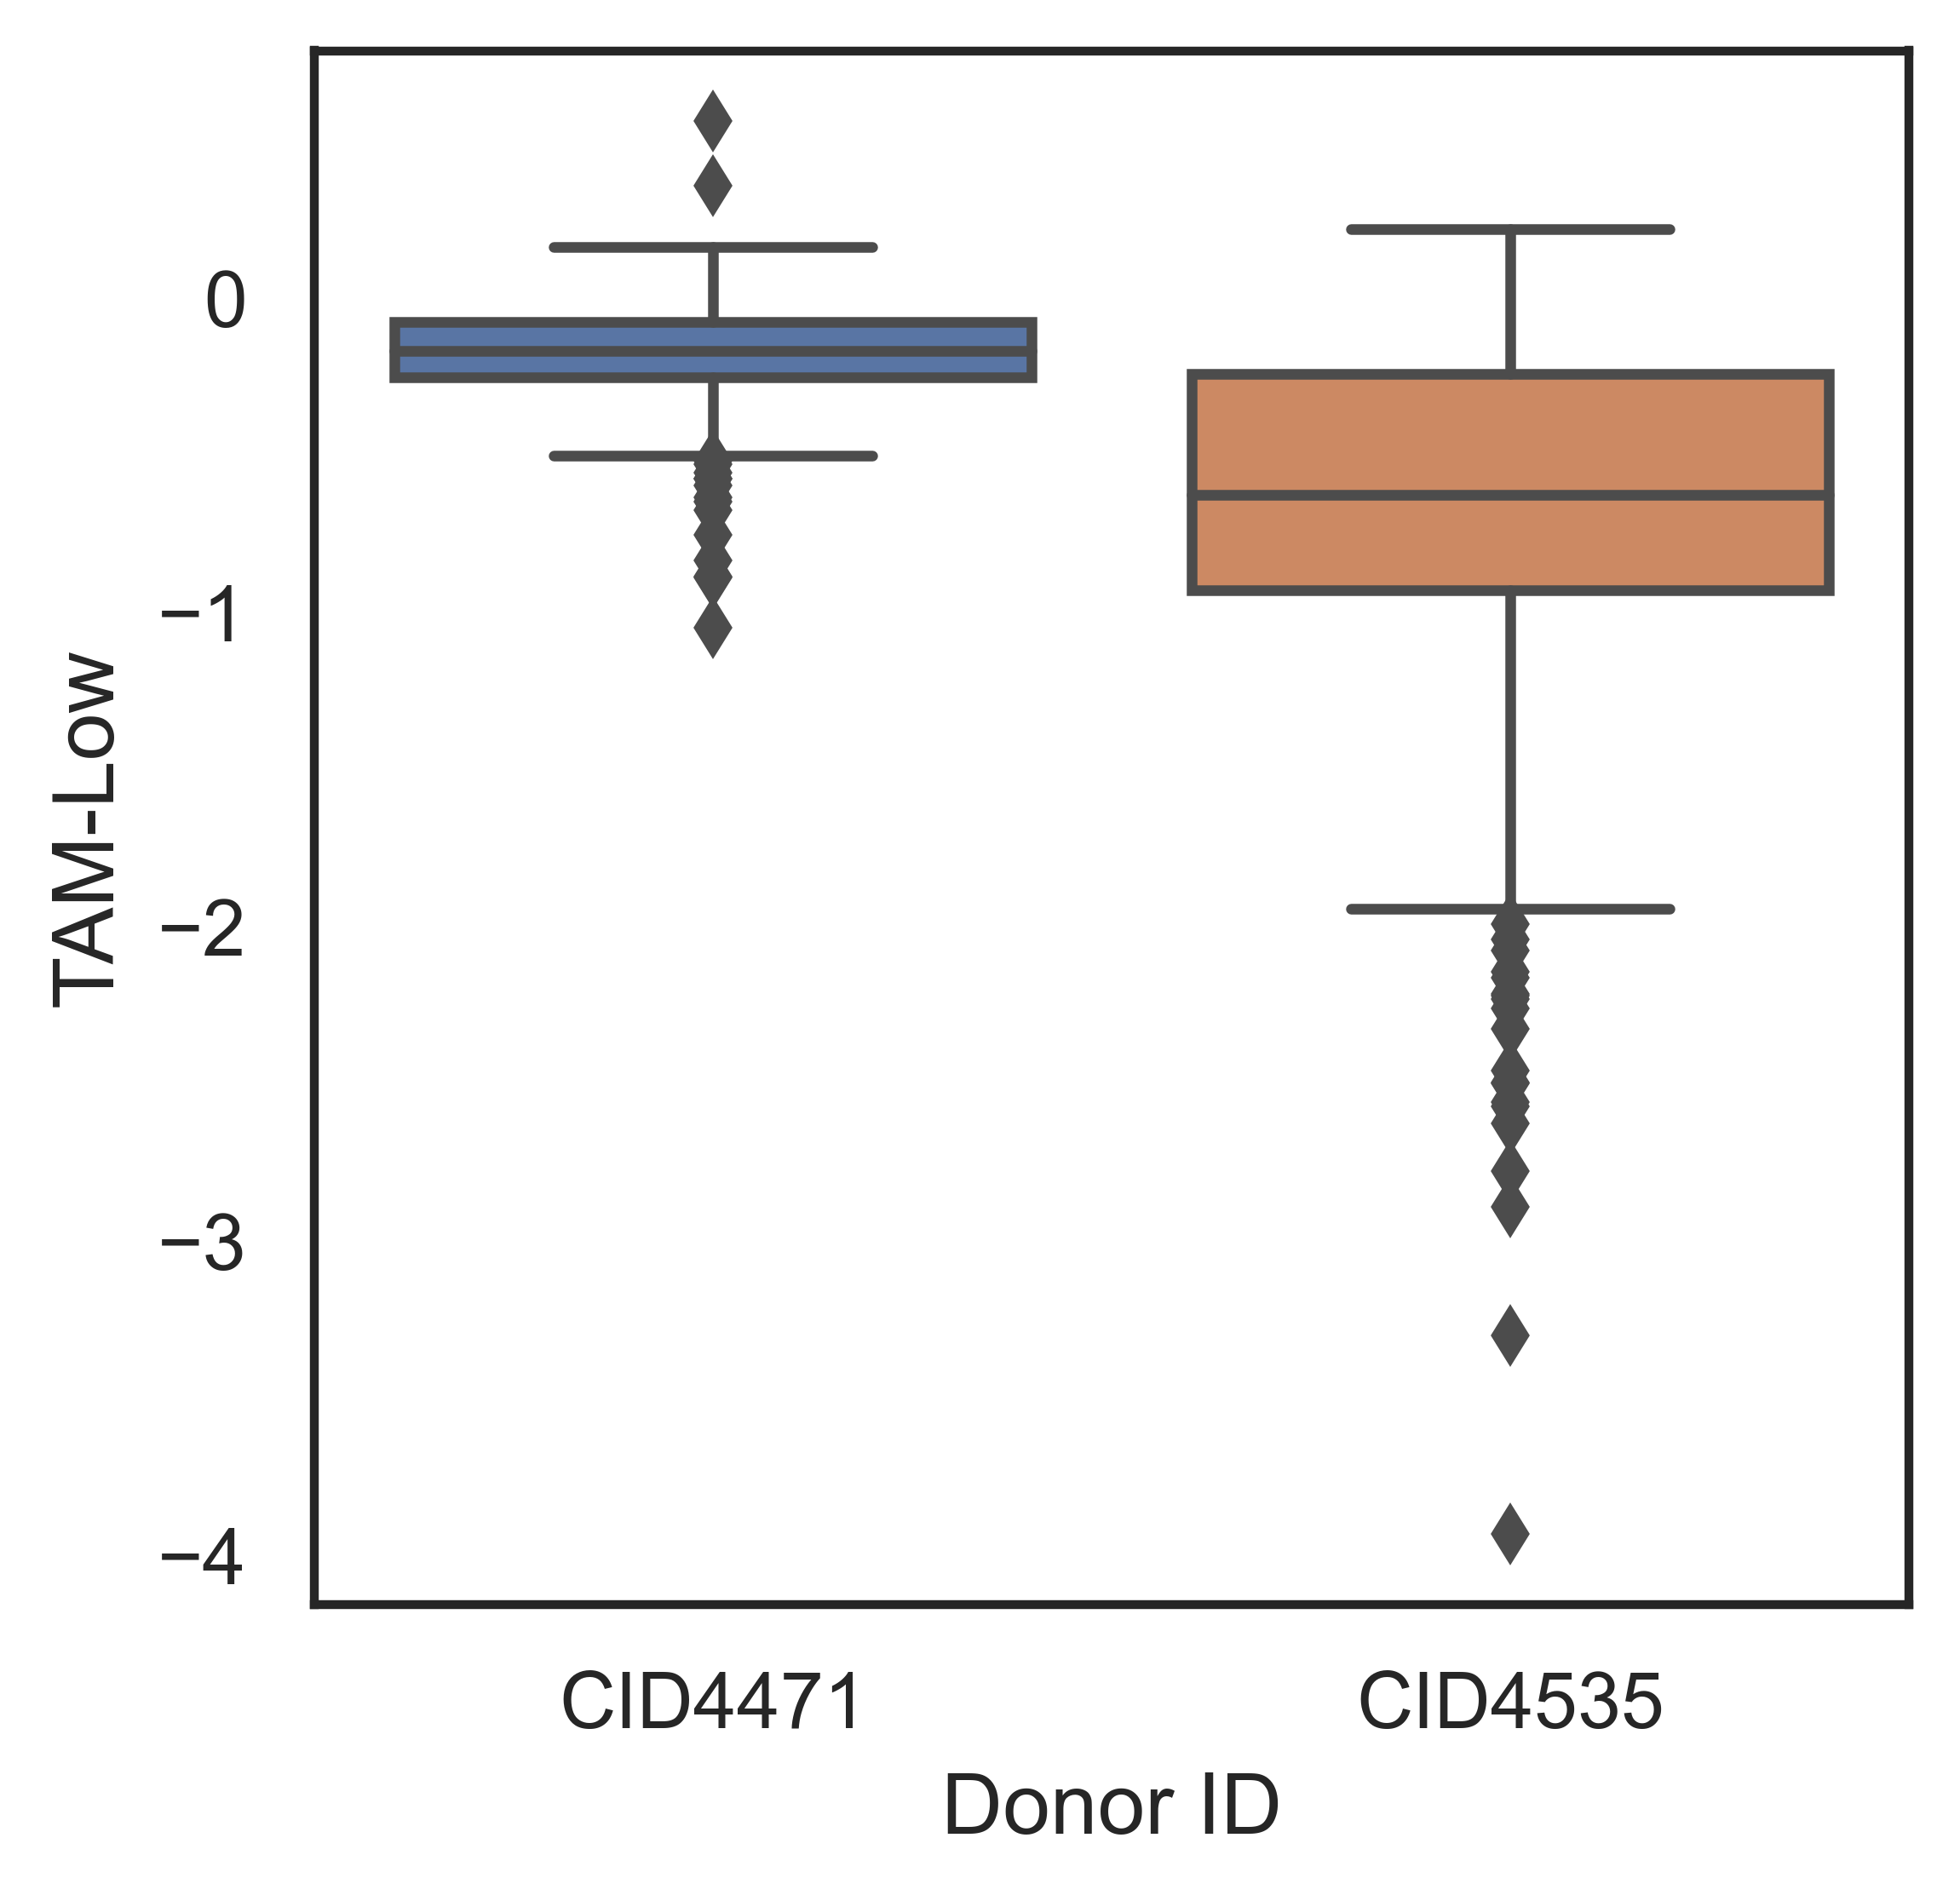

In [178]:
epi = dat_sel[dat_sel.obs['celltype_major']=='Cancer Epithelial']

dfp = epi.obs[['TAM-Low','donor_id']]

sns.boxplot(data=dfp, y='TAM-Low', x='donor_id')
plt.xlabel('Donor ID')

# x1 = epi[epi.obs['donor_id']=='CID4471'].obs['TAM-Low']
# x2 = epi[epi.obs['donor_id']=='CID4535'].obs['TAM-Low']

# plt.figure(figsize=(6,3))
# plt.hist(x1, alpha=.5, color=sns.color_palette("deep")[0], label='CID4471', bins=50, density=True)
# plt.hist(x2, alpha=.5, color=sns.color_palette("deep")[1], label='CID4535', bins=50, density=True)
# plt.legend()

# plt.xlabel('TAM-Low Signature Expression in Cancer Epithelial Cells')
# plt.ylabel('Frequency')

In [165]:
average_tam_low = pd.DataFrame(dfp.groupby('donor_id')['TAM-Low'].mean().sort_values())#.set_index('donor_id')

average_tam_low

TAM-Low
donor_id          
CID4535  -0.635370
CID4471  -0.190238

In [166]:
Counter(dat_sel.obs['cell_type'])

Counter({'endothelial cell': 2946,
         'fibroblast of breast': 1394,
         'pericyte': 1877,
         'endothelial cell of lymphatic vessel': 51,
         'memory B cell': 155,
         'plasmablast': 147,
         'CD8-positive, alpha-beta T cell': 257,
         'CD4-positive, alpha-beta T cell': 651,
         'natural killer cell': 55,
         'T cell': 27,
         'mature NK T cell': 47,
         'macrophage': 305,
         'monocyte': 124,
         'myeloid cell': 111,
         'mammary gland epithelial cell': 241,
         'luminal epithelial cell of mammary gland': 3523,
         'basal-myoepithelial cell of mammary gland': 659})

In [167]:
tbl = dat_sel.obs.groupby(['donor_id','cell_type']).size().unstack().T
ma = pd.DataFrame(tbl.loc['macrophage',:])#[average_tam_low['donor_id'].values,:]
ma

macrophage
donor_id            
CID4471          186
CID4535          119

In [168]:
donors = [x for x in ma.index if x in average_tam_low.index]
print(len(donors))
donors

2


['CID4471', 'CID4535']

<Axes: xlabel='TAM-Low', ylabel='macrophage'>

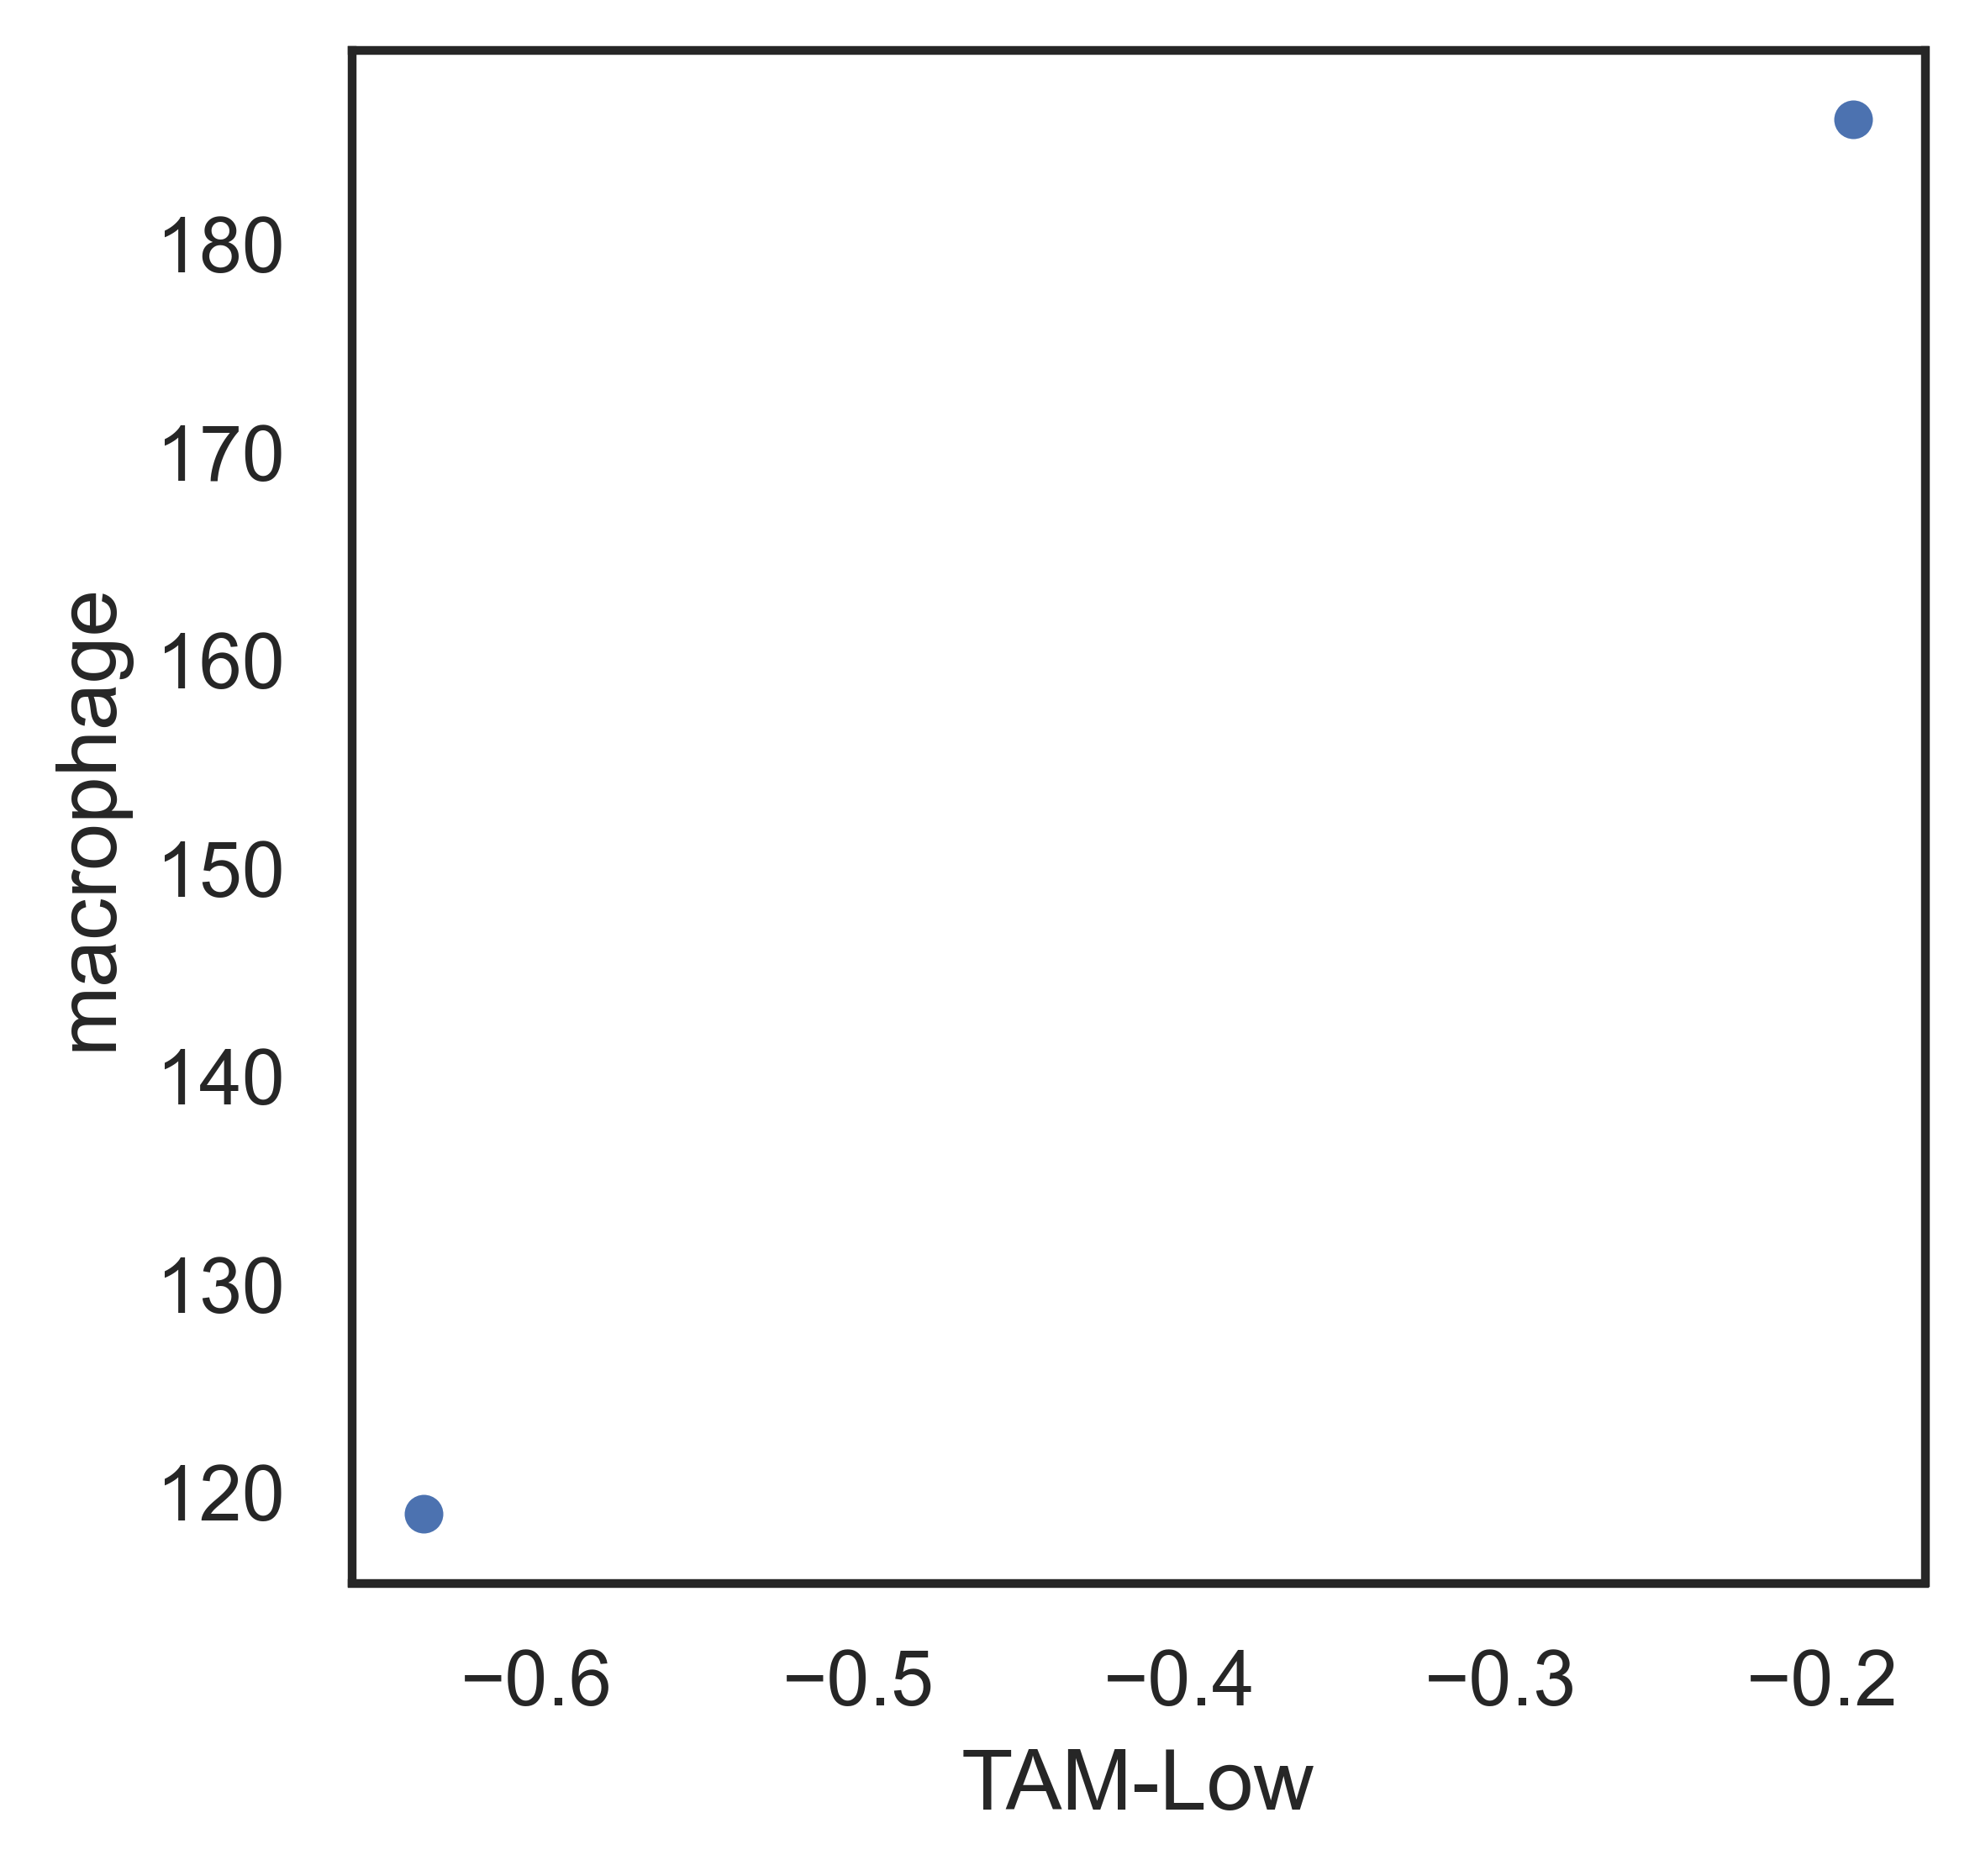

In [169]:
x1 = average_tam_low.loc[donors,'TAM-Low']
x2 = ma.loc[donors,'macrophage']

sns.scatterplot(x1,x2)

In [170]:
from scipy.stats import mannwhitneyu

print(np.mean(x1), np.mean(x2), mannwhitneyu(x1,x2))

-0.41280392481649086 152.5 MannwhitneyuResult(statistic=0.0, pvalue=0.3333333333333333)


In [171]:
tbl = dat_sel.obs.groupby(['donor_id','celltype_minor']).size().unstack().T

tbl

donor_id                     CID4471  CID4535
celltype_minor                               
B cells Memory                    99       56
CAFs MSC iCAF-like               761       58
CAFs myCAF-like                  531       44
Cancer Basal SC                   10        1
Cancer Cycling                    28      195
Cancer Her2 SC                     5        2
Cancer LumA SC                   169        0
Cancer LumB SC                     0     2025
Cycling PVL                        0       10
Cycling T-cells                    8       19
Cycling_Myeloid                   12        8
DCs                               35       56
Endothelial ACKR1               2065       44
Endothelial CXCL12               359      128
Endothelial Lymphatic LYVE1       46        5
Endothelial RGS5                 308       42
Luminal Progenitors              655        7
Macrophage                       186      119
Mature Luminal                   654       13
Monocyte                          52       72
Myoepithelial                    657        2
NK cells                          30       25
NKT cells                         32       15
PVL Differentiated               868      430
PVL Immature                     417      152
Plasmablasts                      51       96
T cells CD4+                     412      239
T cells CD8+                     159       98

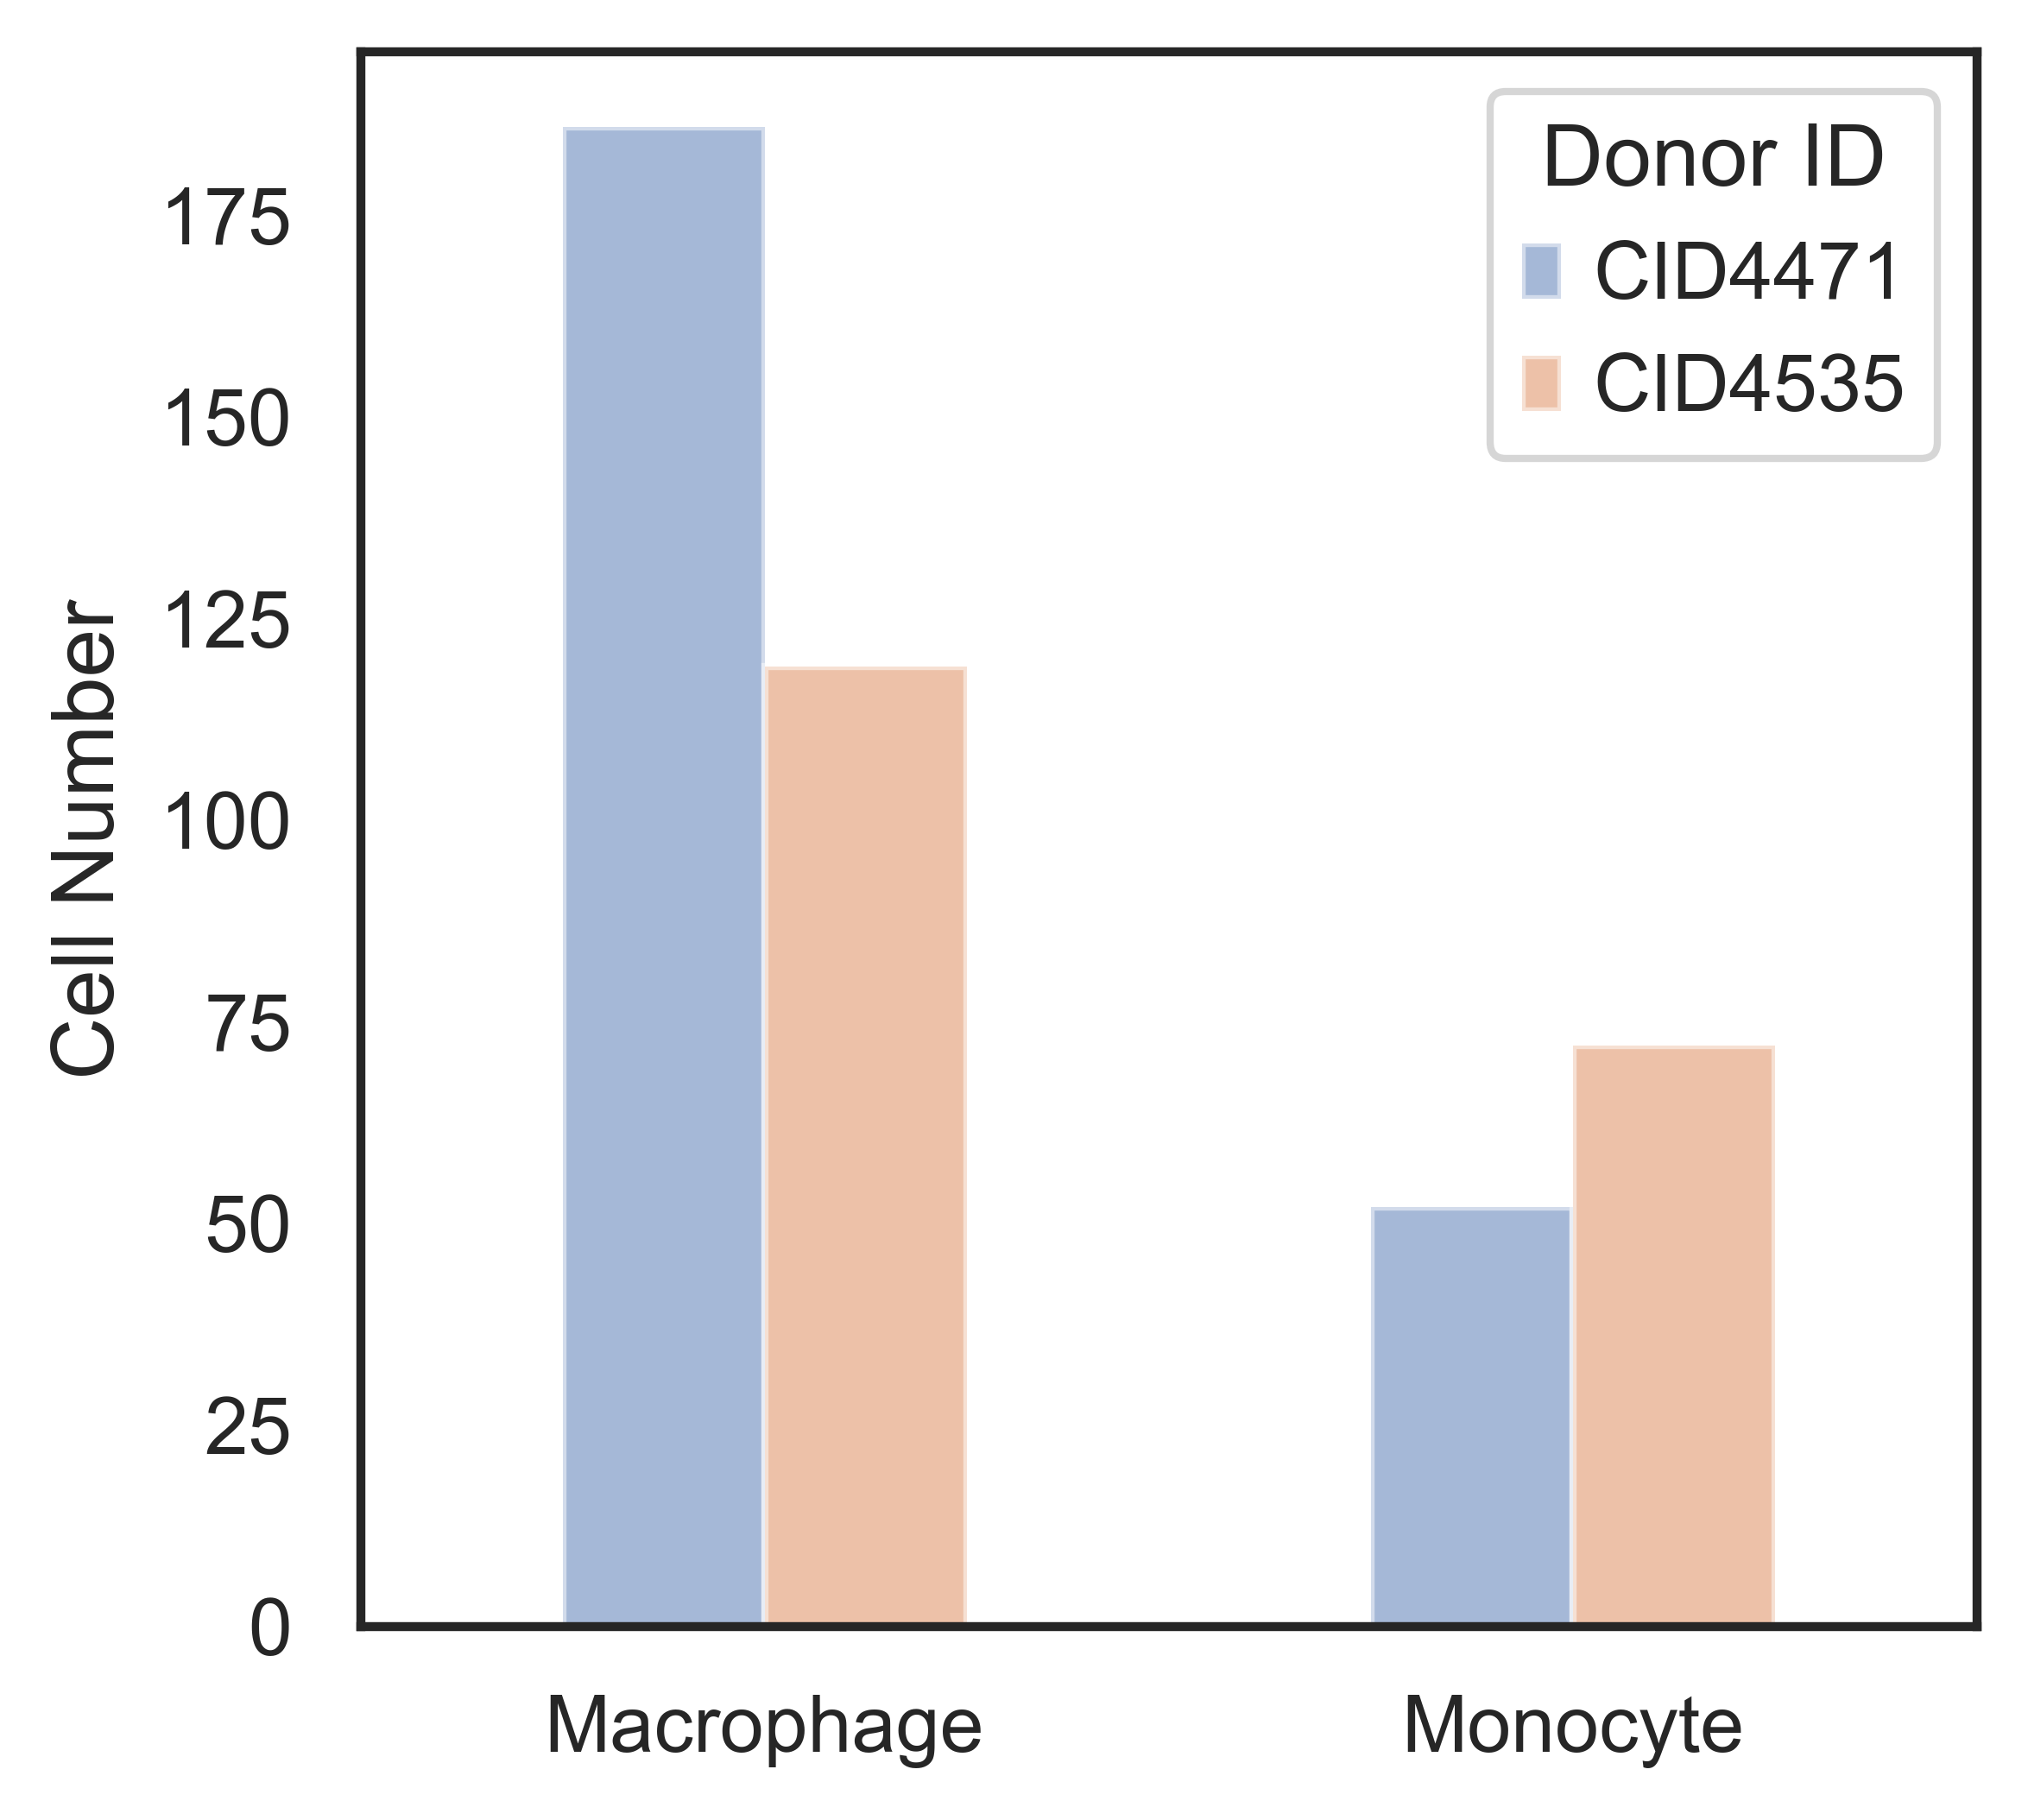

In [180]:
fig,ax=plt.subplots(figsize=(4,4))
tbl.loc[['Macrophage','Monocyte'],:].plot.bar(alpha=.5, ax=ax)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel('Cell Number')
ax.legend(title='Donor ID')

# TAM-Neg, specific genes

In [184]:
corr_result = pd.read_csv('../data/corr/spearmanr_pairwise.csv', index_col=0)

sel = corr_result[corr_result['FDR']<0.05]
print(sel.shape)

sel['cell'] = [x.split('_')[0] for x in sel['interaction']]
sel['gene'] = [x.split('_')[1] for x in sel['interaction']]
sel['Correlation'] = ['Positive' if x>0 else 'Negative' if x<0 else 'None' for x in sel['spearmanr']]

Counter(sel['cell'])

(651, 6)


Counter({'Stromal B cells': 1,
         'Stromal CD4 T cells': 29,
         'Stromal CD8 T cells': 10,
         'Stromal Treg cells': 12,
         'Stromal Macrophages': 466,
         'Tumor B cells': 2,
         'Tumor CD4 T cells': 7,
         'Tumor CD8 T cells': 2,
         'Tumor Treg cells': 50,
         'Tumor Macrophages': 72})

In [185]:
ma_predictors = sel[sel['cell'].isin(['Stromal Macrophages','Tumor Macrophages'])]
print(sum(ma_predictors['spearmanr']>0), ma_predictors.shape[0])

ma_neg_predictors = ma_predictors[ma_predictors['spearmanr']<0]
print(len(ma_neg_predictors['gene'].unique()))

17 538
483


In [187]:
ma_neg_predictors

interaction  spearmanr     pvals       FDR  \
105974    Stromal Macrophages_AASS  -0.879121  0.000075  0.038251   
105982  Stromal Macrophages_ABCA10  -0.879121  0.000075  0.038251   
105991   Stromal Macrophages_ABCA6  -0.901099  0.000026  0.026692   
105993   Stromal Macrophages_ABCA8  -0.923077  0.000007  0.019675   
105994   Stromal Macrophages_ABCA9  -0.906593  0.000019  0.024429   
...                            ...        ...       ...       ...   
263553       Tumor Macrophages_VIM  -0.868132  0.000119  0.044843   
263645  Tumor Macrophages_VTRNA2-1  -0.872941  0.000098  0.043135   
263925      Tumor Macrophages_YBX1  -0.862637  0.000147  0.049034   
264145     Tumor Macrophages_ZFP90  -0.862637  0.000147  0.049034   
264671    Tumor Macrophages_ZNF732  -0.895604  0.000035  0.029553   

                       cell      gene Correlation  
105974  Stromal Macrophages      AASS    Negative  
105982  Stromal Macrophages    ABCA10    Negative  
105991  Stromal Macrophages     ABCA6    Negative  
105993  Stromal Macrophages     ABCA8    Negative  
105994  Stromal Macrophages     ABCA9    Negative  
...                     ...       ...         ...  
263553    Tumor Macrophages       VIM    Negative  
263645    Tumor Macrophages  VTRNA2-1    Negative  
263925    Tumor Macrophages      YBX1    Negative  
264145    Tumor Macrophages     ZFP90    Negative  
264671    Tumor Macrophages    ZNF732    Negative  

[521 rows x 7 columns]

(array([  3.,   2.,   5.,   7.,  14.,  64.,  48., 121.,  92., 165.]),
 array([-0.99450549, -0.98131868, -0.96813187, -0.95494505, -0.94175824,
        -0.92857143, -0.91538462, -0.9021978 , -0.88901099, -0.87582418,
        -0.86263736]),
 <BarContainer object of 10 artists>)

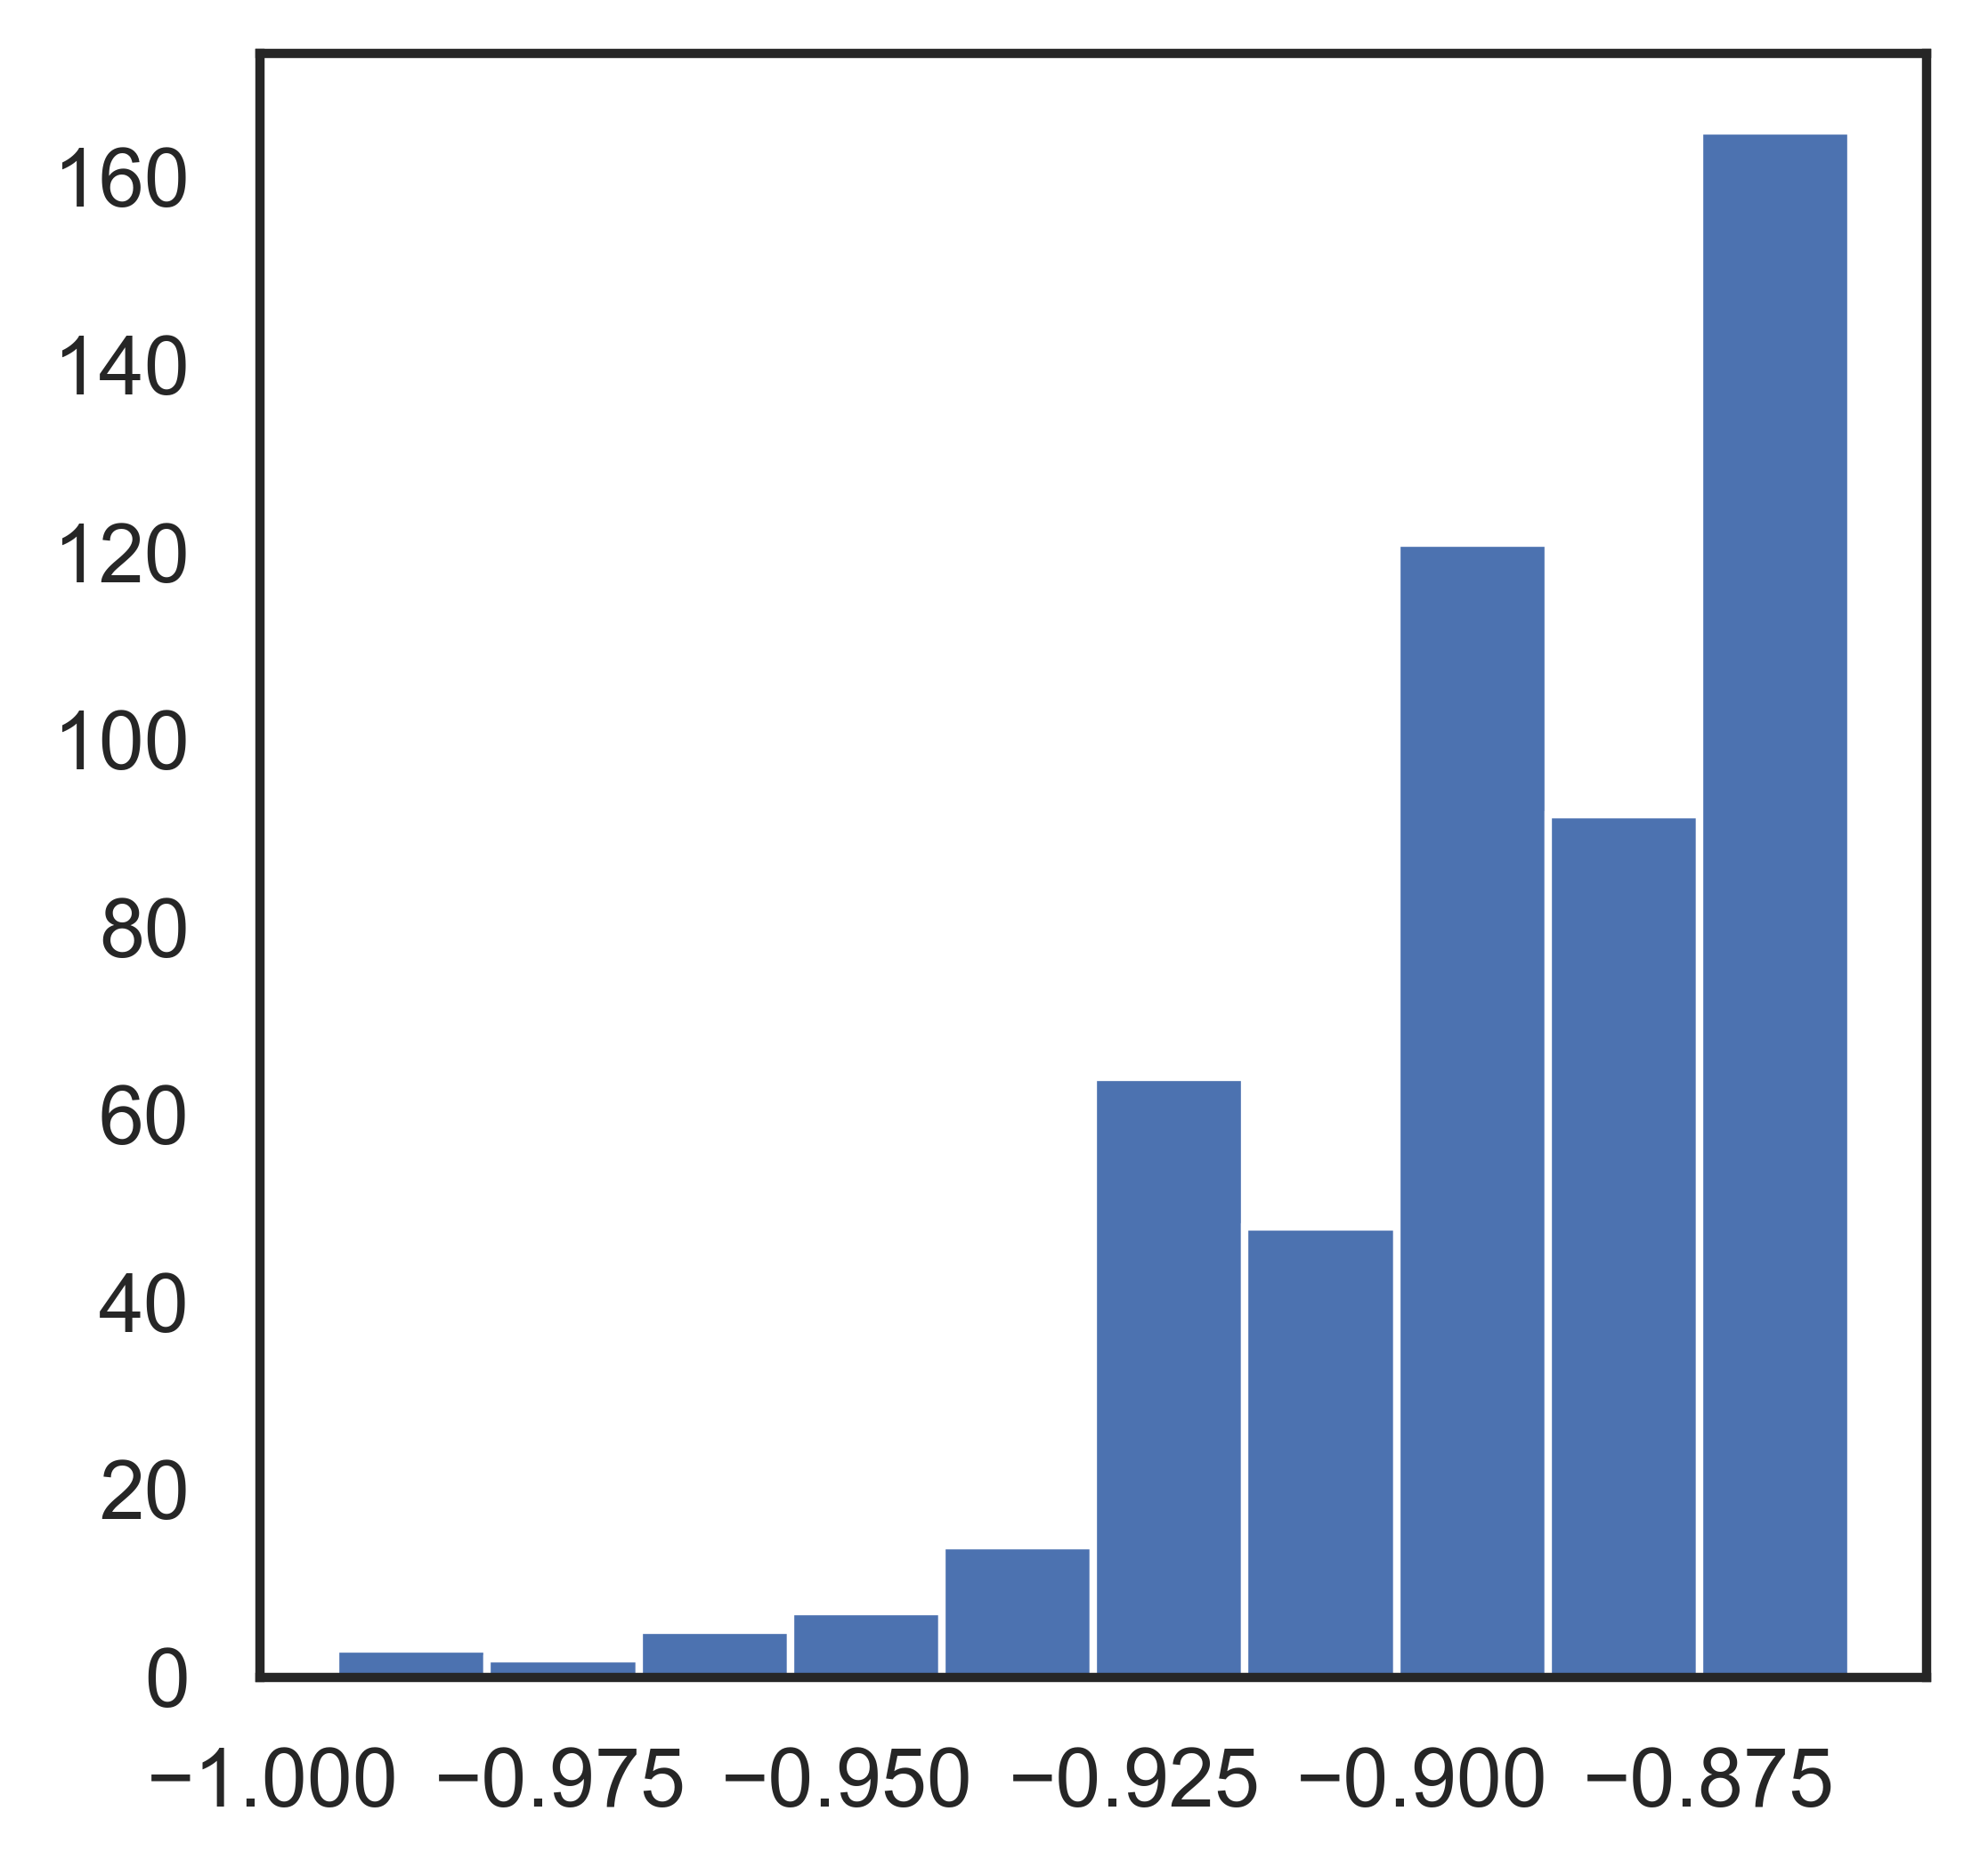

In [188]:
plt.hist(ma_neg_predictors['spearmanr'])

In [191]:
out = pd.DataFrame()

for fpath in glob('../data/tamneg/*20*'):
    
    name = os.path.basename(fpath).replace('_2023_table.txt','').replace('_2021_Human_table.txt','').replace('_2022_table.txt','').replace('_',' ')
    print(name)
    
    df = pd.read_csv(fpath, sep='\t')
    df['Gene_set'] = [name]*df.shape[0]
    out = pd.concat((out, df))
    
out


GO Cellular Component
Reactome
GO Biological Process
KEGG
GO Molecular Function


Term Overlap       P-value  \
0    Collagen-Containing Extracellular Matrix (GO:0...  48/373  1.833190e-21   
1                 Cell-Substrate Junction (GO:0030055)  30/395  3.544290e-08   
2                          Focal Adhesion (GO:0005925)  29/387  8.030618e-08   
3            Polymeric Cytoskeletal Fiber (GO:0099513)  19/265  2.604753e-05   
4                             Golgi Lumen (GO:0005796)  11/100  2.974593e-05   
..                                                 ...     ...           ...   
342                          mRNA Binding (GO:0003729)   3/282  9.681450e-01   
343      Cysteine-Type Peptidase Activity (GO:0008234)   1/144  9.707833e-01   
344     Ubiquitin Protein Ligase Activity (GO:0061630)   3/311  9.815607e-01   
345  Ubiquitin-Like Protein Ligase Activity (GO:006...   3/319  9.841829e-01   
346  Ubiquitin-Protein Transferase Activity (GO:000...   3/412  9.975118e-01   

     Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0        3.758039e-19            0                     0    6.516117   
1        3.632897e-06            0                     0    3.474916   
2        5.487589e-06            0                     0    3.418471   
3        1.219583e-03            0                     0    3.207781   
4        1.219583e-03            0                     0    5.087317   
..                ...          ...                   ...         ...   
342      9.792495e-01            0                     0    0.430959   
343      9.792495e-01            0                     0    0.281084   
344      9.870274e-01            0                     0    0.389793   
345      9.870274e-01            0                     0    0.379767   
346      9.975118e-01            0                     0    0.291993   

     Combined Score                                              Genes  \
0        311.133037  TNXB;COL16A1;SERPINE2;LAMA2;COL14A1;ELN;LAMA4;...   
1         59.613377  LRP1;NEXN;ILK;EGFR;ADD1;AKAP12;LIMA1;FLRT2;FLN...   
2         55.849001  LRP1;NEXN;ILK;EGFR;ADD1;AKAP12;LIMA1;FLRT2;FLN...   
3         33.860017  ANXA1;TPM4;MX2;LMOD1;ARHGAP6;MID1;DNM1;DNM3;TU...   
4         53.024178  MMP16;LUM;PROS1;OMD;OGN;GOLIM4;CSPG4;PRELP;PCS...   
..              ...                                                ...   
342        0.013952                                 SAMD4A;RBMS2;RBMS3   
343        0.008335                                               CTSK   
344        0.007255                                HERC3;RNF216;LONRF1   
345        0.006055                                HERC3;RNF216;LONRF1   
346        0.000727                                HERC3;RNF216;LONRF1   

                  Gene_set  
0    GO Cellular Component  
1    GO Cellular Component  
2    GO Cellular Component  
3    GO Cellular Component  
4    GO Cellular Component  
..                     ...  
342  GO Molecular Function  
343  GO Molecular Function  
344  GO Molecular Function  
345  GO Molecular Function  
346  GO Molecular Function  

[3792 rows x 10 columns]

In [193]:
paths = [x for x in out['Term'] if 'Extracellular Matrix' in x]
paths

['Collagen-Containing Extracellular Matrix (GO:0062023)',
 'Extracellular Matrix Organization R-HSA-1474244',
 'Degradation Of Extracellular Matrix R-HSA-1474228',
 'Extracellular Matrix Organization (GO:0030198)',
 'Regulation Of Extracellular Matrix Organization (GO:1903053)',
 'Extracellular Matrix Assembly (GO:0085029)',
 'Extracellular Matrix Disassembly (GO:0022617)',
 'Positive Regulation Of Extracellular Matrix Organization (GO:1903055)',
 'Regulation Of Extracellular Matrix Disassembly (GO:0010715)',
 'Positive Regulation Of Extracellular Matrix Disassembly (GO:0090091)']

In [197]:
# GO BP
g1 = out[out['Term']=='Extracellular Matrix Organization (GO:0030198)']['Genes'].values[0]
g1

'COL16A1;ECM2;COL14A1;ELN;LOXL4;DPT;NID1;ADAMTS5;ADAMTS3;FLRT2;ADAMTS1;CTSK;SH3PXD2B;CTSG;HMCN1;ADAMTS9;GSN;LUM;CCDC80;BMP1;LOX;MMP16;COL5A3;MMP19;TLL1;RECK;DDR2'

In [198]:
# GO CC
g2 = out[out['Term']=='Collagen-Containing Extracellular Matrix (GO:0062023)']['Genes'].values[0]
g2

'TNXB;COL16A1;SERPINE2;LAMA2;COL14A1;ELN;LAMA4;LTBP4;F13A1;LOXL4;DPT;FBLN1;LTBP2;PRELP;NID1;FBLN2;FBLN5;EFEMP2;ADAMTS3;ADAMTS1;ABI3BP;TIMP2;EMILIN2;ANXA8;CTSG;HMCN1;ADAMTS9;GDF10;ANXA1;LUM;PCOLCE;LAMB1;L1CAM;PODN;SOD3;DCN;MFAP4;CCDC80;SFRP2;LOX;MMRN1;COL5A3;OGN;S100A6;SERPING1;COL21A1;CSPG4;ANGPTL1'

In [201]:
# GO MF
g3 = out[out['Term']=='Metalloendopeptidase Activity (GO:0004222)']['Genes'].values[0]
g3

'ADAMTS5;BMP1;ADAMTS3;MMP16;ADAMTS1;PAPPA;ADAM22;ADAM33;MMP19;TLL1;ADAMTS9;CLCA4'

In [202]:
# KEGG
g4 = out[out['Term']=='Focal adhesion']['Genes'].values[0]
g4

'PDGFRB;TNXB;LAMA2;CAV2;ROCK2;CAV1;LAMA4;ILK;LAMB1;IGF1;EGFR;CCND2;FLNA;FLNC;TLN1;MYL9;VCL'

In [203]:
# Reactome
g5 = out[out['Term']=='Extracellular Matrix Organization R-HSA-1474244']['Genes'].values[0]
g5

'TNXB;COL16A1;LAMA2;COL14A1;LAMA4;LTBP4;LOXL4;FBLN1;NID1;FBLN2;FBLN5;ADAMTS5;EFEMP2;ADAMTS3;CAPN6;ADAMTS1;CTSK;TIMP2;CTSG;ADAMTS9;JAM3;LUM;PCOLCE;LAMB1;DCN;MFAP4;BMP1;MMP16;LOX;COL5A3;COL21A1;MMP19;TLL1;DDR2'

Then do overlap per Venn

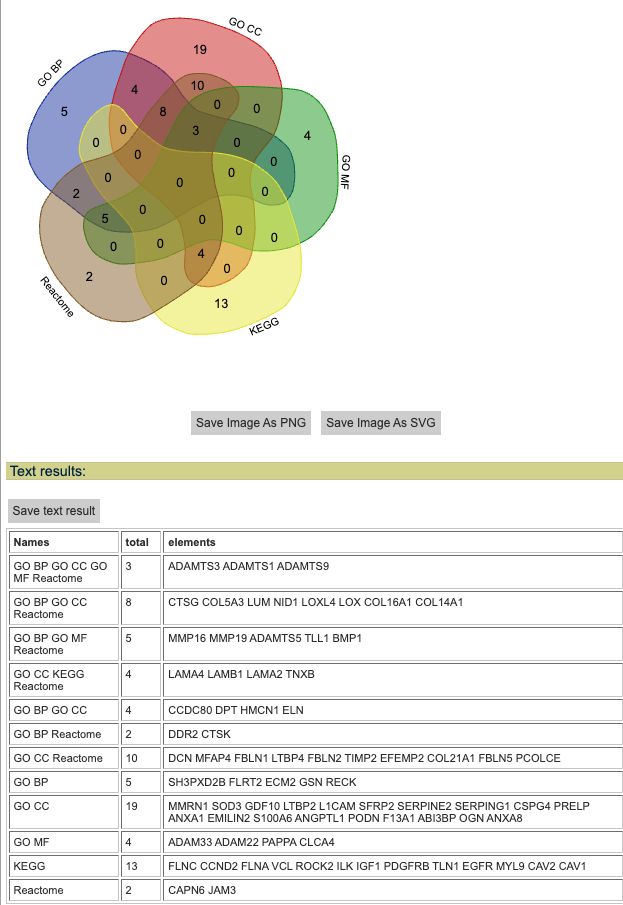

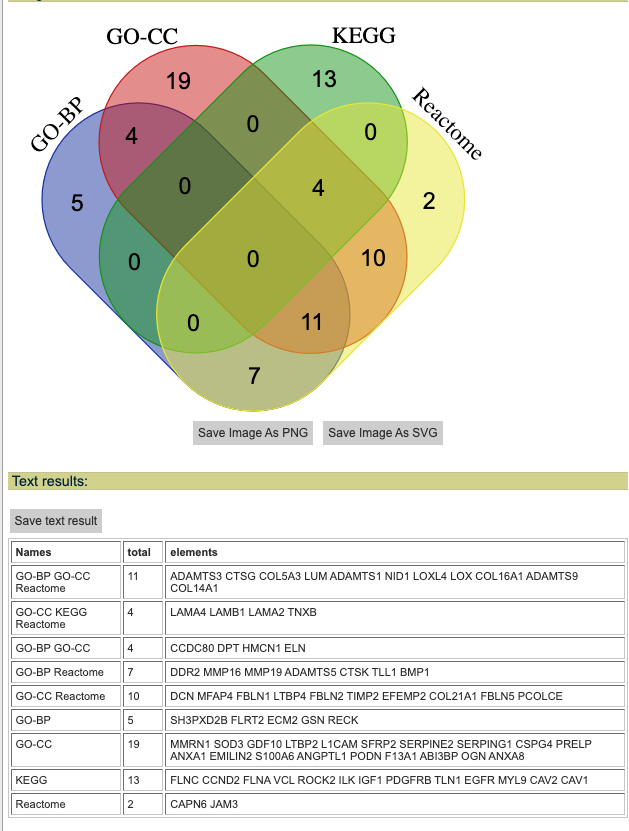

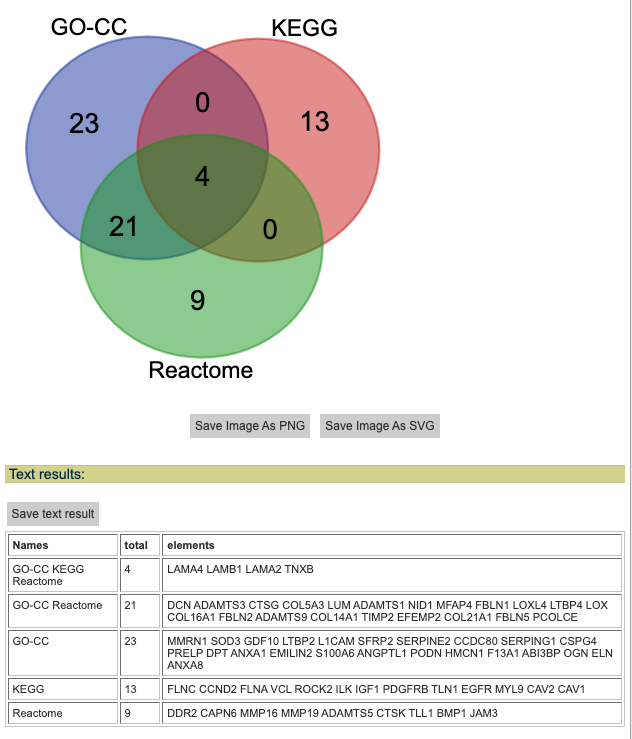

# Subgroup analysis per ILC

## Metabric

In [3]:
# metabric
meta = pd.read_csv('/Users/chelseachen/Library/CloudStorage/OneDrive-UniversityofPittsburgh/01_projects/publicds/database/metabric/brca_metabric_clinical_data.csv', index_col=0)
meta

Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
MB.0000      MB-0000             75.65             MASTECTOMY  Breast Cancer   
MB.0002      MB-0002             43.19      BREAST CONSERVING  Breast Cancer   
MB.0005      MB-0005             48.87             MASTECTOMY  Breast Cancer   
MB.0006      MB-0006             47.68             MASTECTOMY  Breast Cancer   
MB.0008      MB-0008             76.97             MASTECTOMY  Breast Cancer   
...              ...               ...                    ...            ...   
MTS.T2428  MTS-T2428             70.05                    NaN  Breast Cancer   
MTS.T2429  MTS-T2429             63.60                    NaN  Breast Cancer   
MTS.T2430  MTS-T2430               NaN                    NaN  Breast Cancer   
MTS.T2431  MTS-T2431               NaN                    NaN  Breast Cancer   
MTS.T2432  MTS-T2432               NaN                    NaN  Breast Cancer   

                                Cancer Type Detailed Cellularity Chemotherapy  \
MB.0000             Breast Invasive Ductal Carcinoma         NaN           NO   
MB.0002             Breast Invasive Ductal Carcinoma        High           NO   
MB.0005             Breast Invasive Ductal Carcinoma        High          YES   
MB.0006    Breast Mixed Ductal and Lobular Carcinoma    Moderate          YES   
MB.0008    Breast Mixed Ductal and Lobular Carcinoma        High          YES   
...                                              ...         ...          ...   
MTS.T2428                  Invasive Breast Carcinoma         NaN          NaN   
MTS.T2429                  Invasive Breast Carcinoma         NaN          NaN   
MTS.T2430                  Invasive Breast Carcinoma         NaN          NaN   
MTS.T2431                  Invasive Breast Carcinoma         NaN          NaN   
MTS.T2432                  Invasive Breast Carcinoma         NaN          NaN   

          Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
MB.0000                   claudin-low     1.0                  Positive  ...   
MB.0002                          LumA     1.0                  Positive  ...   
MB.0005                          LumB     1.0                  Positive  ...   
MB.0006                          LumB     1.0                  Positive  ...   
MB.0008                          LumB     1.0                  Positive  ...   
...                               ...     ...                       ...  ...   
MTS.T2428                         NaN     1.0                  Positive  ...   
MTS.T2429                         NaN     1.0                  Positive  ...   
MTS.T2430                         NaN     NaN                       NaN  ...   
MTS.T2431                         NaN     NaN                       NaN  ...   
MTS.T2432                         NaN     NaN                       NaN  ...   

          Relapse Free Status (Months)  Relapse Free Status  \
MB.0000                         138.65                  0.0   
MB.0002                          83.52                  0.0   
MB.0005                         151.28                  1.0   
MB.0006                         162.76                  0.0   
MB.0008                          18.55                  1.0   
...                                ...                  ...   
MTS.T2428                         4.93                  1.0   
MTS.T2429                        16.18                  1.0   
MTS.T2430                          NaN                  NaN   
MTS.T2431                          NaN                  NaN   
MTS.T2432                          NaN                  NaN   

          Number of Samples Per Patient Sample Type     Sex  \
MB.0000                               1     Primary  Female   
MB.0002                               1     Primary  Female   
MB.0005                               1     Primary  Female   
MB.0006                               1     Primary  Female   
MB.0008                               1    

In [4]:
gsva = pd.read_csv('../data/deconv/deconvolute_tams_metabric.csv', index_col=0).T
gsva

ma_neg_pred  M1_modified  M2_modified   TAM_IFN   TAM_Reg  \
MB.0000     0.354146     0.415311     0.386237  0.519601  0.360611   
MB.0002     0.122240     0.358477     0.365261  0.295175  0.114916   
MB.0005     0.191857     0.409527     0.412835  0.433769  0.185241   
MB.0006     0.240177     0.457250     0.426857  0.549153  0.334489   
MB.0008     0.104125     0.431467     0.408005  0.584634  0.359588   
...              ...          ...          ...       ...       ...   
MB.7295     0.294528     0.458193     0.421390  0.523969  0.474415   
MB.7296     0.149290     0.448043     0.433864  0.539800  0.455730   
MB.7297     0.121453     0.467608     0.425438  0.528775  0.557388   
MB.7298     0.135601     0.469994     0.429364  0.596277  0.534889   
MB.7299     0.199781     0.483328     0.446924  0.670139  0.561452   

         TAM_Inflam  TAM_Angio    TAM_LA  TAM_prolif  
MB.0000    0.518728   0.415778  0.672837    0.479064  
MB.0002    0.110010   0.229015  0.451710    0.626043  
MB.0005    0.416584   0.438550  0.651843    0.668672  
MB.0006    0.304427   0.402882  0.616019    0.606045  
MB.0008    0.293692   0.319183  0.659664    0.746942  
...             ...        ...       ...         ...  
MB.7295    0.407187   0.450278  0.705266    0.711430  
MB.7296    0.394739   0.446044  0.701604    0.833218  
MB.7297    0.458500   0.429311  0.708615    0.775175  
MB.7298    0.323409   0.409582  0.718881    0.742197  
MB.7299    0.398378   0.462526  0.741747    0.729209  

[1981 rows x 9 columns]

In [5]:
meta_sel = meta[meta['ER Status']=='Positive']
print(f'{meta_sel.shape[0]} patients with ER+ tumors')

meta_sel = meta_sel.loc[[x for x in meta_sel.index if x in gsva.index],:]
print(f'{meta_sel.shape[0]} patients with ER+ tumors with gsva data')

1825 patients with ER+ tumors
1505 patients with ER+ tumors with gsva data


In [6]:
Counter(meta_sel['Cancer Type Detailed'])

Counter({'Breast Invasive Ductal Carcinoma': 1125,
         'Breast Mixed Ductal and Lobular Carcinoma': 197,
         'Breast Invasive Lobular Carcinoma': 124,
         'Invasive Breast Carcinoma': 25,
         'Breast Invasive Mixed Mucinous Carcinoma': 22,
         'Breast': 12})

In [7]:
124 + 25 + 22 + 12

183

### IDC

In [8]:
df = pd.read_csv('../data/survival/METABRIC_DFS_IDC.csv', index_col=0)
df['outcome'] = ['DFS']*df.shape[0]
df1 = df
df1

exp(coef)  exp(-coef)  lower .95  upper .95      pval  \
Sighigh               0.794018    1.259417   0.624868   1.008957  0.059159   
HER2_statusPositive   1.833783    0.545321   1.329513   2.529315  0.000219   
PR_statusPositive     0.918104    1.089201   0.733178   1.149673  0.456536   
agedx                 0.994688    1.005340   0.985611   1.003849  0.254817   
Tumor_size            1.009592    0.990499   1.001505   1.017745  0.020001   
Tumor_stage           1.576781    0.634203   1.277723   1.945835  0.000022   

                    outcome  
Sighigh                 DFS  
HER2_statusPositive     DFS  
PR_statusPositive       DFS  
agedx                   DFS  
Tumor_size              DFS  
Tumor_stage             DFS

In [9]:
df = pd.read_csv('../data/survival/METABRIC_OS_IDC.csv', index_col=0)
df['outcome'] = ['OS']*df.shape[0]
df2 = df
df2

exp(coef)  exp(-coef)  lower .95  upper .95  \
Sighigh               0.644274    1.552134   0.491699   0.844194   
HER2_statusPositive   1.626912    0.614661   1.193649   2.217439   
PR_statusPositive     0.940547    1.063211   0.773991   1.142944   
agedx                 1.039926    0.961606   1.030933   1.048999   
Tumor_size            1.006470    0.993572   0.999920   1.013062   
Tumor_stage           1.479897    0.675723   1.238886   1.767795   

                             pval outcome  
Sighigh              1.431147e-03      OS  
HER2_statusPositive  2.067716e-03      OS  
PR_statusPositive    5.376424e-01      OS  
agedx                1.010177e-18      OS  
Tumor_size           5.286493e-02      OS  
Tumor_stage          1.547296e-05      OS

In [10]:
var_test_keys = {'Sighigh':'TAM-Low Score High',
#                  'HistologyILC':'ILC vs Other Histology',
                 'HER2_statusPositive':'HER2 Positive',
                 'PR_statusPositive':'PR Positive',
                 'agedx':'Age at Diagnosis',
                 'Tumor_size':'Tumor Size',
                 'Tumor_stage':'Tumor Stage'
                }

outcome_keys = {'DFS':'Relapse Free Survival', 'OS':'Overall Survival'}

In [11]:
df = pd.concat((df1,df2))
df['group'] = df.index; df = df.loc[var_test_keys.keys(),:]
df['label'] = [var_test_keys[k] for k in df.index]
df['placeholder'] = ['']*df.shape[0]
df

exp(coef)  exp(-coef)  lower .95  upper .95  \
Sighigh               0.794018    1.259417   0.624868   1.008957   
Sighigh               0.644274    1.552134   0.491699   0.844194   
HER2_statusPositive   1.833783    0.545321   1.329513   2.529315   
HER2_statusPositive   1.626912    0.614661   1.193649   2.217439   
PR_statusPositive     0.918104    1.089201   0.733178   1.149673   
PR_statusPositive     0.940547    1.063211   0.773991   1.142944   
agedx                 0.994688    1.005340   0.985611   1.003849   
agedx                 1.039926    0.961606   1.030933   1.048999   
Tumor_size            1.009592    0.990499   1.001505   1.017745   
Tumor_size            1.006470    0.993572   0.999920   1.013062   
Tumor_stage           1.576781    0.634203   1.277723   1.945835   
Tumor_stage           1.479897    0.675723   1.238886   1.767795   

                             pval outcome                group  \
Sighigh              5.915909e-02     DFS              Sighigh   
Sighigh              1.431147e-03      OS              Sighigh   
HER2_statusPositive  2.191038e-04     DFS  HER2_statusPositive   
HER2_statusPositive  2.067716e-03      OS  HER2_statusPositive   
PR_statusPositive    4.565361e-01     DFS    PR_statusPositive   
PR_statusPositive    5.376424e-01      OS    PR_statusPositive   
agedx                2.548174e-01     DFS                agedx   
agedx                1.010177e-18      OS                agedx   
Tumor_size           2.000071e-02     DFS           Tumor_size   
Tumor_size           5.286493e-02      OS           Tumor_size   
Tumor_stage          2.195639e-05     DFS          Tumor_stage   
Tumor_stage          1.547296e-05      OS          Tumor_stage   

                                  label placeholder  
Sighigh              TAM-Low Score High              
Sighigh              TAM-Low Score High              
HER2_statusPositive       HER2 Positive              
HER2_statusPositive       HER2 Positive              
PR_statusPositive           PR Positive              
PR_statusPositive           PR Positive              
agedx                  Age at Diagnosis              
agedx                  Age at Diagnosis              
Tumor_size                   Tumor Size              
Tumor_size                   Tumor Size              
Tumor_stage                 Tumor Stage              
Tumor_stage                 Tumor Stage

Text(0.5, 1.0, 'METABRIC ER+ NSTs\nRelapse Free Survival')

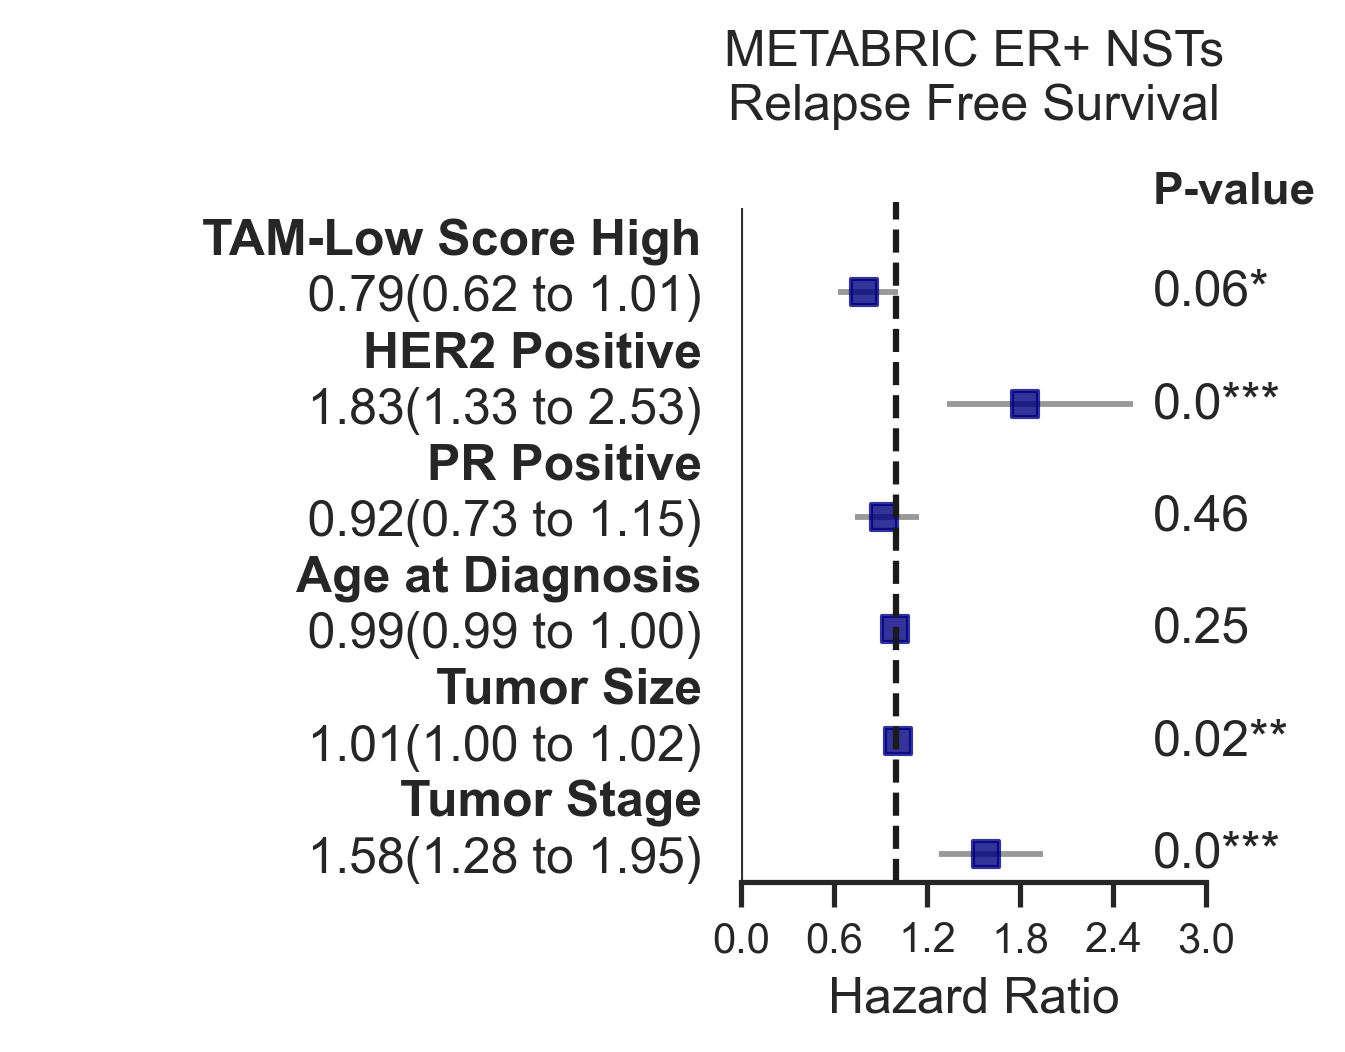

In [15]:
dfp = df[df['outcome']=='DFS']
color='navy'; title='METABRIC ER+ NSTs\nRelapse Free Survival'

ax = fp.forestplot(dfp,  figsize=(2,3),# the dataframe with results data
              estimate="exp(coef)",  # col containing estimated effect size 
              ll="lower .95", hl="upper .95",  # columns containing conf. int. lower and higher limits
              groupvar='label',
              varlabel='placeholder',  # column containing variable label
              pval = 'pval',
              sort=False,  # sort in ascending order (sorts within group if group is specified)               
              color_alt_rows=False,  # Gray alternate rows
              **{"ylabel1_size": 11}, # control size of printed ylabel
              flush=False, 
              fontfamily='Sans Serif', markercolor=color,
                   decimal_precision= 2
              )

ax.axvline(x=1, linestyle='--',color='k')
ax.set_xlim([0,3])
ax.set_xlabel('Hazard Ratio')
ax.set_title(title, pad=20)

Text(0.5, 1.0, 'METABRIC ER+ NSTs\nOverall Survival')

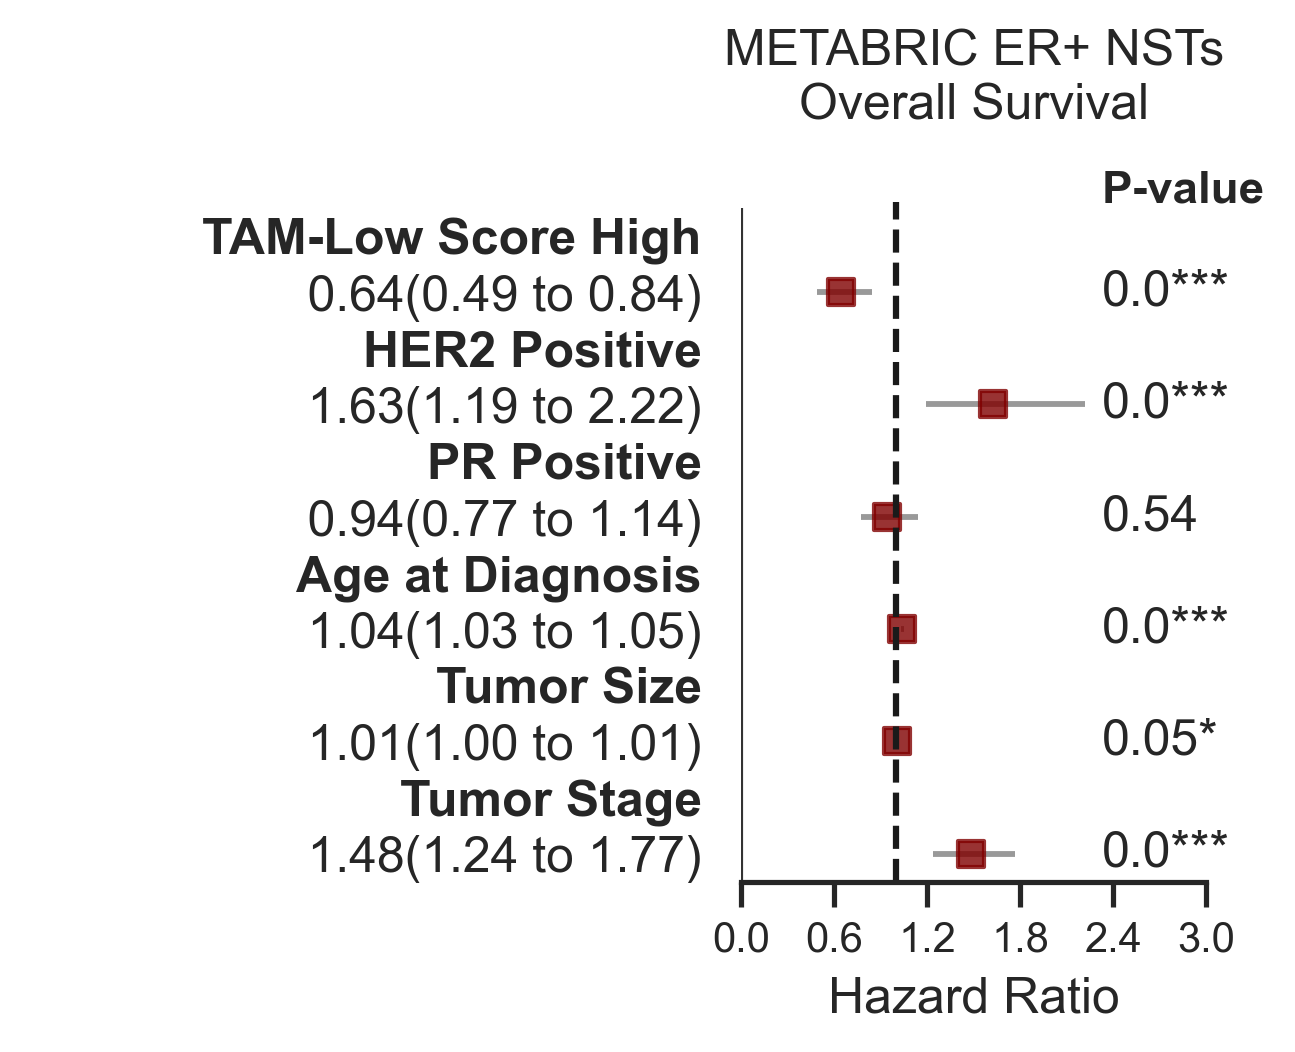

In [16]:
dfp = df[df['outcome']=='OS']
color='maroon'; title='METABRIC ER+ NSTs\nOverall Survival'

ax = fp.forestplot(dfp,  figsize=(2,3),# the dataframe with results data
              estimate="exp(coef)",  # col containing estimated effect size 
              ll="lower .95", hl="upper .95",  # columns containing conf. int. lower and higher limits
              groupvar="label",  # column containing variable label
              varlabel='placeholder',
              pval = 'pval',
              sort=False,  # sort in ascending order (sorts within group if group is specified)               
              color_alt_rows=False,  # Gray alternate rows
              **{"ylabel1_size": 11}, # control size of printed ylabel
              flush=False, 
              fontfamily='Sans Serif', markercolor=color,
                   decimal_precision= 2
              )

ax.axvline(x=1, linestyle='--',color='k')
ax.set_xlim([0,3])
ax.set_xlabel('Hazard Ratio')
ax.set_title(title, pad=20)

### ILC

In [17]:
df = pd.read_csv('../data/survival/METABRIC_DFS_ILC.csv', index_col=0)
df['outcome'] = ['DFS']*df.shape[0]
df1 = df
df1

exp(coef)  exp(-coef)  lower .95  upper .95      pval  \
Sighigh               0.521266    1.918406   0.212439   1.279044  0.154862   
HER2_statusPositive   3.108768    0.321671   0.689057  14.025604  0.140084   
PR_statusPositive     0.948211    1.054617   0.457864   1.963691  0.886157   
agedx                 1.009853    0.990243   0.977890   1.042861  0.550184   
Tumor_size            1.002579    0.997428   0.982537   1.023030  0.802587   
Tumor_stage           2.344477    0.426534   1.291199   4.256952  0.005115   

                    outcome  
Sighigh                 DFS  
HER2_statusPositive     DFS  
PR_statusPositive       DFS  
agedx                   DFS  
Tumor_size              DFS  
Tumor_stage             DFS

In [18]:
df = pd.read_csv('../data/survival/METABRIC_OS_ILC.csv', index_col=0)
df['outcome'] = ['OS']*df.shape[0]
df2 = df
df2

exp(coef)  exp(-coef)  lower .95  upper .95      pval  \
Sighigh               0.926703    1.079094   0.478279   1.795561  0.821542   
HER2_statusPositive   4.406410    0.226942   1.274631  15.232990  0.019110   
PR_statusPositive     1.106085    0.904090   0.581909   2.102429  0.758322   
agedx                 1.075641    0.929678   1.042271   1.110080  0.000006   
Tumor_size            1.004520    0.995500   0.987114   1.022234  0.613053   
Tumor_stage           2.072113    0.482599   1.129583   3.801095  0.018593   

                    outcome  
Sighigh                  OS  
HER2_statusPositive      OS  
PR_statusPositive        OS  
agedx                    OS  
Tumor_size               OS  
Tumor_stage              OS

In [19]:
var_test_keys = {'Sighigh':'TAM-Low Score High',
#                  'HistologyILC':'ILC vs Other Histology',
                 'HER2_statusPositive':'HER2 Positive',
                 'PR_statusPositive':'PR Positive',
                 'agedx':'Age at Diagnosis',
                 'Tumor_size':'Tumor Size',
                 'Tumor_stage':'Tumor Stage'
                }

outcome_keys = {'DFS':'Relapse Free Survival', 'OS':'Overall Survival'}

In [20]:
df = pd.concat((df1,df2))
df['group'] = df.index; df = df.loc[var_test_keys.keys(),:]
df['label'] = [var_test_keys[k] for k in df.index]
df['placeholder'] = ['']*df.shape[0]
df

exp(coef)  exp(-coef)  lower .95  upper .95      pval  \
Sighigh               0.521266    1.918406   0.212439   1.279044  0.154862   
Sighigh               0.926703    1.079094   0.478279   1.795561  0.821542   
HER2_statusPositive   3.108768    0.321671   0.689057  14.025604  0.140084   
HER2_statusPositive   4.406410    0.226942   1.274631  15.232990  0.019110   
PR_statusPositive     0.948211    1.054617   0.457864   1.963691  0.886157   
PR_statusPositive     1.106085    0.904090   0.581909   2.102429  0.758322   
agedx                 1.009853    0.990243   0.977890   1.042861  0.550184   
agedx                 1.075641    0.929678   1.042271   1.110080  0.000006   
Tumor_size            1.002579    0.997428   0.982537   1.023030  0.802587   
Tumor_size            1.004520    0.995500   0.987114   1.022234  0.613053   
Tumor_stage           2.344477    0.426534   1.291199   4.256952  0.005115   
Tumor_stage           2.072113    0.482599   1.129583   3.801095  0.018593   

                    outcome                group               label  \
Sighigh                 DFS              Sighigh  TAM-Low Score High   
Sighigh                  OS              Sighigh  TAM-Low Score High   
HER2_statusPositive     DFS  HER2_statusPositive       HER2 Positive   
HER2_statusPositive      OS  HER2_statusPositive       HER2 Positive   
PR_statusPositive       DFS    PR_statusPositive         PR Positive   
PR_statusPositive        OS    PR_statusPositive         PR Positive   
agedx                   DFS                agedx    Age at Diagnosis   
agedx                    OS                agedx    Age at Diagnosis   
Tumor_size              DFS           Tumor_size          Tumor Size   
Tumor_size               OS           Tumor_size          Tumor Size   
Tumor_stage             DFS          Tumor_stage         Tumor Stage   
Tumor_stage              OS          Tumor_stage         Tumor Stage   

                    placeholder  
Sighigh                          
Sighigh                          
HER2_statusPositive              
HER2_statusPositive              
PR_statusPositive                
PR_statusPositive                
agedx                            
agedx                            
Tumor_size                       
Tumor_size                       
Tumor_stage                      
Tumor_stage

Text(0.5, 1.0, 'METABRIC ER+ ILCs\nRelapse Free Survival')

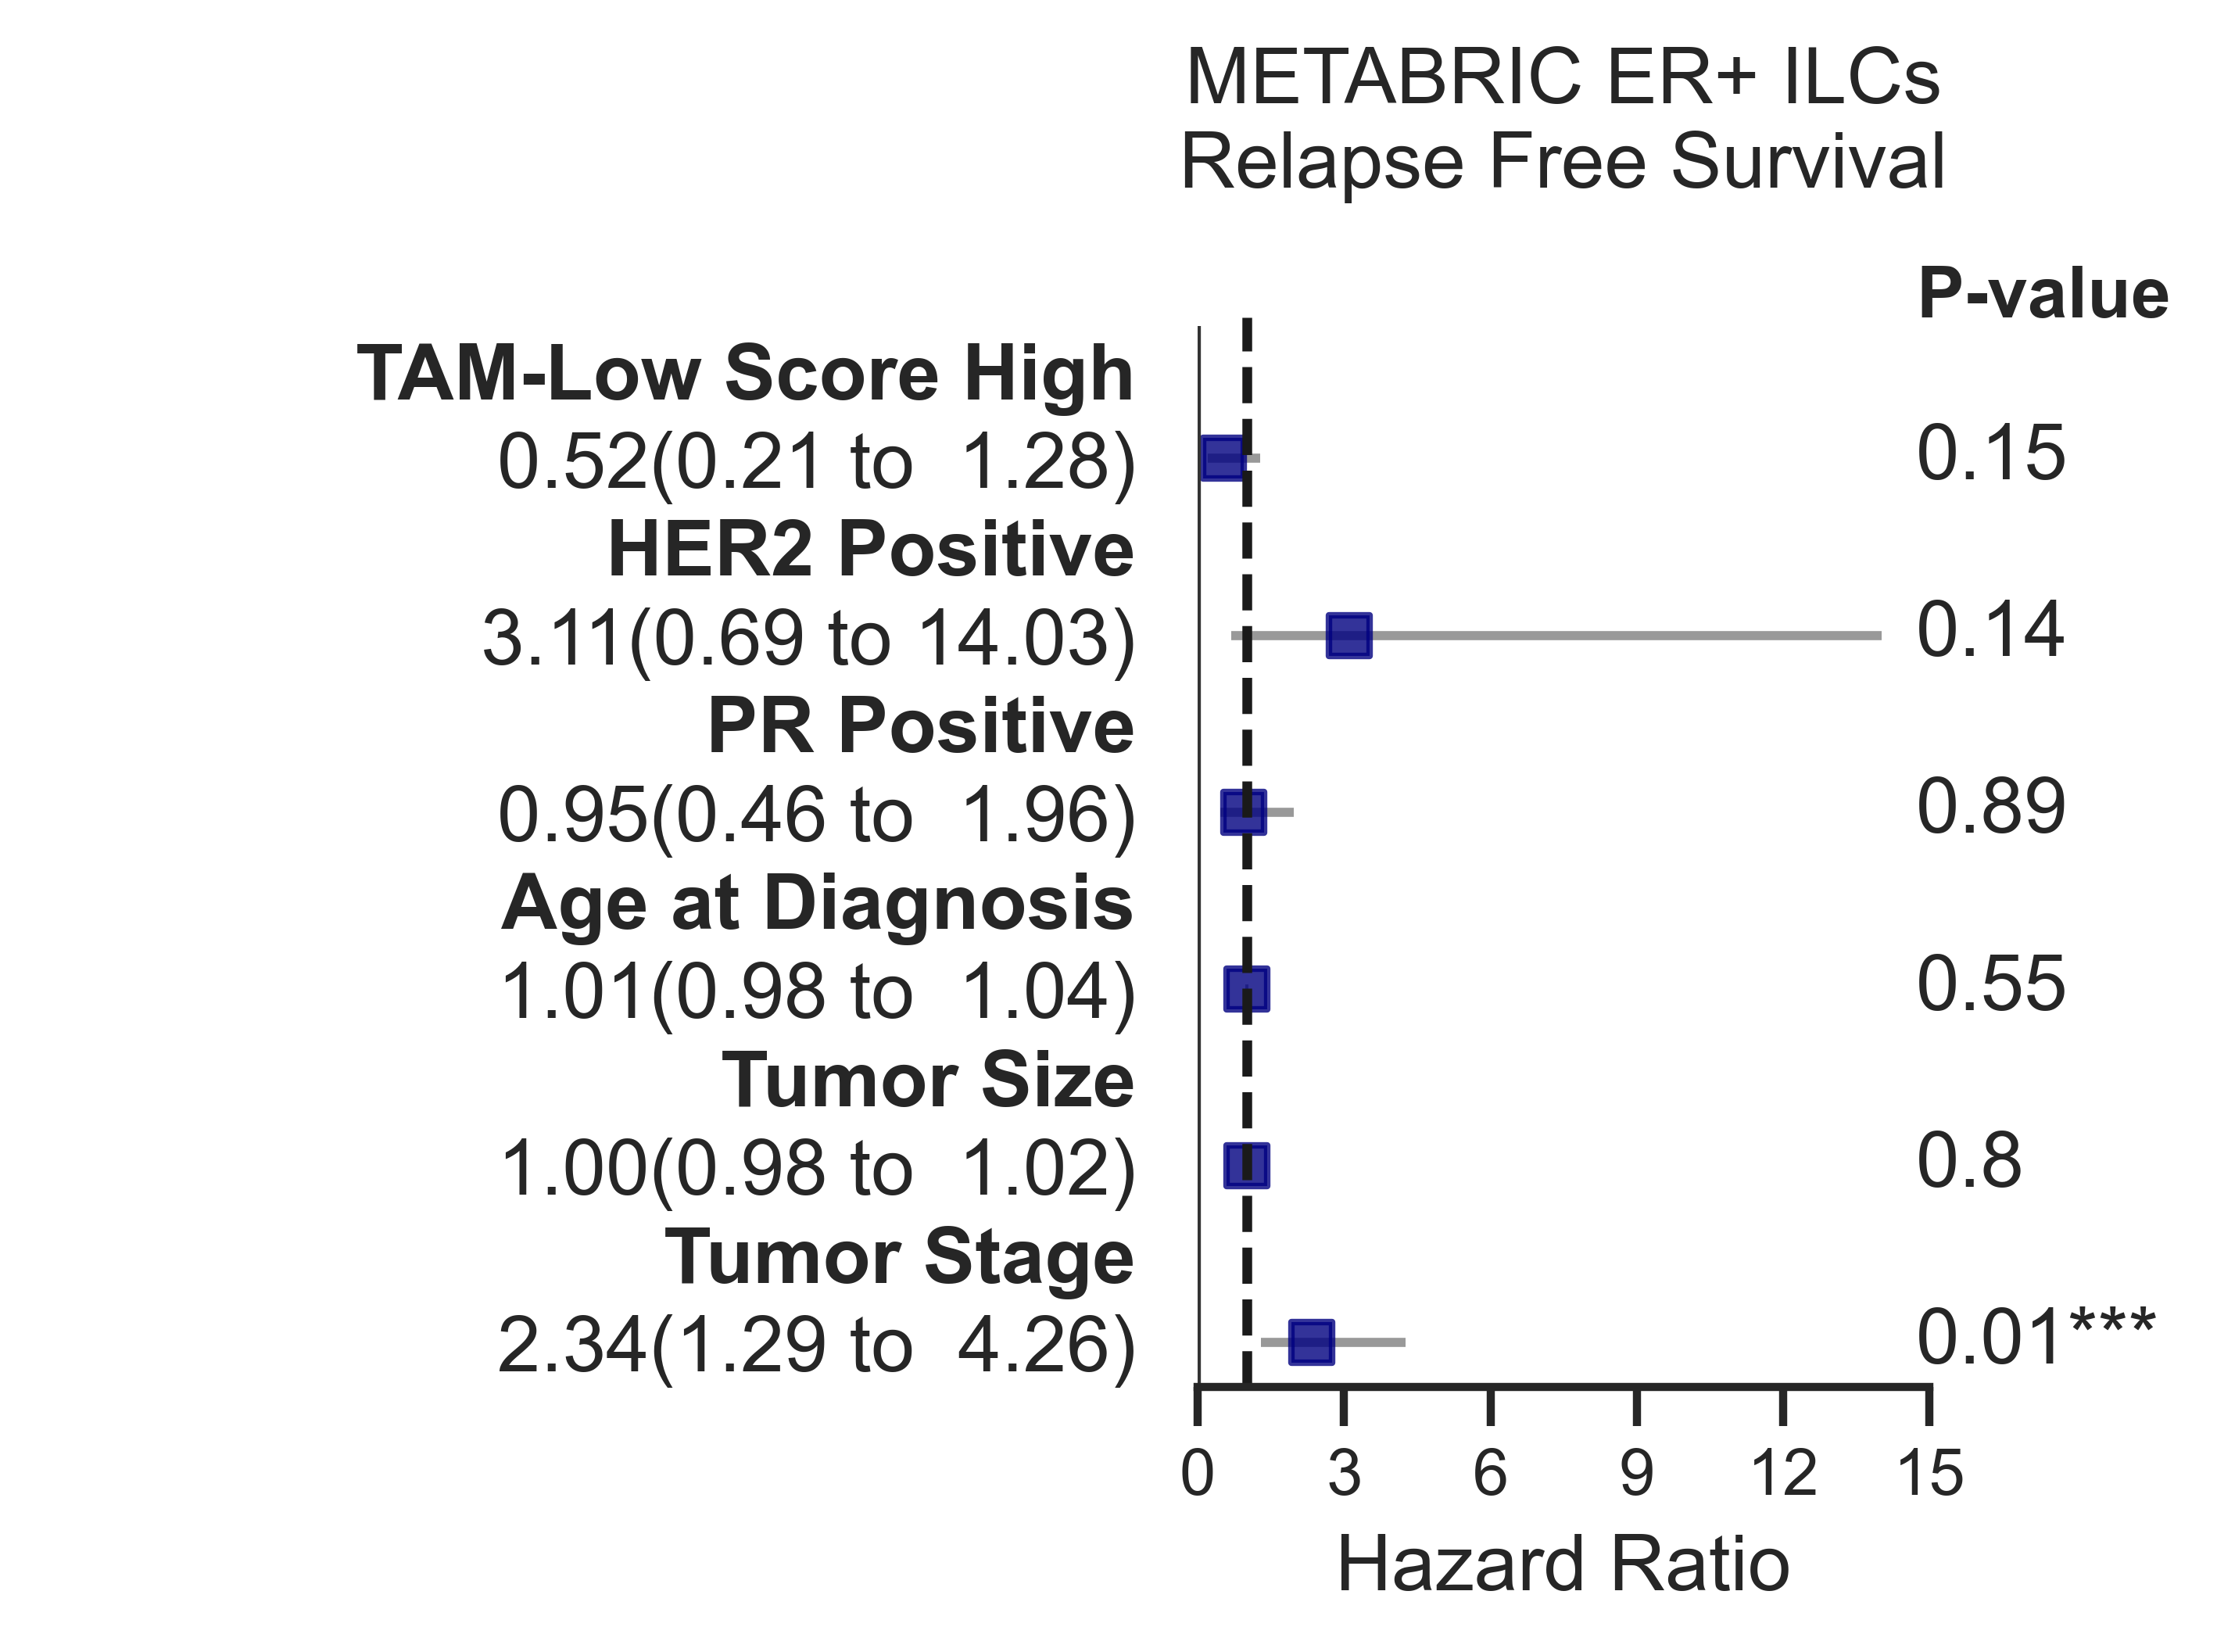

In [253]:
dfp = df[df['outcome']=='DFS']
color='navy'; title='METABRIC ER+ ILCs\nRelapse Free Survival'

ax = fp.forestplot(dfp,  figsize=(2,3),# the dataframe with results data
              estimate="exp(coef)",  # col containing estimated effect size 
              ll="lower .95", hl="upper .95",  # columns containing conf. int. lower and higher limits
              groupvar='label',
              varlabel='placeholder',  # column containing variable label
              pval = 'pval',
              sort=False,  # sort in ascending order (sorts within group if group is specified)               
              color_alt_rows=False,  # Gray alternate rows
              **{"ylabel1_size": 11}, # control size of printed ylabel
              flush=False, 
              fontfamily='Sans Serif', markercolor=color,
                   decimal_precision= 2
              )

ax.axvline(x=1, linestyle='--',color='k')
ax.set_xlim([0,15])
ax.set_xlabel('Hazard Ratio')
ax.set_title(title, pad=20)

Text(0.5, 1.0, 'METABRIC ER+ ILCs\nOverall Survival')

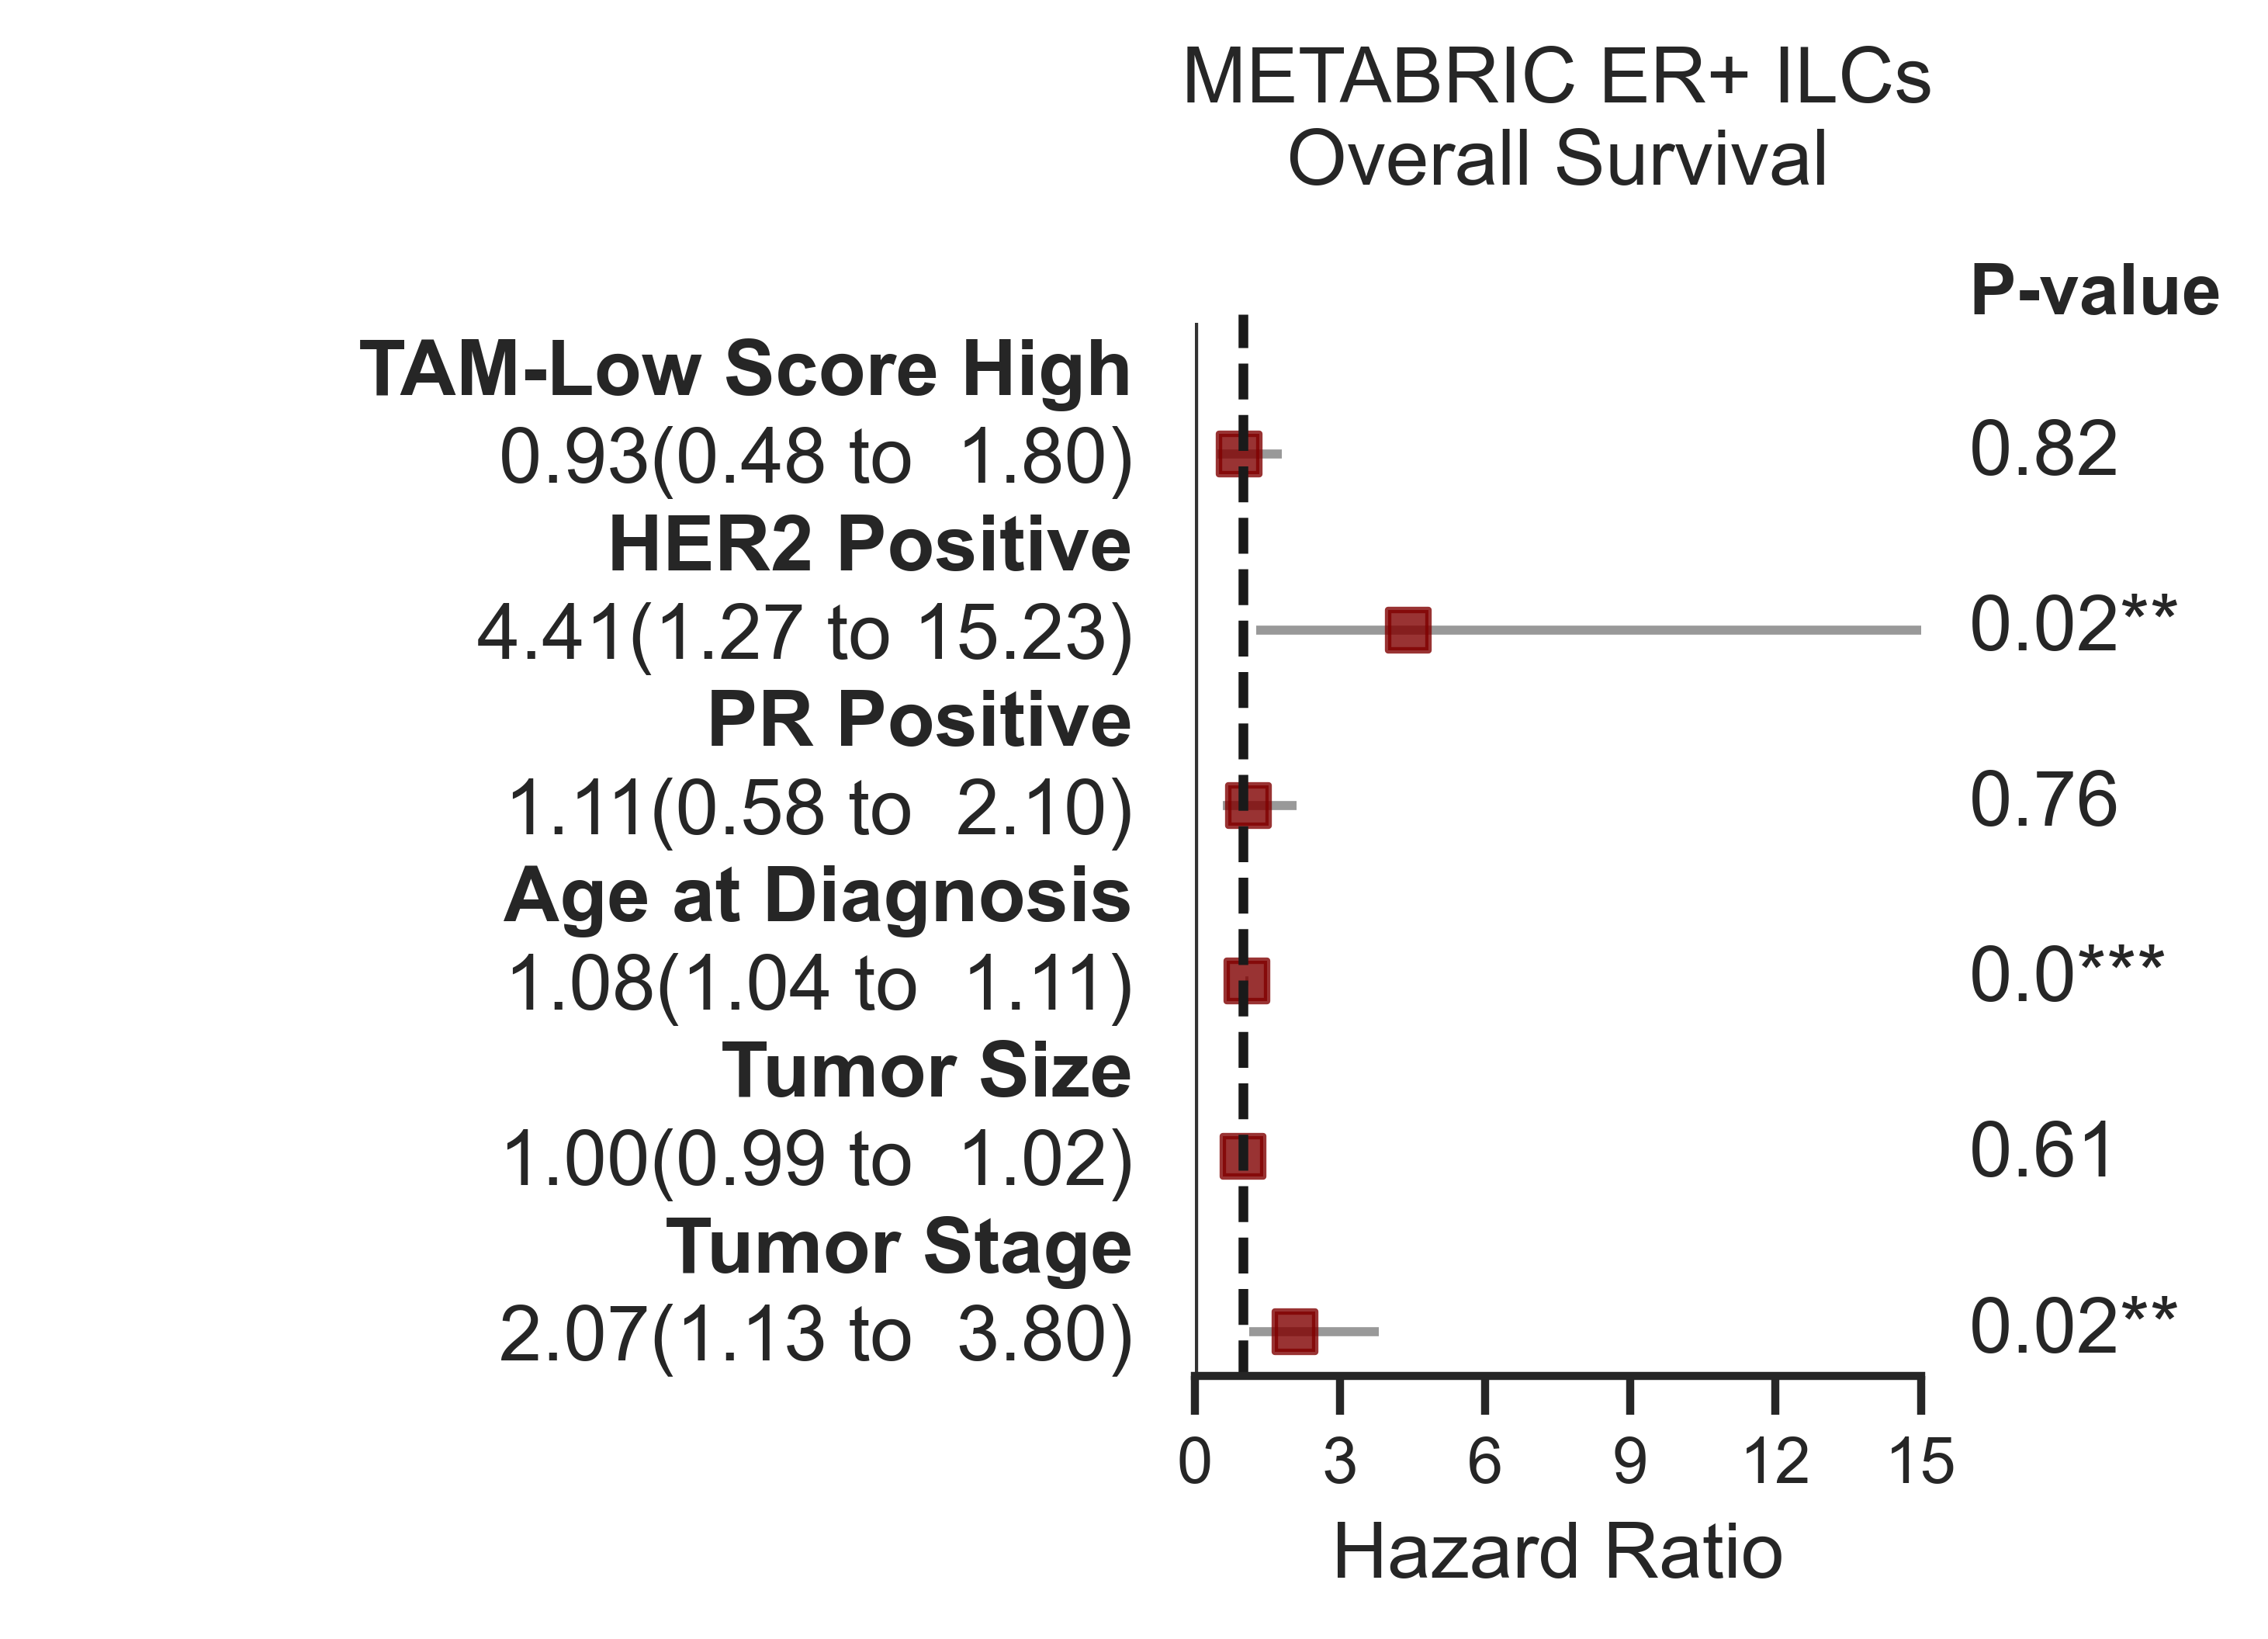

In [254]:
dfp = df[df['outcome']=='OS']
color='maroon'; title='METABRIC ER+ ILCs\nOverall Survival'

ax = fp.forestplot(dfp,  figsize=(2,3),# the dataframe with results data
              estimate="exp(coef)",  # col containing estimated effect size 
              ll="lower .95", hl="upper .95",  # columns containing conf. int. lower and higher limits
              groupvar="label",  # column containing variable label
              varlabel='placeholder',
              pval = 'pval',
              sort=False,  # sort in ascending order (sorts within group if group is specified)               
              color_alt_rows=False,  # Gray alternate rows
              **{"ylabel1_size": 11}, # control size of printed ylabel
              flush=False, 
              fontfamily='Sans Serif', markercolor=color,
                   decimal_precision= 2
              )

ax.axvline(x=1, linestyle='--',color='k')
ax.set_xlim([0,15])
ax.set_xlabel('Hazard Ratio')
ax.set_title(title, pad=20)

## SCAN-B

In [21]:
meta = pd.read_csv('/Users/chelseachen/Library/CloudStorage/OneDrive-UniversityofPittsburgh/01_projects/publicds/database/scanb/Clinical features SCANB.tsv', index_col=0, sep='\t')
meta.index = [x.split('.')[0] for x in meta.index]

meta.columns

Index(['Adjuvant_Endo', 'Adjuvant_Cyto', 'Adjuvant_HER2', 'Adjuvant_Endo_only',
       'Adjuvant_Cyto_only', 'Adjuvant_HER2_only', 'Adjuvant_Endo_and_Cyto',
       'Adjuvant_Endo_and_HER2', 'Adjuvant_Cyto_and_HER2',
       'Adjuvant_Endo_and_Cyto_only', 'Adjuvant_Endo_and_HER2_only',
       'Adjuvant_Cyto_and_HER2_only', 'Adjuvant_Endo_and_Cyto_and_HER2_only',
       'Adjuvant_No_Systemic', 'OS_days', 'OS_months', 'OS_years', 'OS_event',
       'Age', 'TumorSize', 'TStage', 'NStage', 'MStage', 'Node_group',
       'Histological_Type', 'ER_1perc', 'ER_10perc', 'PgR_1perc', 'PgR_10perc',
       'HER2', 'Ki67', 'NHG', 'PAM50', 'Expressed_region', 'Mutation_Count',
       'Mutation_Count_per_expressed_MB', 'Mutation_Nonsynon_Count',
       'Mutation_Nonsynon_Count_per_expressed_MB', 'COSMIC_Mutation_Count',
       'COSMIC_Mutation_Count_per_expressed_MB',
       'COSMIC_Mutation_Nonsynon_Count',
       'COSMIC_Mutation_Nonsynon_Count_per_expressed_MB',
       'mut.status.ESR1.resistance', 

In [22]:
gsva = pd.read_csv('../data/deconv/deconvolute_tams_scanb.csv', index_col=0).T
gsva

ma_neg_pred  M1_modified  M2_modified   TAM_IFN   TAM_Reg  \
S000001     0.209200     0.374282     0.401677  0.103053  0.376417   
S000002     0.225819     0.460562     0.446162  0.433133  0.491706   
S000003     0.280746     0.346210     0.378219  0.105622  0.317492   
S000006     0.288580     0.427985     0.416026  0.502355  0.445882   
S000008     0.265134     0.376758     0.397983  0.277643  0.409042   
...              ...          ...          ...       ...       ...   
S006780     0.100112     0.310006     0.361852  0.010566  0.217037   
S006781     0.127588     0.325518     0.368213  0.231896  0.278327   
S006782     0.216805     0.357078     0.396337  0.133109  0.308638   
S006783     0.372848     0.317772     0.358615  0.159827  0.415841   
S006786     0.103852     0.323807     0.375499  0.075283  0.278886   

         TAM_Inflam  TAM_Angio    TAM_LA  TAM_prolif  
S000001   -0.052040   0.284967  0.458921    0.277293  
S000002    0.274085   0.457703  0.612463    0.674486  
S000003    0.048858   0.283648  0.376386    0.518612  
S000006    0.172341   0.393247  0.605921    0.573559  
S000008    0.042445   0.317515  0.488583    0.429019  
...             ...        ...       ...         ...  
S006780   -0.080812   0.216727  0.302985    0.504549  
S006781   -0.072358   0.209778  0.370790    0.303369  
S006782    0.070083   0.321623  0.513673    0.445636  
S006783    0.124358   0.374052  0.474237    0.360204  
S006786    0.036293   0.230220  0.342798    0.498442  

[3207 rows x 9 columns]

In [223]:
meta_sel = meta[meta['ER_1perc']=='POS']
print(f'{meta_sel.shape[0]} patients with ER+ tumors')

meta_sel = meta_sel.loc[[x for x in meta_sel.index if x in gsva.index],:]
print(f'{meta_sel.shape[0]} patients with ER+ tumors with gsva data')

2786 patients with ER+ tumors
2776 patients with ER+ tumors with gsva data


In [224]:
Counter(meta_sel['Histological_Type'])

Counter({'Other': 180, 'Ductal': 2221, 'Lobular': 375})

### IDC

In [23]:
df = pd.read_csv('../data/survival/SCANB_OS_IDC.csv', index_col=0)
df['outcome'] = ['OS']*df.shape[0]
df

exp(coef)     exp(-coef)  lower .95  upper .95          pval  \
Sighigh          1.008376       0.991693   0.782928   1.298744  9.484872e-01   
Age              1.083755       0.922718   1.071415   1.096237  4.079003e-43   
HER2_statuspos   1.324405       0.755056   0.934786   1.876417  1.139722e-01   
PR_statuspos     0.743349       1.345264   0.530560   1.041480  8.475222e-02   
TumorSize        1.023186       0.977339   1.015287   1.031147  6.766875e-09   
NStage_numeric   1.413728       0.707350   1.148349   1.740435  1.098576e-03   
MStageM1         0.000002  405777.885109   0.000000        inf  9.898389e-01   

               outcome  
Sighigh             OS  
Age                 OS  
HER2_statuspos      OS  
PR_statuspos        OS  
TumorSize           OS  
NStage_numeric      OS  
MStageM1            OS

In [24]:
var_test_keys = {'Sighigh':'TAM-Low Score High',
#                  'HistologyILC':'ILC vs Other Histology',
                 'HER2_statuspos':'HER2 Positive',
                 'PR_statuspos':'PR Positive',
                 'Age':'Age',
                 'TumorSize':'Tumor Size',
                 'NStage_numeric':'N Stage (numeric)'
                }

outcome_keys = {'OS':'Overall Survival'}

In [25]:
df['group'] = df.index; df = df.loc[var_test_keys.keys(),:]
df['label'] = [var_test_keys[k] for k in df.index]
df['placeholder'] = ['']*df.shape[0]
df

exp(coef)  exp(-coef)  lower .95  upper .95          pval  \
Sighigh          1.008376    0.991693   0.782928   1.298744  9.484872e-01   
HER2_statuspos   1.324405    0.755056   0.934786   1.876417  1.139722e-01   
PR_statuspos     0.743349    1.345264   0.530560   1.041480  8.475222e-02   
Age              1.083755    0.922718   1.071415   1.096237  4.079003e-43   
TumorSize        1.023186    0.977339   1.015287   1.031147  6.766875e-09   
NStage_numeric   1.413728    0.707350   1.148349   1.740435  1.098576e-03   

               outcome           group               label placeholder  
Sighigh             OS         Sighigh  TAM-Low Score High              
HER2_statuspos      OS  HER2_statuspos       HER2 Positive              
PR_statuspos        OS    PR_statuspos         PR Positive              
Age                 OS             Age                 Age              
TumorSize           OS       TumorSize          Tumor Size              
NStage_numeric      OS  NStage_numeric   N Stage (numeric)

Text(0.5, 1.0, 'SCAN-B ER+ NST\nOverall Survival')

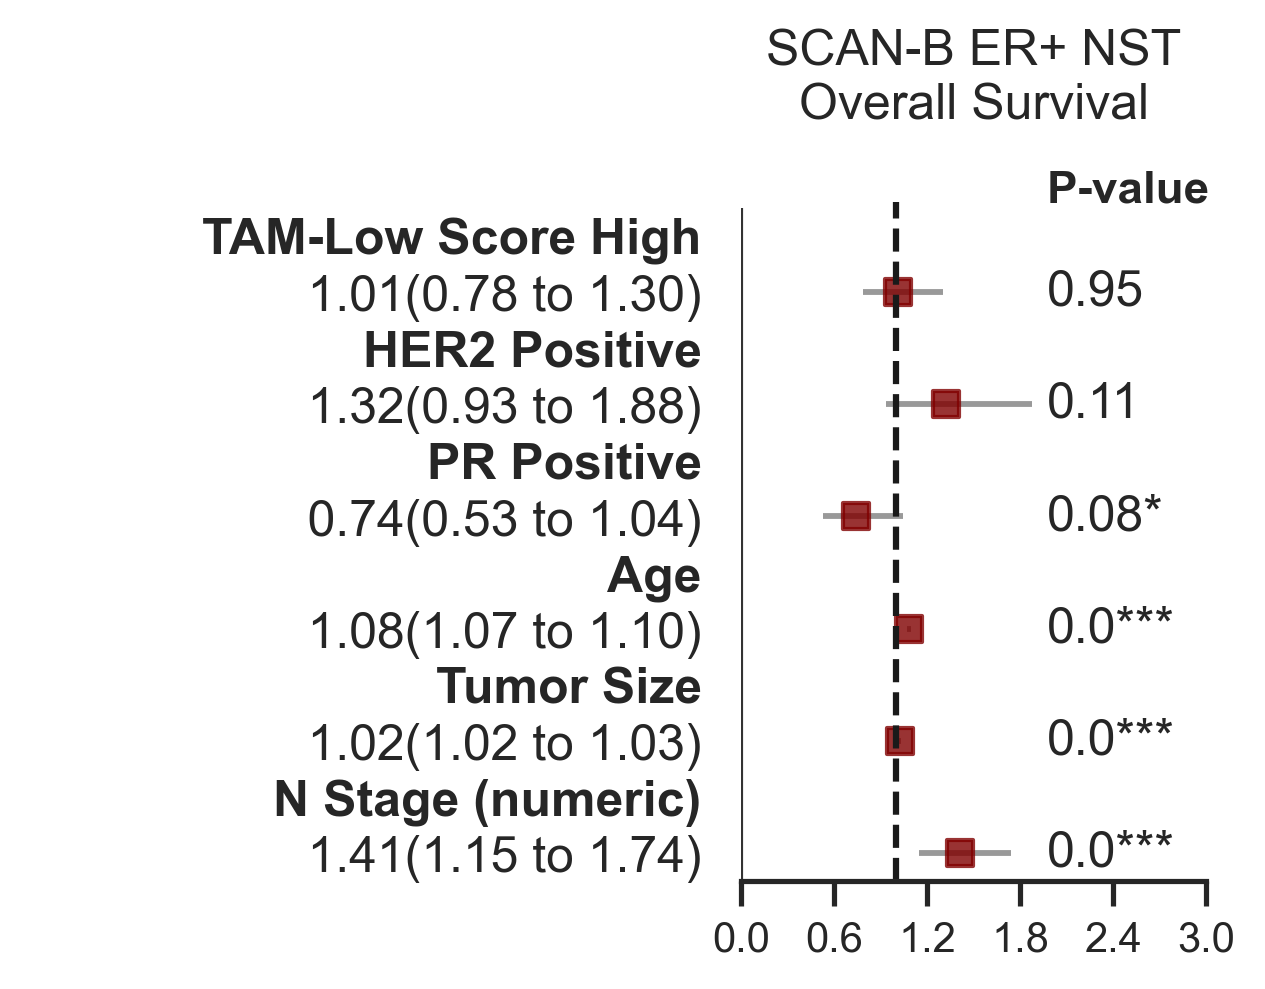

In [26]:
dfp = df[df['outcome']=='OS']
color='maroon'; title='SCAN-B ER+ NST\nOverall Survival'

ax = fp.forestplot(dfp,  figsize=(2,3),# the dataframe with results data
              estimate="exp(coef)",  # col containing estimated effect size 
              ll="lower .95", hl="upper .95",  # columns containing conf. int. lower and higher limits
              groupvar="label",  # column containing variable label
              varlabel='placeholder',
              pval = 'pval',
              sort=False,  # sort in ascending order (sorts within group if group is specified)               
              color_alt_rows=False,  # Gray alternate rows
              **{"ylabel1_size": 11}, # control size of printed ylabel
              flush=False, 
              fontfamily='Sans Serif', markercolor=color,
                   decimal_precision= 2
              )

ax.axvline(x=1, linestyle='--',color='k')
ax.set_xlim([0,3])
ax.set_title(title, pad=20)

### ILC

In [274]:
df = pd.read_csv('../data/survival/SCANB_OS_ILC.csv', index_col=0)
df['outcome'] = ['OS']*df.shape[0]
df

exp(coef)  exp(-coef)  lower .95  upper .95          pval  \
Sighigh          0.506948    1.972588   0.293186   0.876566  1.503659e-02   
Age              1.084138    0.922391   1.053249   1.115933  4.308736e-08   
HER2_statuspos   1.739697    0.574813   0.418532   7.231336  4.462185e-01   
PR_statuspos     0.840376    1.189944   0.440486   1.603302  5.977392e-01   
TumorSize        1.007476    0.992579   0.993881   1.021258  2.825918e-01   
NStage_numeric   1.437305    0.695746   0.869258   2.376563  1.573991e-01   

               outcome  
Sighigh             OS  
Age                 OS  
HER2_statuspos      OS  
PR_statuspos        OS  
TumorSize           OS  
NStage_numeric      OS

In [275]:
var_test_keys = {'Sighigh':'TAM-Low Score High',
#                  'HistologyILC':'ILC vs Other Histology',
                 'HER2_statuspos':'HER2 Positive',
                 'PR_statuspos':'PR Positive',
                 'Age':'Age',
                 'TumorSize':'Tumor Size',
                 'NStage_numeric':'N Stage (numeric)'
                }

outcome_keys = {'OS':'Overall Survival'}

In [276]:
df['group'] = df.index; df = df.loc[var_test_keys.keys(),:]
df['label'] = [var_test_keys[k] for k in df.index]
df['placeholder'] = ['']*df.shape[0]
df

exp(coef)  exp(-coef)  lower .95  upper .95          pval  \
Sighigh          0.506948    1.972588   0.293186   0.876566  1.503659e-02   
HER2_statuspos   1.739697    0.574813   0.418532   7.231336  4.462185e-01   
PR_statuspos     0.840376    1.189944   0.440486   1.603302  5.977392e-01   
Age              1.084138    0.922391   1.053249   1.115933  4.308736e-08   
TumorSize        1.007476    0.992579   0.993881   1.021258  2.825918e-01   
NStage_numeric   1.437305    0.695746   0.869258   2.376563  1.573991e-01   

               outcome           group               label placeholder  
Sighigh             OS         Sighigh  TAM-Low Score High              
HER2_statuspos      OS  HER2_statuspos       HER2 Positive              
PR_statuspos        OS    PR_statuspos         PR Positive              
Age                 OS             Age                 Age              
TumorSize           OS       TumorSize          Tumor Size              
NStage_numeric      OS  NStage_numeric   N Stage (numeric)

Text(0.5, 1.0, 'SCAN-B ER+ ILC\nOverall Survival')

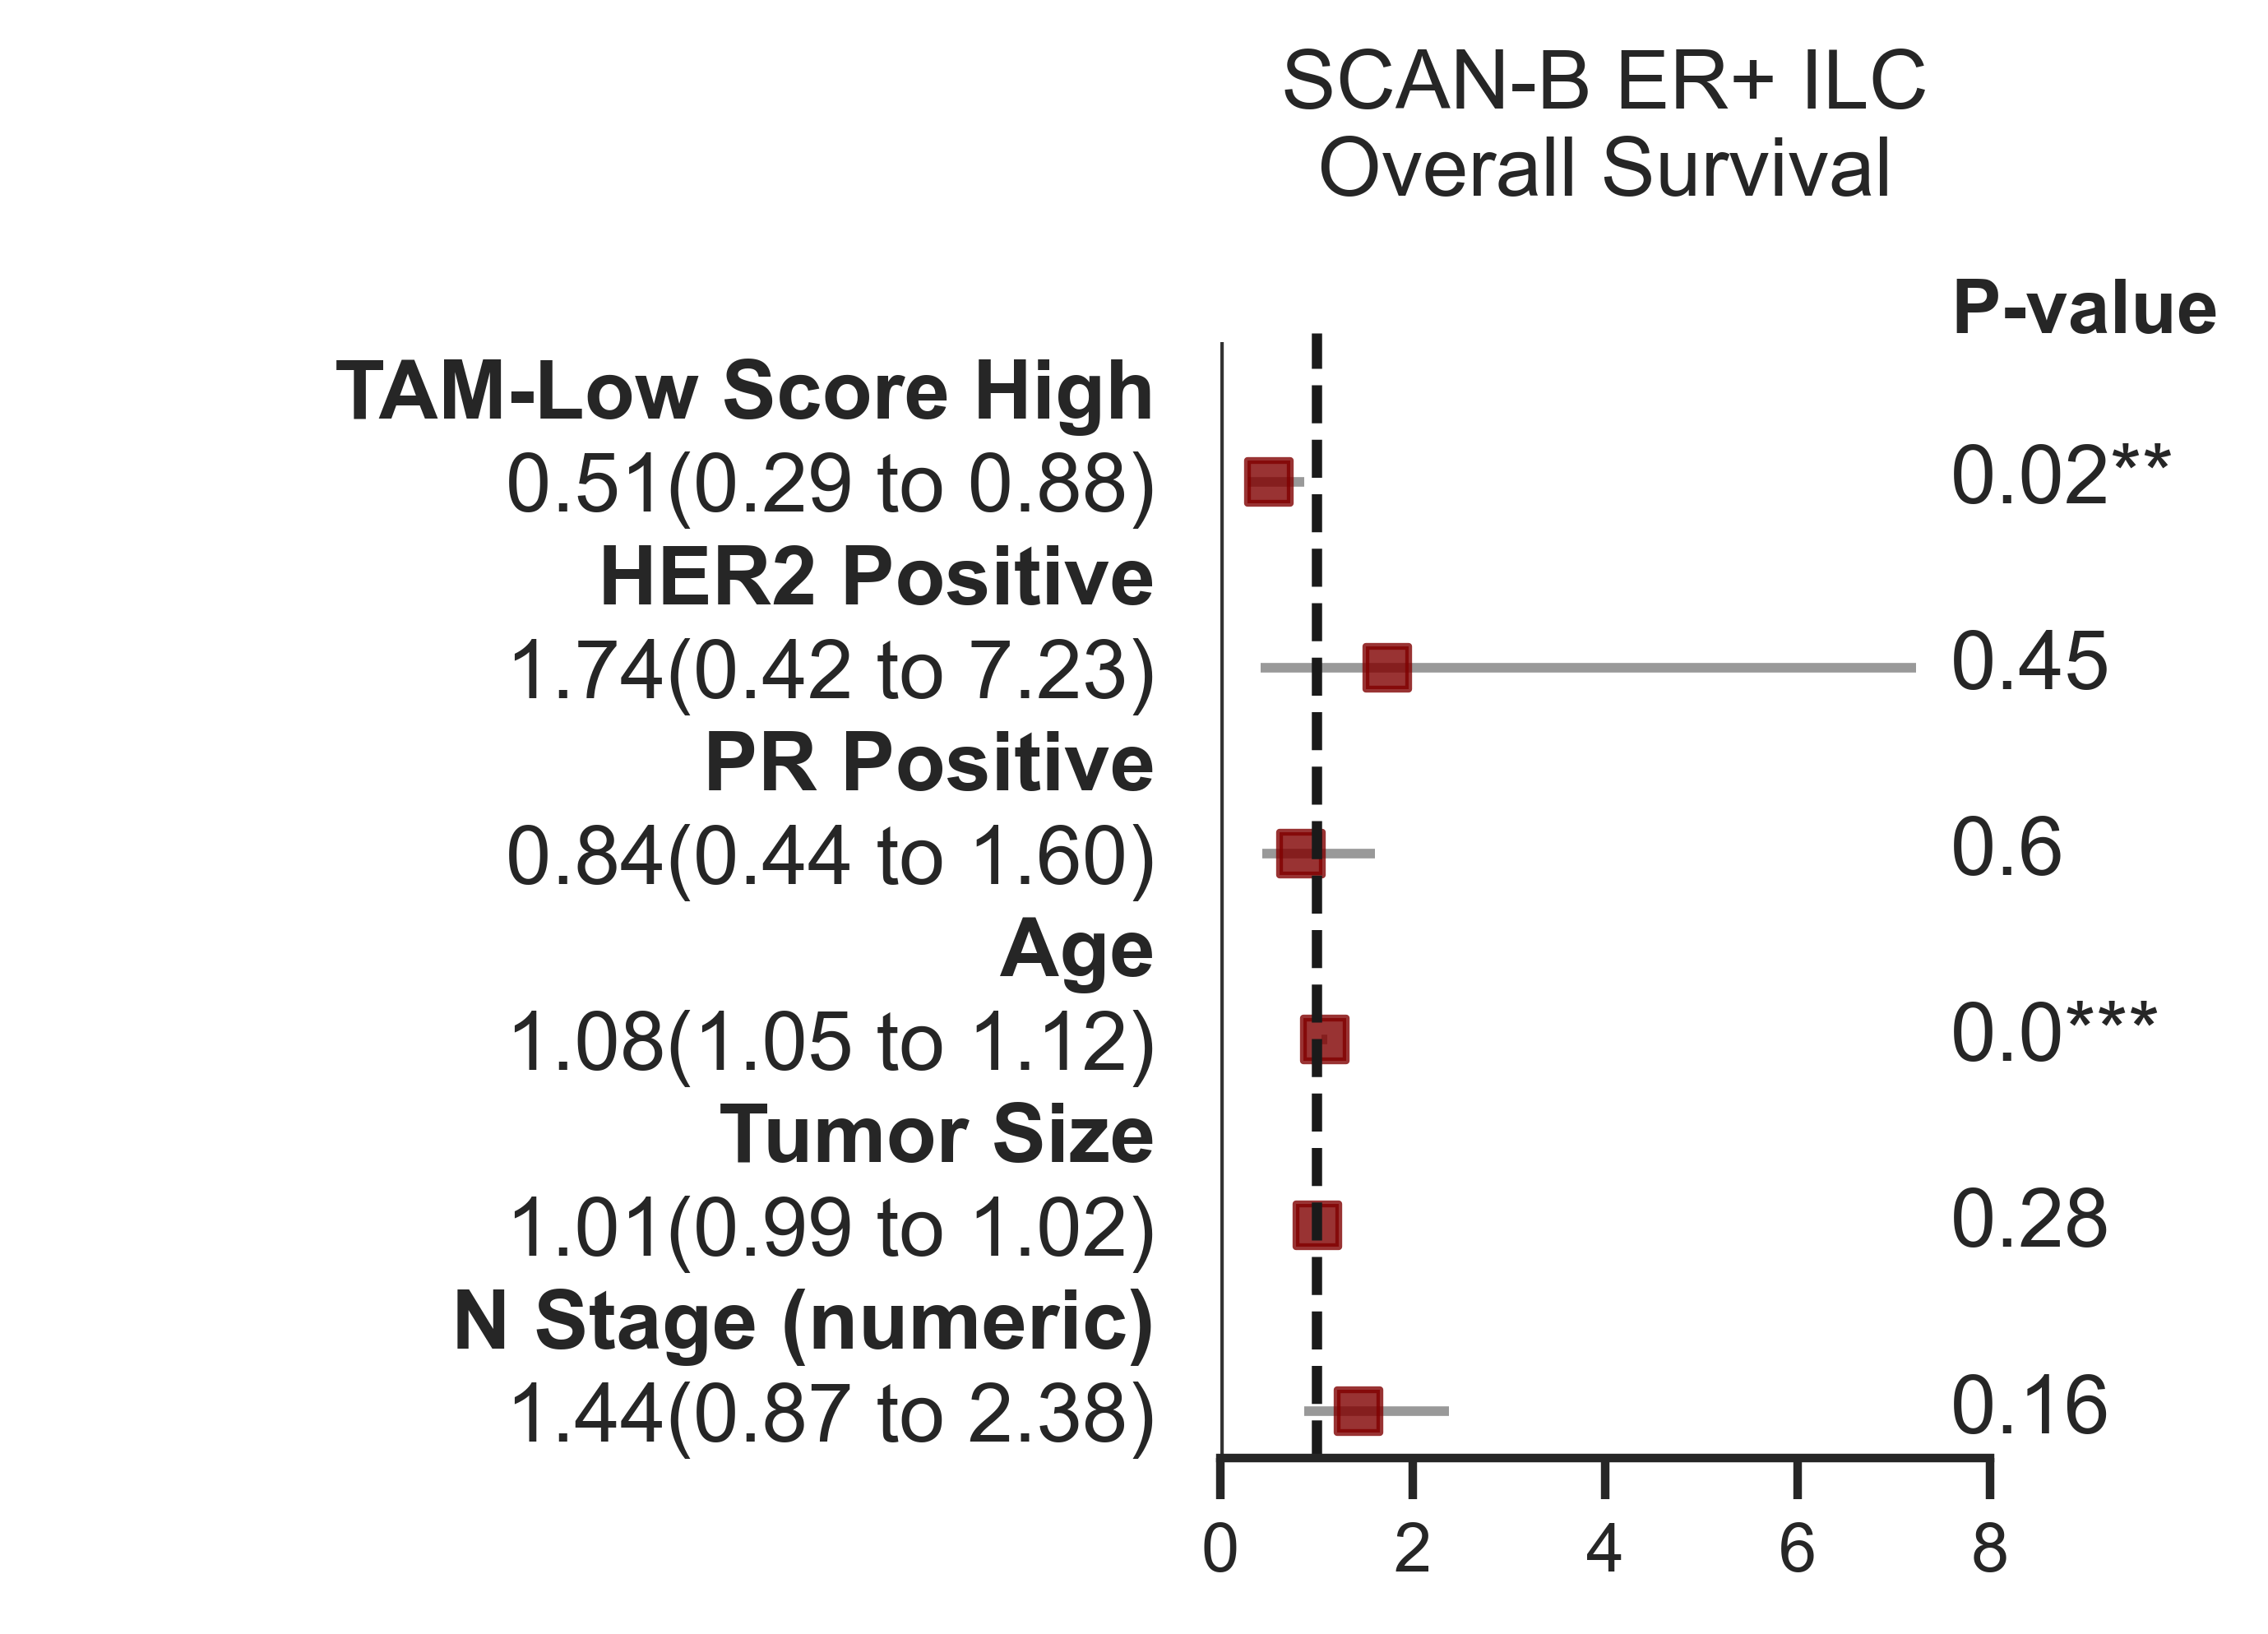

In [278]:
dfp = df[df['outcome']=='OS']
color='maroon'; title='SCAN-B ER+ ILC\nOverall Survival'

ax = fp.forestplot(dfp,  figsize=(2,3),# the dataframe with results data
              estimate="exp(coef)",  # col containing estimated effect size 
              ll="lower .95", hl="upper .95",  # columns containing conf. int. lower and higher limits
              groupvar="label",  # column containing variable label
              varlabel='placeholder',
              pval = 'pval',
              sort=False,  # sort in ascending order (sorts within group if group is specified)               
              color_alt_rows=False,  # Gray alternate rows
              **{"ylabel1_size": 11}, # control size of printed ylabel
              flush=False, 
              fontfamily='Sans Serif', markercolor=color,
                   decimal_precision= 2
              )

ax.axvline(x=1, linestyle='--',color='k')
ax.set_xlim([0,8])
ax.set_title(title, pad=20)

## POETIC trial

In [225]:
import pyreadr

fpath = '/Users/chelseachen/Library/CloudStorage/OneDrive-UniversityofPittsburgh/01_projects/publicds/database/poetic_zoujian/pairedAI.RData'
result = pyreadr.read_r(fpath) # also works for Rds

result.keys()

odict_keys(['info', 'expr_phen', 'expr_gene'])

In [226]:
meta0 = result['info']
meta1 = result['expr_phen']
gex = result['expr_gene']

In [228]:
meta = pd.merge(meta0, meta1, left_on='# 254 tumours: Control=56, AI-treated=198)', right_on='patient_ID').set_index('sample_ID',drop=True)

meta['response'] = meta['R or noR (Change.Ki67 < -60 AND Baseline.Ki67 >= 5%)']
meta['histology'] = meta['Histo Type']

meta = meta[['patient_ID','histology',
             'treatment',
             'ER status','HER2 status',
             'Baseline.Ki67','Surgery.Ki67','Change.Ki67',
             'response']]

print(Counter(meta['ER status']), Counter(meta['HER2 status']), Counter(meta['histology']))

meta

Counter({'Positive': 262}) Counter({'Negative': 262}) Counter({'Ductal': 210, 'Lobular': 52})


patient_ID histology treatment ER status HER2 status  \
sample_ID                                                           
GSM2827814   Treated.27    Ductal  Baseline  Positive    Negative   
GSM2827971   Treated.27    Ductal   Surgery  Positive    Negative   
GSM2827815   Treated.28   Lobular  Baseline  Positive    Negative   
GSM2827972   Treated.28   Lobular   Surgery  Positive    Negative   
GSM2827816   Treated.30    Ductal  Baseline  Positive    Negative   
...                 ...       ...       ...       ...         ...   
GSM2828103  Treated.196    Ductal   Surgery  Positive    Negative   
GSM2827947  Treated.197    Ductal  Baseline  Positive    Negative   
GSM2828104  Treated.197    Ductal   Surgery  Positive    Negative   
GSM2827948  Treated.198    Ductal  Baseline  Positive    Negative   
GSM2828105  Treated.198    Ductal   Surgery  Positive    Negative   

            Baseline.Ki67  Surgery.Ki67  Change.Ki67   response  
sample_ID                                                        
GSM2827814       8.117249      0.000000  -100.000000  responder  
GSM2827971       8.117249      0.000000  -100.000000  responder  
GSM2827815      14.459556      0.118483   -99.180587  responder  
GSM2827972      14.459556      0.118483   -99.180587  responder  
GSM2827816      47.796474      1.282051   -97.317687  responder  
...                   ...           ...          ...        ...  
GSM2828103            NaN           NaN          NaN        NaN  
GSM2827947            NaN           NaN          NaN        NaN  
GSM2828104            NaN           NaN          NaN        NaN  
GSM2827948            NaN           NaN          NaN        NaN  
GSM2828105            NaN           NaN          NaN        NaN  

[262 rows x 9 columns]

# cluster constitution

In [73]:
df = pd.read_csv('../data_rebuttal/supp/cell_density_roi.csv', index_col=0)
df

Patient ID    ILC Subtype PAM50  \
PBC-PR-758_[10280,25237].im3  TP17_M510  Proliferative  LumB   
PBC-PR-758_[12450,22666].im3  TP17_M510  Proliferative  LumB   
PBC-PR-758_[10454,26237].im3  TP17_M510  Proliferative  LumB   
PBC-PR-758_[13908,24863].im3  TP17_M510  Proliferative  LumB   
PBC-PR-758_[7895,29938].im3   TP17_M510  Proliferative  LumB   
...                                 ...            ...   ...   
PBC-PR-771_[12637,21217].im3   TP18_M95  Proliferative  LumB   
PBC-PR-771_[12828,19968].im3   TP18_M95  Proliferative  LumB   
PBC-PR-771_[13975,20968].im3   TP18_M95  Proliferative  LumB   
PBC-PR-771_[13062,22217].im3   TP18_M95  Proliferative  LumB   
PBC-PR-771_[8991,22235].im3    TP18_M95  Proliferative  LumB   

                              Age at diagnosis   Race  Postmenopausal  \
PBC-PR-758_[10280,25237].im3                44  White               0   
PBC-PR-758_[12450,22666].im3                44  White               0   
PBC-PR-758_[10454,26237].im3                44  White               0   
PBC-PR-758_[13908,24863].im3                44  White               0   
PBC-PR-758_[7895,29938].im3                 44  White               0   
...                                        ...    ...             ...   
PBC-PR-771_[12637,21217].im3                68  White               1   
PBC-PR-771_[12828,19968].im3                68  White               1   
PBC-PR-771_[13975,20968].im3                68  White               1   
PBC-PR-771_[13062,22217].im3                68  White               1   
PBC-PR-771_[8991,22235].im3                 68  White               1   

                              Pathological grade Pathological stage  Ki67  ER  \
PBC-PR-758_[10280,25237].im3                   2                 1A    15   1   
PBC-PR-758_[12450,22666].im3                   2                 1A    15   1   
PBC-PR-758_[10454,26237].im3                   2                 1A    15   1   
PBC-PR-758_[13908,24863].im3                   2                 1A    15   1   
PBC-PR-758_[7895,29938].im3                    2                 1A    15   1   
...                                          ...                ...   ...  ..   
PBC-PR-771_[12637,21217].im3                   2                 1A    15   1   
PBC-PR-771_[12828,19968].im3                   2                 1A    15   1   
PBC-PR-771_[13975,20968].im3                   2                 1A    15   1   
PBC-PR-771_[13062,22217].im3                   2                 1A    15   1   
PBC-PR-771_[8991,22235].im3                    2                 1A    15   1   

                              ...  Stromal CD4 T cells Stromal CD8 T cells  \
PBC-PR-758_[10280,25237].im3  ...          1445.530589          127.946168   
PBC-PR-758_[12450,22666].im3  ...          1454.560435          387.288711   
PBC-PR-758_[10454,26237].im3  ...           561.699570          234.587357   
PBC-PR-758_[13908,24863].im3  ...          1034.642032          307.693544   
PBC-PR-758_[7895,29938].im3   ...           644.698879          140.963099   
...                           ...                  ...                 ...   
PBC-PR-771_[12637,21217].im3  ...          1513.488907         1606.604871   
PBC-PR-771_[12828,19968].im3  ...           296.088415          625.615974   
PBC-PR-771_[13975,20968].im3  ...          1263.241173         1732.243026   
PBC-PR-771_[13062,22217].im3  ...           173.931845          297.547691   
PBC-PR-771_[8991,22235].im3   ...          1127.528270         1075.627016   

                              Stromal Treg cells  Stromal Macrophages  \
PBC-PR-758_[10280,25237].im3            7.311210           428.227992   
PBC-PR-758_[12450,22666].im3           10.282001          1104.286928   
PBC-PR-758_[10454,26237].im3            0.000000           725.050975   
PBC-PR-758_[13908,24863].im3           12.595642           714.352847   
PBC-PR-758_[7895,29938].im3            18.656881           842.669113   
...                                

In [72]:
df = pd.read_csv('../rebuttal/archive/supp_rebuttal/Supplementary Table 4_mIHC ROI counting.csv', index_col=0)
df

Patient ID  Stromal B cells  Stromal CD4 T cells  Stromal CD8 T cells  \
ROI ID                                                                         
1       TP17_M510      2986.629132          1445.530589           127.946168   
2       TP17_M510      1152.269600          1454.560435           387.288711   
3       TP17_M510       447.067004           561.699570           234.587357   
4       TP17_M510       346.380159          1034.642032           307.693543   
5       TP17_M510       136.298879           644.698879           140.963099   
...           ...              ...                  ...                  ...   
93       TP18_M95         2.836019          1513.488907          1606.604871   
94       TP18_M95         0.000000           296.088415           625.615974   
95       TP18_M95         0.000000          1263.241173          1732.243026   
96       TP18_M95         0.000000           173.931845           297.547691   
97       TP18_M95        10.592093          1127.528270          1075.627016   

        Stromal Treg cells  Stromal Macrophages  Tumor B cells  \
ROI ID                                                           
1                 7.311210           428.227992      44.145958   
2                10.282001          1104.286928       2.099531   
3                 0.000000           725.050975       6.438246   
4                12.595642           714.352847       0.000000   
5                18.656881           842.669113       4.273107   
...                    ...                  ...            ...   
93                5.672038          1227.523639       0.000000   
94                0.000000          1944.942177       1.569522   
95               22.978734          1610.868175       0.000000   
96                0.000000          1993.383177       0.000000   
97                6.355256          1092.044759       0.000000   

        Tumor CD4 T cells  Tumor CD8 T cells  Tumor Treg cells  \
ROI ID                                                           
1               30.902171           3.433575          0.000000   
2                9.237934           2.099531          0.839812   
3               17.475240           4.138873          0.000000   
4               50.910054          10.717906          2.679477   
5               76.559841          12.819322          0.000000   
...                   ...                ...               ...   
93              28.190133          30.662952          0.000000   
94              60.688200         103.065304          1.569522   
95             145.975154         186.244162          2.237167   
96              38.695597          38.695597          2.814225   
97              58.102074          38.279014          0.000000   

        Tumor Macrophages  Tumor PanCK cells  
ROI ID                                        
1               98.592640        4514.169488  
2              122.192678        3987.008507  
3               58.404092        4351.334822  
4              219.717073        5133.341081  
5              399.535542        3477.241151  
...                   ...                ...  
93             116.717044        4666.703490  
94             461.962761        5154.311571  
95             281.883056        5121.434812  
96             517.817442        6890.630467  
97             384.840798        6542.293572  

[97 rows x 12 columns]

In [69]:
df.columns

Index(['Patient ID', 'Stromal B cells', 'Stromal CD4 T cells',
       'Stromal CD8 T cells', 'Stromal Treg cells', 'Stromal Macrophages',
       'Tumor B cells', 'Tumor CD4 T cells', 'Tumor CD8 T cells',
       'Tumor Treg cells', 'Tumor Macrophages', 'Tumor PanCK cells'],
      dtype='object')

In [74]:
df_p = pd.DataFrame()
df_p['Sample Name'] = df['Patient ID']
df_p['NMF Cluster'] = df['Immune Infiltration Pattern'].astype('str')
df_p = df_p.reset_index(drop=True)

df_p

Sample Name NMF Cluster
0    TP17_M510           1
1    TP17_M510           1
2    TP17_M510           1
3    TP17_M510           1
4    TP17_M510           1
..         ...         ...
92    TP18_M95           4
93    TP18_M95           4
94    TP18_M95           4
95    TP18_M95           3
96    TP18_M95           4

[97 rows x 2 columns]

Text(0.5, 0, '')

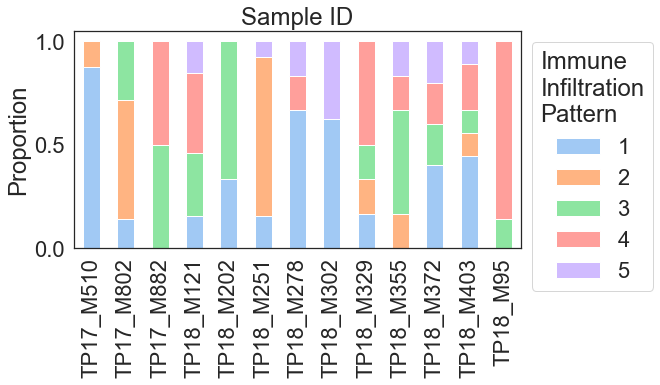

In [76]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.color_palette('pastel',5).as_hex())
sns.set(style='white', font_scale=2)

mat = df_p.groupby(['Sample Name','NMF Cluster']).size().unstack().fillna(0)

# fig,ax = plt.subplots(figsize=(10,3))
# mat.plot(kind='bar', stacked=True, cmap=my_cmap, ax=ax)

# ax.legend(bbox_to_anchor=(.8, 0.5, 0.5, 0.5)) 
# ax.set_title('Number of ROIs for each NMF cluster')
# ax.set_xlabel('')

matpct = mat.div(mat.sum(axis=1), axis=0)

fig,ax = plt.subplots(figsize=(8,4))
matpct.plot(kind='bar', stacked=True, cmap=my_cmap, ax=ax)

# ax.get_legend().remove()
ax.legend(bbox_to_anchor=(1, 0.5, 0.5, 0.5),loc='upper left',title='Immune\nInfiltration\nPattern') 
ax.set_ylabel('Proportion')
ax.set_title('Sample ID')
ax.set_xlabel('')

# TCGA xcell score

In [4]:
# meta
fpath = '/Users/chelseachen/Library/CloudStorage/OneDrive-UniversityofPittsburgh/01_projects/yap/data/tcga/data_clinical_sample.txt'

meta = pd.read_csv(fpath, sep='\t')
meta

PATIENT_ID        SAMPLE_ID                       OTHER_SAMPLE_ID  \
0    TCGA-LQ-A4E4  TCGA-LQ-A4E4-01  8C8D4BD4-3AA9-4AD1-9715-2376EE540A0C   
1    TCGA-A2-A3KC  TCGA-A2-A3KC-01  8318A9A4-E78E-4DB8-97C7-2CC733D0C512   
2    TCGA-A2-A3KD  TCGA-A2-A3KD-01  401D075C-D443-4592-8C03-E675CAAD2B50   
3    TCGA-A7-A0D9  TCGA-A7-A0D9-01  c144ae50-ed29-4e27-bbee-fa81e79ac7db   
4    TCGA-A7-A0DA  TCGA-A7-A0DA-01  4f441e61-6bea-4a12-841d-def270804bbe   
..            ...              ...                                   ...   
813  TCGA-BH-A0BF  TCGA-BH-A0BF-01  4dc7d403-3ea7-4d02-94a7-fb33511bab09   
814  TCGA-BH-A209  TCGA-BH-A209-01  fbf64fdd-6787-4647-b0cd-860acc8abce6   
815  TCGA-BH-A208  TCGA-BH-A208-01  723e0934-327e-46f2-94f0-20a65da1ea0e   
816  TCGA-BH-A0BD  TCGA-BH-A0BD-01  832b8766-0e59-4ad4-b4c9-1e39b2ce4fb1   
817  TCGA-BH-A1ES  TCGA-BH-A1ES-06                       [Not Available]   

    DAYS_TO_COLLECTION          IS_FFPE     OCT_EMBEDDED  \
0                  414               NO             TRUE   
1                  299               NO             TRUE   
2                  700               NO             TRUE   
3                  173               NO            FALSE   
4                  177               NO            FALSE   
..                 ...              ...              ...   
813                413               NO             TRUE   
814               5392               NO             TRUE   
815               5893               NO             TRUE   
816                364               NO             TRUE   
817    [Not Available]  [Not Available]  [Not Available]   

                            PATHOLOGY_REPORT_FILE_NAME  \
0    TCGA-LQ-A4E4.C13D16C9-BAC7-4CA4-B062-D925466F9...   
1    TCGA-A2-A3KC.593AF241-8F84-4BA0-8878-7C1CE72A4...   
2    TCGA-A2-A3KD.3E4717BA-E9AE-45F9-9696-F8928D9FC...   
3    TCGA-A7-A0D9.7D5763F7-7284-4AF5-BBFC-5D8B5CB7F...   
4    TCGA-A7-A0DA.69AC5937-3FFD-40FB-9922-79DB3CED7...   
..                                                 ...   
813  TCGA-BH-A0BF.0D76394C-40B4-4E74-8A80-FAE00E21F...   
814  TCGA-BH-A209.E28150CE-E9B6-4C3F-B867-F9A75E264...   
815  TCGA-BH-A208.4F943D12-E769-45F3-86BE-75193786D...   
816  TCGA-BH-A0BD.CE70DD1E-BCA4-4F89-AA5B-D90FE18A3...   
817                                    [Not Available]   

        SURGICAL_PROCEDURE_FIRST  \
0    Modified Radical Mastectomy   
1              Simple Mastectomy   
2                     Lumpectomy   
3              Simple Mastectomy   
4                     Lumpectomy   
..                           ...   
813                        Other   
814                   Lumpectomy   
815                   Lumpectomy   
816                        Other   
817              [Not Available]   

                       FIRST_SURGICAL_PROCEDURE_OTHER  \
0                                     [Not Available]   
1                                     [Not Available]   
2                                     [Not Available]   
3                                     [Not Available]   
4                                     [Not Available]   
..                                                ...   
813  Total mastectomy with sentinel lymph node biopsy   
814                                   [Not Available]   
815                                   [Not Available]   
816                              segmental mastectomy   
817                                   [Not Available]   

    SURGERY_FOR_POSITIVE_MARGINS  ... METASTATIC_TUMOR_INDICATOR  \
0                [Not Available]  ...            [Not Available]   
1                [Not Available]  ...                         NO   
2                 Mastectomy NOS  ...                         NO   
3                [Not Available]  ...            [Not Available]   
4                [Not Available]  ...            [Not Available]   
..                           ...  ...                        ...   
813              [Not Available]  ...                         NO   
814           

In [52]:
Counter(mg['SAMPLE_TYPE'])

Counter({'Primary': 109})

In [19]:
for x in meta.columns:
    print(x)

PATIENT_ID
SAMPLE_ID
OTHER_SAMPLE_ID
DAYS_TO_COLLECTION
IS_FFPE
OCT_EMBEDDED
PATHOLOGY_REPORT_FILE_NAME
SURGICAL_PROCEDURE_FIRST
FIRST_SURGICAL_PROCEDURE_OTHER
SURGERY_FOR_POSITIVE_MARGINS
SURGERY_FOR_POSITIVE_MARGINS_OTHER
MARGIN_STATUS_REEXCISION
STAGING_SYSTEM_OTHER
MICROMET_DETECTION_BY_IHC
METASTATIC_SITE
METASTATIC_SITE_OTHER
ER_STATUS_BY_IHC
ER_STATUS_IHC_PERCENT_POSITIVE
ER_POSITIVITY_SCALE_USED
IHC_SCORE
ER_POSITIVITY_SCALE_OTHER
PR_STATUS_BY_IHC
PR_STATUS_IHC_PERCENT_POSITIVE
PR_POSITIVITY_SCALE_USED
PR_POSITIVITY_IHC_INTENSITY_SCORE
PR_POSITIVITY_SCALE_OTHER
PR_POSITIVITY_DEFINE_METHOD
IHC_HER2
HER2_IHC_PERCENT_POSITIVE
HER2_IHC_SCORE
HER2_POSITIVITY_SCALE_OTHER
HER2_POSITIVITY_METHOD_TEXT
HER2_FISH_STATUS
HER2_COPY_NUMBER
CENT17_COPY_NUMBER
HER2_AND_CENT17_CELLS_COUNT
HER2_CENT17_RATIO
HER2_AND_CENT17_SCALE_OTHER
HER2_FISH_METHOD
NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT
NTE_ER_STATUS
NTE_ER_STATUS_IHC__POSITIVE
NTE_ER_IHC_INTENSITY_SCORE
NTE_PR_STATUS_BY_IHC
NTE_PR_STATUS_IH

In [20]:
Counter(meta['ONCOTREE_CODE'])

Counter({'ILC': 127, 'BRCA': 113, 'IDC': 490, 'MDLC': 88})

In [21]:
Counter(meta['ER_STATUS_BY_IHC'])

Counter({'Positive': 601,
         'Negative': 175,
         '[Not Available]': 40,
         'Indeterminate': 2})

In [22]:
Counter(meta['IHC_HER2'])

Counter({'[Not Available]': 135,
         'Equivocal': 136,
         'Negative': 417,
         'Positive': 121,
         'Indeterminate': 9})

In [25]:
meta.groupby(['ONCOTREE_CODE','ER_STATUS_BY_IHC','IHC_HER2']).size().unstack()

IHC_HER2                        Equivocal  Indeterminate  Negative  Positive  \
ONCOTREE_CODE ER_STATUS_BY_IHC                                                 
BRCA          Negative                4.0            NaN      13.0       5.0   
              Positive               12.0            1.0      47.0       6.0   
              [Not Available]         NaN            NaN       NaN       NaN   
IDC           Indeterminate           NaN            NaN       NaN       1.0   
              Negative               23.0            1.0      70.0      24.0   
              Positive               60.0            4.0     172.0      58.0   
              [Not Available]         NaN            NaN       NaN       NaN   
ILC           Negative                2.0            NaN       4.0       1.0   
              Positive               22.0            1.0      67.0       8.0   
              [Not Available]         NaN            NaN       NaN       NaN   
MDLC          Negative                1.0            NaN       3.0       1.0   
              Positive               12.0            2.0      41.0      17.0   
              [Not Available]         NaN            NaN       NaN       NaN   

IHC_HER2                        [Not Available]  
ONCOTREE_CODE ER_STATUS_BY_IHC                   
BRCA          Negative                      5.0  
              Positive                     14.0  
              [Not Available]               6.0  
IDC           Indeterminate                 1.0  
              Negative                     15.0  
              Positive                     34.0  
              [Not Available]              27.0  
ILC           Negative                      1.0  
              Positive                     19.0  
              [Not Available]               2.0  
MDLC          Negative                      2.0  
              Positive                      4.0  
              [Not Available]               5.0

In [10]:
xcell = pd.read_csv('../data/geneset/xcell_signatures/13059_2017_1349_MOESM6_ESM.tsv', 
                    sep='\t', index_col=0)
xcell

TCGA.V4.A9EE.01  TCGA.VD.AA8N.01  TCGA.V4.A9EI.01  \
aDC               5.877000e-02     1.138000e-01     4.302000e-02   
Adipocytes        1.375000e-19     3.926000e-03     3.663000e-21   
Astrocytes       -1.621000e-17    -2.176000e-17    -1.587000e-17   
B-cells           4.805000e-02     3.549000e-02     2.253000e-02   
Basophils         6.992000e-02     2.074000e-01     1.173000e-01   
...                        ...              ...              ...   
Smooth muscle     5.515000e-01     4.014000e-01     5.680000e-01   
Tgd cells         7.517000e-18     4.544000e-17     3.933000e-18   
Th1 cells         1.634000e-01     2.978000e-01     2.219000e-01   
Th2 cells         1.106000e-17    -7.519000e-18     3.786000e-02   
Tregs             2.936000e-02    -1.181000e-17     1.495000e-02   

               TCGA.VD.AA8O.01  TCGA.WC.A888.01  TCGA.WC.A881.01  \
aDC               8.711000e-02     2.079000e-01     3.754000e-02   
Adipocytes       -2.367000e-21    -5.244000e-20    -3.711000e-19   
Astrocytes       -2.469000e-17    -2.434000e-17    -1.716000e-17   
B-cells           3.487000e-02     2.304000e-01     4.584000e-02   
Basophils         1.978000e-01     1.843000e-01     1.881000e-01   
...                        ...              ...              ...   
Smooth muscle     4.486000e-01     4.463000e-01     4.699000e-01   
Tgd cells         3.373000e-17    -3.368000e-17    -2.310000e-17   
Th1 cells         2.559000e-01     2.167000e-01     2.064000e-01   
Th2 cells         2.440000e-17     1.328000e-17     1.174000e-17   
Tregs            -3.357000e-18     2.122000e-18     3.896000e-18   

               TCGA.WC.A88A.01  TCGA.YZ.A980.01  TCGA.V4.A9EO.01  \
aDC               4.793000e-02     4.031000e-02     9.455000e-03   
Adipocytes       -3.813000e-19     2.841000e-02    -7.923000e-20   
Astrocytes       -1.515000e-17    -3.341000e-18    -1.432000e-17   
B-cells           2.445000e-02    -1.367000e-18     2.883000e-02   
Basophils         1.598000e-01     2.855000e-01     1.450000e-01   
...                        ...              ...              ...   
Smooth muscle     4.808000e-01     4.426000e-01     4.832000e-01   
Tgd cells         1.018000e-17    -8.273000e-18     4.828000e-18   
Th1 cells         2.492000e-01     1.113000e-01     1.821000e-01   
Th2 cells         2.108000e-17     4.432000e-18     1.275000e-17   
Tregs             6.742000e-19     3.744000e-02     1.399000e-03   

               TCGA.WC.A87U.01  ...  TARGET.20.PAPWHS.09  TARGET.20.PARUTH.09  \
aDC               2.303000e-02  ...         5.653000e-17        -3.987000e-17   
Adipocytes        5.818000e-19  ...        -2.622000e-19        -1.028000e-19   
Astrocytes       -2.206000e-17  ...         1.750000e-17        -5.676000e-17   
B-cells           1.637000e-02  ...         4.185000e-01         2.263000e-01   
Basophils         1.325000e-01  ...         8.037000e-01         6.693000e-01   
...                        ...  ...                  ...                  ...   
Smooth muscle     5.111000e-01  ...         2.960000e-01         1.912000e-01   
Tgd cells         1.819000e-17  ...         1.296000e-17         2.799000e-18   
Th1 cells         1.683000e-01  ...         2.244000e-01         1.955000e-01   
Th2 cells         1.067000e-17  ...        -4.273000e-18         2.489000e-17   
Tregs            -2.970000e-18  ...         1.426000e-02         8.674000e-19   

               TARGET.20.PARDDY.09  TARGET.20.PANLLX.09  TARGET.20.PANTNA.09  \
aDC                   1.384000e-17         7.176000e-18        -2.523000e-17   
Adipocytes            8.195000e-03         1.425000e-19         2.614000e-21   
Astrocytes           -8.058000e-18         1.489000e-17         1.585000e-18   
B-cells               2.715000e-01         5.918000e-01         2.207000e-01   
Basophils             4.155000e-01         3.994000e-01         4.689000e-01   
...                            ...                  ...                  ...   
Smooth muscle         4.015000e

In [14]:
names = meta['SAMPLE_ID'].unique(); print(len(names))
meta['spid'] = [x.replace('-','.') for x in meta['SAMPLE_ID']]

818


In [16]:
pt_sel = [x for x in meta['spid'] if x in xcell.columns]
len(pt_sel)

814

In [26]:
meta_sel = meta[(meta['spid'].isin(pt_sel)) 
              & (meta['ONCOTREE_CODE'] == 'ILC')
              & (meta['ER_STATUS_BY_IHC'] == 'Positive')
              & (meta['IHC_HER2'] != 'Positive')]

meta_sel

PATIENT_ID        SAMPLE_ID                       OTHER_SAMPLE_ID  \
0    TCGA-LQ-A4E4  TCGA-LQ-A4E4-01  8C8D4BD4-3AA9-4AD1-9715-2376EE540A0C   
1    TCGA-A2-A3KC  TCGA-A2-A3KC-01  8318A9A4-E78E-4DB8-97C7-2CC733D0C512   
11   TCGA-A7-A0CG  TCGA-A7-A0CG-01  f2deda2c-63c8-4b4f-a725-381f00298cd0   
27   TCGA-A2-A1FV  TCGA-A2-A1FV-01  1624f434-259b-4782-afe1-7ac3d13d7807   
28   TCGA-BH-A0HK  TCGA-BH-A0HK-01  8835b20e-9343-4266-a356-e0343c657130   
..            ...              ...                                   ...   
766  TCGA-AC-A2FG  TCGA-AC-A2FG-01  891365B0-3BB1-4F7C-B351-6191B18EE9D7   
767  TCGA-AC-A2FF  TCGA-AC-A2FF-01  62D4D442-98A0-4540-B22A-4ACF1FBFC40B   
776  TCGA-AC-A2FO  TCGA-AC-A2FO-01  6AB6C7D7-A0B5-4830-94A3-F16BC11EF953   
800  TCGA-BH-A0B5  TCGA-BH-A0B5-01  a0de3018-8916-4e06-8ba1-beb1d218e30e   
810  TCGA-BH-A0BA  TCGA-BH-A0BA-01  992d3519-cd51-4f48-880c-81fef52be1bf   

    DAYS_TO_COLLECTION IS_FFPE OCT_EMBEDDED  \
0                  414      NO         TRUE   
1                  299      NO         TRUE   
11                  93      NO        FALSE   
27                 372      NO         TRUE   
28                  35      NO         TRUE   
..                 ...     ...          ...   
766               1517      NO        FALSE   
767               1904      NO        FALSE   
776               2051      NO        FALSE   
800               1008      NO         TRUE   
810               1266      NO         TRUE   

                            PATHOLOGY_REPORT_FILE_NAME  \
0    TCGA-LQ-A4E4.C13D16C9-BAC7-4CA4-B062-D925466F9...   
1    TCGA-A2-A3KC.593AF241-8F84-4BA0-8878-7C1CE72A4...   
11   TCGA-A7-A0CG.2BE28F5D-2DBB-476F-9AFF-6B2103ECF...   
27   TCGA-A2-A1FV.074223E9-5E1C-47E8-BE40-1C4442CAE...   
28   TCGA-BH-A0HK.575F2EFD-2D8B-4140-9FCB-D8CB9EC14...   
..                                                 ...   
766  TCGA-AC-A2FG.C1ABCD83-40EA-4FF7-BEB6-69679589E...   
767  TCGA-AC-A2FF.E6897E14-465A-486A-A6AD-FCFED2162...   
776  TCGA-AC-A2FO.5A7EB73F-E681-46CC-B2D6-C87EEAB0A...   
800  TCGA-BH-A0B5.F44C515D-5A58-4382-A147-4429A78D4...   
810  TCGA-BH-A0BA.142F03FE-5B60-416D-8DCD-EC34DB549...   

        SURGICAL_PROCEDURE_FIRST FIRST_SURGICAL_PROCEDURE_OTHER  \
0    Modified Radical Mastectomy                [Not Available]   
1              Simple Mastectomy                [Not Available]   
11                    Lumpectomy                [Not Available]   
27             Simple Mastectomy                [Not Available]   
28   Modified Radical Mastectomy                [Not Available]   
..                           ...                            ...   
766  Modified Radical Mastectomy                [Not Available]   
767                   Lumpectomy                [Not Available]   
776            Simple Mastectomy                [Not Available]   
800  Modified Radical Mastectomy                [Not Available]   
810  Modified Radical Mastectomy                [Not Available]   

    SURGERY_FOR_POSITIVE_MARGINS  ...     PROJECT_CODE TISSUE_SOURCE_SITE  \
0                [Not Available]  ...  [Not Available]                 LQ   
1                [Not Available]  ...  [Not Available]                 A2   
11               [Not Available]  ...  [Not Available]                 A7   
27               [Not Available]  ...  [Not Available]                 A2   
28               [Not Available]  ...  [Not Available]                 BH   
..                           ...  ...              ...                ...   
766              [Not Available]  ...  [Not Available]                 AC   
767              [Not Available]  ...  [Not Available]                 AC   
776              [Not Available]  ...  [Not Available]                 AC   
800              [Not Available]  ...  [Not Available]                 BH   
810              [Not Available]  ...  [Not Available]                 BH   

    TUMOR_TISSUE_SITE                CANCER_TYPE  \
0              Breast  Invasive Breast Carcinoma  

In [27]:
xcell.T

aDC    Adipocytes    Astrocytes  B-cells  \
TCGA.V4.A9EE.01      5.877000e-02  1.375000e-19 -1.621000e-17  0.04805   
TCGA.VD.AA8N.01      1.138000e-01  3.926000e-03 -2.176000e-17  0.03549   
TCGA.V4.A9EI.01      4.302000e-02  3.663000e-21 -1.587000e-17  0.02253   
TCGA.VD.AA8O.01      8.711000e-02 -2.367000e-21 -2.469000e-17  0.03487   
TCGA.WC.A888.01      2.079000e-01 -5.244000e-20 -2.434000e-17  0.23040   
...                           ...           ...           ...      ...   
TARGET.20.PANPKN.09  4.701000e-17  2.113000e-18 -1.225000e-17  0.42810   
TARGET.20.PANLIR.09 -5.152000e-17 -7.161000e-20 -1.384000e-17  0.30760   
TARGET.20.PAPAWN.09 -1.647000e-17 -1.146000e-18  1.599000e-17  0.45300   
TARGET.20.PANPTM.09 -3.712000e-17  6.545000e-19  8.471000e-17  0.37580   
TARGET.20.PAKIWK.09  4.563000e-02  7.894000e-04  1.647000e-17  0.70640   

                     Basophils  CD4+ memory T-cells  CD4+ naive T-cells  \
TCGA.V4.A9EE.01        0.06992              0.09069             0.09754   
TCGA.VD.AA8N.01        0.20740              0.03349             0.05435   
TCGA.V4.A9EI.01        0.11730              0.07131             0.02526   
TCGA.VD.AA8O.01        0.19780              0.04375             0.08273   
TCGA.WC.A888.01        0.18430              0.11140             0.14950   
...                        ...                  ...                 ...   
TARGET.20.PANPKN.09    0.67880              0.47330             0.12370   
TARGET.20.PANLIR.09    0.49800              0.35880             0.10670   
TARGET.20.PAPAWN.09    0.53930              0.18450             0.11220   
TARGET.20.PANPTM.09    0.47890              0.29190             0.15740   
TARGET.20.PAKIWK.09    0.66060              0.76470             0.23680   

                     CD4+ T-cells      CD4+ Tcm      CD4+ Tem  ...  \
TCGA.V4.A9EE.01      2.485000e-18 -2.504000e-18  1.471000e-17  ...   
TCGA.VD.AA8N.01      3.316000e-18 -5.426000e-18  3.269000e-17  ...   
TCGA.V4.A9EI.01     -1.588000e-19  2.656000e-18  1.501000e-18  ...   
TCGA.VD.AA8O.01      1.289000e-17  1.192000e-18 -2.779000e-18  ...   
TCGA.WC.A888.01     -3.853000e-19  2.504000e-17  2.199000e-17  ...   
...                           ...           ...           ...  ...   
TARGET.20.PANPKN.09  1.631000e-17  4.647000e-17 -1.124000e-18  ...   
TARGET.20.PANLIR.09  3.099000e-17  3.624000e-17  1.010000e-17  ...   
TARGET.20.PAPAWN.09  3.316000e-17 -2.124000e-17 -9.999000e-18  ...   
TARGET.20.PANPTM.09 -1.003000e-17  2.747000e-18  2.234000e-18  ...   
TARGET.20.PAKIWK.09  9.727000e-03 -4.444000e-18 -4.706000e-17  ...   

                        Platelets  Preadipocytes   pro B-cells  Sebocytes  \
TCGA.V4.A9EE.01     -3.083000e-18   3.641000e-02 -9.051000e-18   0.003981   
TCGA.VD.AA8N.01     -4.702000e-20   1.771000e-17  7.664000e-03   0.004159   
TCGA.V4.A9EI.01     -1.119000e-18  -9.094000e-18  0.000000e+00   0.005961   
TCGA.VD.AA8O.01      5.098000e-18   1.640000e-17  1.911000e-03   0.013970   
TCGA.WC.A888.01      3.517000e-18  -2.026000e-18  0.000000e+00   0.008763   
...                           ...            ...           ...        ...   
TARGET.20.PANPKN.09  1.450000e-18   4.566000e-02  2.099000e-01   0.012970   
TARGET.20.PANLIR.09 -1.215000e-18   1.091000e-19  9.082000e-02   0.006251   
TARGET.20.PAPAWN.09 -1.092000e-18  -9.919000e-18  1.223000e-01   0.012420   
TARGET.20.PANPTM.09  1.142000e-17   1.210000e-17  1.574000e-01   0.005527   
TARGET.20.PAKIWK.09  4.399000e-18   3.685000e-02  2.381000e-01   0.007663   

                     Skeletal muscle  Smooth muscle     Tgd cells  Th1 cells  \
TCGA.V4.A9EE.01         7.417000e-04         0.5515  7.517000e-18     0.1634   
TCGA.VD.AA8N.01         0.000000e+00         0.4014  4.544000e-17     0.2978   
TCGA.V4.A9EI.01         2.504000e-03         0.5680  3.933000e-18     0.2219   
TCGA.VD.AA8O.01         6.473000e-18         0.4486  3.373000e-17     0.2559   
TCGA.WC.A888.01         4.127000e-21         0.4463 -3.368000e-17     0.21

In [30]:
mg = pd.merge(meta_sel, xcell.T, left_on='spid', right_index=True)
mg

PATIENT_ID        SAMPLE_ID                       OTHER_SAMPLE_ID  \
0    TCGA-LQ-A4E4  TCGA-LQ-A4E4-01  8C8D4BD4-3AA9-4AD1-9715-2376EE540A0C   
1    TCGA-A2-A3KC  TCGA-A2-A3KC-01  8318A9A4-E78E-4DB8-97C7-2CC733D0C512   
11   TCGA-A7-A0CG  TCGA-A7-A0CG-01  f2deda2c-63c8-4b4f-a725-381f00298cd0   
27   TCGA-A2-A1FV  TCGA-A2-A1FV-01  1624f434-259b-4782-afe1-7ac3d13d7807   
28   TCGA-BH-A0HK  TCGA-BH-A0HK-01  8835b20e-9343-4266-a356-e0343c657130   
..            ...              ...                                   ...   
766  TCGA-AC-A2FG  TCGA-AC-A2FG-01  891365B0-3BB1-4F7C-B351-6191B18EE9D7   
767  TCGA-AC-A2FF  TCGA-AC-A2FF-01  62D4D442-98A0-4540-B22A-4ACF1FBFC40B   
776  TCGA-AC-A2FO  TCGA-AC-A2FO-01  6AB6C7D7-A0B5-4830-94A3-F16BC11EF953   
800  TCGA-BH-A0B5  TCGA-BH-A0B5-01  a0de3018-8916-4e06-8ba1-beb1d218e30e   
810  TCGA-BH-A0BA  TCGA-BH-A0BA-01  992d3519-cd51-4f48-880c-81fef52be1bf   

    DAYS_TO_COLLECTION IS_FFPE OCT_EMBEDDED  \
0                  414      NO         TRUE   
1                  299      NO         TRUE   
11                  93      NO        FALSE   
27                 372      NO         TRUE   
28                  35      NO         TRUE   
..                 ...     ...          ...   
766               1517      NO        FALSE   
767               1904      NO        FALSE   
776               2051      NO        FALSE   
800               1008      NO         TRUE   
810               1266      NO         TRUE   

                            PATHOLOGY_REPORT_FILE_NAME  \
0    TCGA-LQ-A4E4.C13D16C9-BAC7-4CA4-B062-D925466F9...   
1    TCGA-A2-A3KC.593AF241-8F84-4BA0-8878-7C1CE72A4...   
11   TCGA-A7-A0CG.2BE28F5D-2DBB-476F-9AFF-6B2103ECF...   
27   TCGA-A2-A1FV.074223E9-5E1C-47E8-BE40-1C4442CAE...   
28   TCGA-BH-A0HK.575F2EFD-2D8B-4140-9FCB-D8CB9EC14...   
..                                                 ...   
766  TCGA-AC-A2FG.C1ABCD83-40EA-4FF7-BEB6-69679589E...   
767  TCGA-AC-A2FF.E6897E14-465A-486A-A6AD-FCFED2162...   
776  TCGA-AC-A2FO.5A7EB73F-E681-46CC-B2D6-C87EEAB0A...   
800  TCGA-BH-A0B5.F44C515D-5A58-4382-A147-4429A78D4...   
810  TCGA-BH-A0BA.142F03FE-5B60-416D-8DCD-EC34DB549...   

        SURGICAL_PROCEDURE_FIRST FIRST_SURGICAL_PROCEDURE_OTHER  \
0    Modified Radical Mastectomy                [Not Available]   
1              Simple Mastectomy                [Not Available]   
11                    Lumpectomy                [Not Available]   
27             Simple Mastectomy                [Not Available]   
28   Modified Radical Mastectomy                [Not Available]   
..                           ...                            ...   
766  Modified Radical Mastectomy                [Not Available]   
767                   Lumpectomy                [Not Available]   
776            Simple Mastectomy                [Not Available]   
800  Modified Radical Mastectomy                [Not Available]   
810  Modified Radical Mastectomy                [Not Available]   

    SURGERY_FOR_POSITIVE_MARGINS  ...     Platelets Preadipocytes  \
0                [Not Available]  ... -2.981000e-18  3.988000e-02   
1                [Not Available]  ...  5.874000e-18  2.194000e-18   
11               [Not Available]  ...  1.215000e-18  3.698000e-02   
27               [Not Available]  ... -1.757000e-17  3.941000e-02   
28               [Not Available]  ... -8.973000e-18  5.175000e-02   
..                           ...  ...           ...           ...   
766              [Not Available]  ...  2.408000e-18  4.544000e-02   
767              [Not Available]  ... -3.684000e-18  9.225000e-02   
776              [Not Available]  ...  2.835000e-18  1.540000e-02   
800              [Not Available]  ...  1.365000e-18  9.481000e-18   
810              [Not Available]  ...  6.598000e-18  3.376000e-02   

      pro B-cells Sebocytes Skeletal muscle Smooth muscle     Tgd cells  \
0   -1.030000e-18    0.2658    4.294000e-03        0.3762  8.328000e-18   
1    2.884000e-17    0.3002    2.527000e-03     

In [32]:
for x in xcell.index:
    print(x)

aDC
Adipocytes
Astrocytes
B-cells
Basophils
CD4+ memory T-cells
CD4+ naive T-cells
CD4+ T-cells
CD4+ Tcm
CD4+ Tem
CD8+ naive T-cells
CD8+ T-cells
CD8+ Tcm
CD8+ Tem
cDC
Chondrocytes
Class-switched memory B-cells
CLP
CMP
DC
Endothelial cells
Eosinophils
Epithelial cells
Erythrocytes
Fibroblasts
GMP
Hepatocytes
HSC
iDC
Keratinocytes
ly Endothelial cells
Macrophages
Macrophages M1
Macrophages M2
Mast cells
Megakaryocytes
Melanocytes
Memory B-cells
MEP
Mesangial cells
Monocytes
MPP
MSC
mv Endothelial cells
Myocytes
naive B-cells
Neurons
Neutrophils
NK cells
NKT
Osteoblast
pDC
Pericytes
Plasma cells
Platelets
Preadipocytes
pro B-cells
Sebocytes
Skeletal muscle
Smooth muscle
Tgd cells
Th1 cells
Th2 cells
Tregs


## corr - level 3

In [38]:
sns.set(style='white', font_scale=1)

sel_cols = [
'B-cells', 'naive B-cells','pro B-cells','Class-switched memory B-cells','Memory B-cells', 
'CD4+ T-cells', 'CD4+ naive T-cells', 'CD4+ memory T-cells', 'CD4+ Tcm', 'CD4+ Tem','Th1 cells','Th2 cells',
'CD8+ T-cells', 'CD8+ naive T-cells', 'CD8+ Tcm', 'CD8+ Tem',
'Tregs',
'Macrophages', 'Macrophages M1', 'Macrophages M2'
]

X1 = mg[sel_cols]

df_corr = X1.corr(method='spearman')
df_corr

B-cells  naive B-cells  pro B-cells  \
B-cells                        1.000000       0.715280    -0.117524   
naive B-cells                  0.715280       1.000000    -0.001478   
pro B-cells                   -0.117524      -0.001478     1.000000   
Class-switched memory B-cells  0.570290       0.475009    -0.088490   
Memory B-cells                 0.138161       0.111149    -0.094773   
CD4+ T-cells                   0.206867       0.240850     0.153313   
CD4+ naive T-cells             0.577880       0.340670    -0.086359   
CD4+ memory T-cells            0.733015       0.533397    -0.044370   
CD4+ Tcm                      -0.162075      -0.043680     0.018895   
CD4+ Tem                       0.314494       0.178595    -0.040325   
Th1 cells                     -0.119637       0.012029     0.066194   
Th2 cells                      0.156177       0.123817     0.008382   
CD8+ T-cells                   0.566148       0.451411    -0.039385   
CD8+ naive T-cells             0.315506       0.296624     0.073358   
CD8+ Tcm                       0.558445       0.405609    -0.120652   
CD8+ Tem                       0.067010       0.115254    -0.043462   
Tregs                          0.108725       0.024250     0.058489   
Macrophages                    0.491558       0.252221    -0.093819   
Macrophages M1                 0.349115       0.191401    -0.139227   
Macrophages M2                 0.221407       0.050834    -0.118747   

                               Class-switched memory B-cells  Memory B-cells  \
B-cells                                             0.570290        0.138161   
naive B-cells                                       0.475009        0.111149   
pro B-cells                                        -0.088490       -0.094773   
Class-switched memory B-cells                       1.000000        0.135066   
Memory B-cells                                      0.135066        1.000000   
CD4+ T-cells                                        0.243027       -0.014345   
CD4+ naive T-cells                                  0.346159        0.130516   
CD4+ memory T-cells                                 0.282922        0.166741   
CD4+ Tcm                                           -0.074530       -0.152155   
CD4+ Tem                                            0.288366        0.156585   
Th1 cells                                           0.021082        0.151404   
Th2 cells                                           0.059073       -0.010286   
CD8+ T-cells                                        0.343935        0.111232   
CD8+ naive T-cells                                  0.166333        0.076565   
CD8+ Tcm                                            0.342181        0.182327   
CD8+ Tem                                            0.004346        0.075007   
Tregs                                              -0.018604       -0.171171   
Macrophages                                         0.276592        0.142248   
Macrophages M1                                      0.265851        0.131804   
Macrophages M2                                      0.124882        0.100450   

                               CD4+ T-cells  CD4+ naive T-cells  \
B-cells                            0.206867            0.577880   
naive B-cells                      0.240850            0.340670   
pro B-cells                        0.153313           -0.086359   
Class-switched memory B-cells      0.243027            0.346159   
Memory B-cells                    -0.014345            0.130516   
CD4+ T-cells                       1.000000            0.202326   
CD4+ naive T-cells                 0.202326            1.000000   
CD4+ memory T-cells                0.236480            0.523090   
CD4+ Tcm                          -0.085687           -0.130503   
CD4+ Tem                           0.163678            0.233978   
Th1 cells                         -0.028005           -0.375739   
Th2 cells                          0.046729            

In [39]:
pvals = []
df_p = X1

for i in range(len(sel_cols)):
    for j in range(len(sel_cols)):
        if i<j:
            x1 = df_p.iloc[:,i].values
            x2 = df_p.iloc[:,j].values
            mask = (~np.isnan(x1)) & (~np.isnan(x2)) 
            _, pval = spearmanr(x1[mask],x2[mask])
            pvals.append(pval)
        
from statsmodels.stats.multitest import multipletests
_,fdr,_,_ = multipletests(pvals, method='fdr_bh')

fdr_mat = pd.DataFrame(np.nan, index=range(len(sel_cols)), columns=range(len(sel_cols))) 

counter = -1
for i in range(len(sel_cols)):
    for j in range(len(sel_cols)):
        if i<j:
            counter += 1
            fdr_mat.iloc[i,j] = fdr[counter]
            fdr_mat.iloc[j,i] = fdr[counter] # just duplicate
        if i==j:
            fdr_mat.iloc[i,j] = 0

fdr_df = pd.DataFrame(fdr_mat.values, columns=sel_cols, index=sel_cols)
fdr_df

B-cells  naive B-cells  pro B-cells  \
B-cells                        0.000000e+00   1.129838e-16     0.372634   
naive B-cells                  1.129838e-16   0.000000e+00     0.987830   
pro B-cells                    3.726343e-01   9.878297e-01     0.000000   
Class-switched memory B-cells  1.657272e-09   1.629105e-06     0.526424   
Memory B-cells                 2.886936e-01   3.956587e-01     0.489146   
CD4+ T-cells                   9.321423e-02   4.337242e-02     0.232747   
CD4+ naive T-cells             8.980947e-10   1.831903e-03     0.535334   
CD4+ memory T-cells            1.225814e-17   2.975375e-08     0.781055   
CD4+ Tcm                       2.014180e-01   7.810553e-01     0.904890   
CD4+ Tem                       4.706194e-03   1.618275e-01     0.797893   
Th1 cells                      3.685461e-01   9.325479e-01     0.665751   
Th2 cells                      2.213857e-01   3.479056e-01     0.946003   
CD8+ T-cells                   2.218913e-09   6.915291e-06     0.797893   
CD8+ naive T-cells             4.651796e-03   8.682593e-03     0.613249   
CD8+ Tcm                       3.868595e-09   9.593376e-05     0.365163   
CD8+ Tem                       6.632908e-01   3.811700e-01     0.781055   
Tregs                          4.031423e-01   8.915140e-01     0.700645   
Macrophages                    5.709571e-07   3.225749e-02     0.491106   
Macrophages M1                 1.452274e-03   1.271692e-01     0.288217   
Macrophages M2                 6.338642e-02   7.446258e-01     0.371117   

                               Class-switched memory B-cells  Memory B-cells  \
B-cells                                         1.657272e-09        0.288694   
naive B-cells                                   1.629105e-06        0.395659   
pro B-cells                                     5.264243e-01        0.489146   
Class-switched memory B-cells                   0.000000e+00        0.303667   
Memory B-cells                                  3.036671e-01        0.000000   
CD4+ T-cells                                    4.221352e-02        0.927363   
CD4+ naive T-cells                              1.596755e-03        0.312866   
CD4+ memory T-cells                             1.365214e-02        0.189724   
CD4+ Tcm                                        6.118440e-01        0.235920   
CD4+ Tem                                        1.149541e-02        0.221386   
Th1 cells                                       8.935896e-01        0.237100   
Th2 cells                                       7.002303e-01        0.940199   
CD8+ T-cells                                    1.699777e-03        0.395659   
CD8+ naive T-cells                              1.897244e-01        0.603445   
CD8+ Tcm                                        1.773376e-03        0.150325   
CD8+ Tem                                        9.744823e-01        0.611844   
Tregs                                           9.048902e-01        0.183024   
Macrophages                                     1.667252e-02        0.277234   
Macrophages M1                                  2.183837e-02        0.312866   
Macrophages M2                                  3.443186e-01        0.453995   

                               CD4+ T-cells  CD4+ naive T-cells  \
B-cells                            0.093214        8.980947e-10   
naive B-cells                      0.043372        1.831903e-03   
pro B-cells                        0.232747        5.353342e-01   
Class-switched memory B-cells      0.042214        1.596755e-03   
Memory B-cells                     0.927363        3.128655e-01   
CD4+ T-cells                       0.000000        1.019276e-01   
CD4+ naive T-cells                 0.101928        0.000000e+00   
CD4+ memory T-cells                0.046790        5.999599e-08   
CD4+ Tcm                           0.536659        3.128655e-01   
CD4+ Tem                           0.196651        4.952457e-02   
Th1 cells                          0.86852

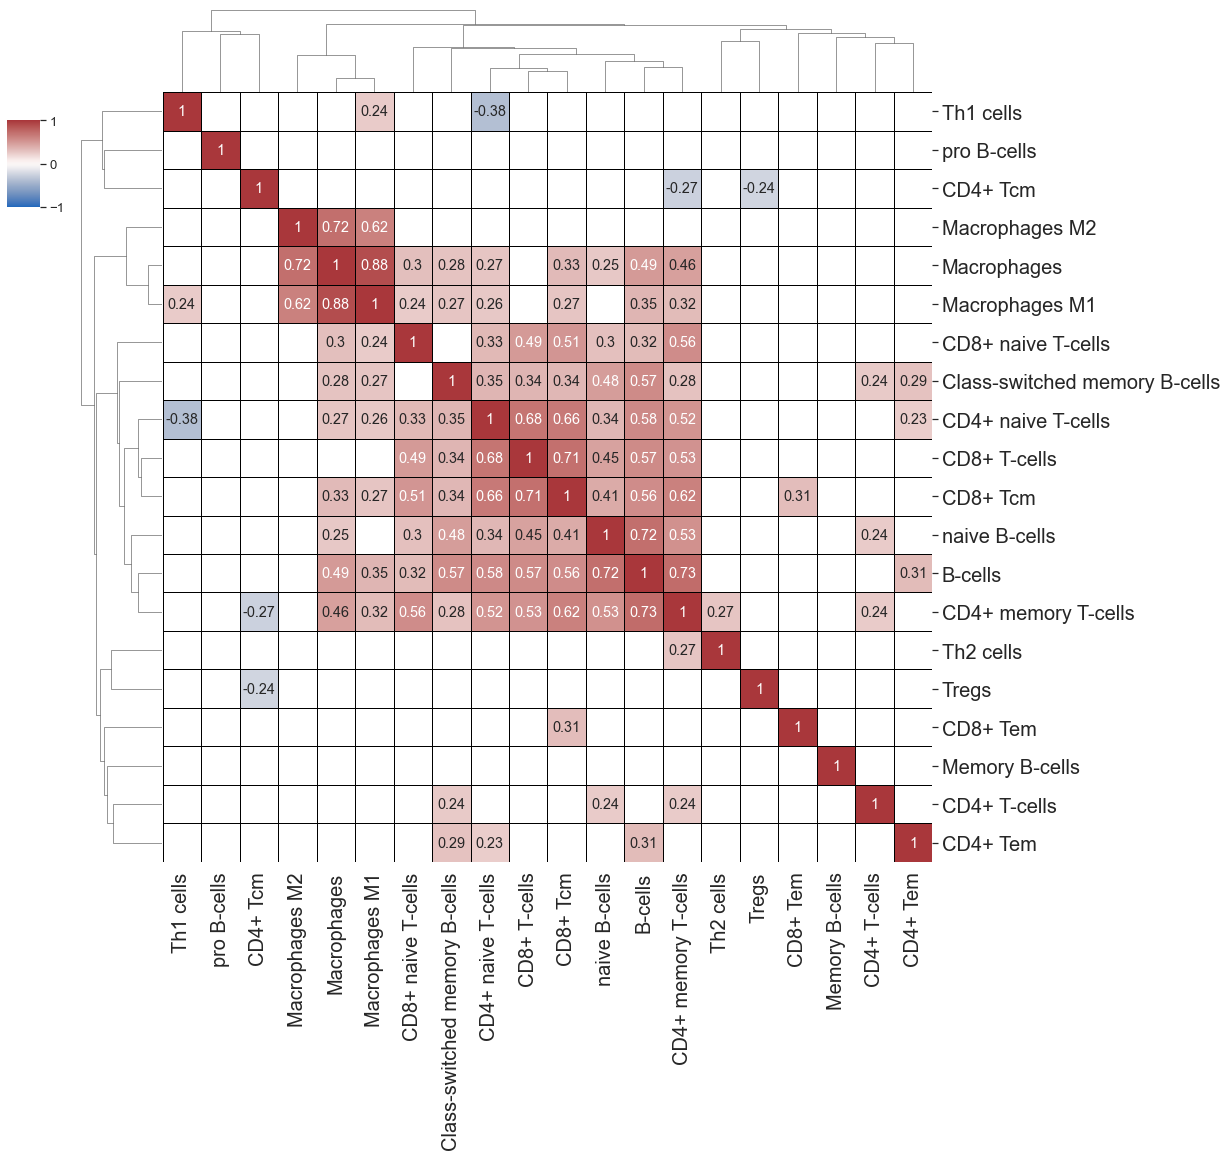

In [40]:
sns.set(style='white', font_scale=1.2)

alpha = 0.05
mask = ((fdr_mat >= alpha)*1).values 

# Plot clustered heatmap
g=sns.clustermap(df_corr, cmap="vlag", center=0, annot=True, mask=mask,\
                 linewidths=1, linecolor='black', figsize=(15,15),
                 vmin=-1, vmax=1, dendrogram_ratio=.1
                 )
g.cax.set_position([-.05, .8, .03, .08])

_=plt.setp(g.ax_heatmap.get_xticklabels(), fontsize=20)  # Set x label font size
_=plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=20)  # Set y label font size


## corr - level 2

In [46]:
sns.set(style='white', font_scale=1)

sel_cols = [
'B-cells', 'naive B-cells','Memory B-cells', 
'CD4+ T-cells', 'CD4+ naive T-cells', 'CD4+ memory T-cells', 
'CD8+ T-cells', 'CD8+ naive T-cells', 
'Tregs',
'Macrophages', 'Macrophages M1', 'Macrophages M2'
]

X1 = mg[sel_cols]

df_corr = X1.corr(method='spearman')
df_corr

B-cells  naive B-cells  Memory B-cells  CD4+ T-cells  \
B-cells              1.000000       0.715280        0.138161      0.206867   
naive B-cells        0.715280       1.000000        0.111149      0.240850   
Memory B-cells       0.138161       0.111149        1.000000     -0.014345   
CD4+ T-cells         0.206867       0.240850       -0.014345      1.000000   
CD4+ naive T-cells   0.577880       0.340670        0.130516      0.202326   
CD4+ memory T-cells  0.733015       0.533397        0.166741      0.236480   
CD8+ T-cells         0.566148       0.451411        0.111232      0.187768   
CD8+ naive T-cells   0.315506       0.296624        0.076565      0.178119   
Tregs                0.108725       0.024250       -0.171171      0.064508   
Macrophages          0.491558       0.252221        0.142248      0.141257   
Macrophages M1       0.349115       0.191401        0.131804      0.057631   
Macrophages M2       0.221407       0.050834        0.100450     -0.046395   

                     CD4+ naive T-cells  CD4+ memory T-cells  CD8+ T-cells  \
B-cells                        0.577880             0.733015      0.566148   
naive B-cells                  0.340670             0.533397      0.451411   
Memory B-cells                 0.130516             0.166741      0.111232   
CD4+ T-cells                   0.202326             0.236480      0.187768   
CD4+ naive T-cells             1.000000             0.523090      0.683143   
CD4+ memory T-cells            0.523090             1.000000      0.527890   
CD8+ T-cells                   0.683143             0.527890      1.000000   
CD8+ naive T-cells             0.334938             0.558227      0.485018   
Tregs                         -0.149305             0.228733     -0.132268   
Macrophages                    0.269419             0.456205      0.170383   
Macrophages M1                 0.256742             0.317214      0.145658   
Macrophages M2                -0.012260             0.133408     -0.087221   

                     CD8+ naive T-cells     Tregs  Macrophages  \
B-cells                        0.315506  0.108725     0.491558   
naive B-cells                  0.296624  0.024250     0.252221   
Memory B-cells                 0.076565 -0.171171     0.142248   
CD4+ T-cells                   0.178119  0.064508     0.141257   
CD4+ naive T-cells             0.334938 -0.149305     0.269419   
CD4+ memory T-cells            0.558227  0.228733     0.456205   
CD8+ T-cells                   0.485018 -0.132268     0.170383   
CD8+ naive T-cells             1.000000 -0.031690     0.298465   
Tregs                         -0.031690  1.000000     0.110421   
Macrophages                    0.298465  0.110421     1.000000   
Macrophages M1                 0.236962 -0.039357     0.882939   
Macrophages M2                 0.023293  0.200358     0.715853   

                     Macrophages M1  Macrophages M2  
B-cells                    0.349115        0.221407  
naive B-cells              0.191401        0.050834  
Memory B-cells             0.131804        0.100450  
CD4+ T-cells               0.057631       -0.046395  
CD4+ naive T-cells         0.256742       -0.012260  
CD4+ memory T-cells        0.317214        0.133408  
CD8+ T-cells               0.145658       -0.087221  
CD8+ naive T-cells         0.236962        0.023293  
Tregs                     -0.039357        0.200358  
Macrophages                0.882939        0.715853  
Macrophages M1             1.000000        0.623859  
Macrophages M2             0.623859        1.000000

In [47]:
pvals = []
df_p = X1

for i in range(len(sel_cols)):
    for j in range(len(sel_cols)):
        if i<j:
            x1 = df_p.iloc[:,i].values
            x2 = df_p.iloc[:,j].values
            mask = (~np.isnan(x1)) & (~np.isnan(x2)) 
            _, pval = spearmanr(x1[mask],x2[mask])
            pvals.append(pval)
        
from statsmodels.stats.multitest import multipletests
_,fdr,_,_ = multipletests(pvals, method='fdr_bh')

fdr_mat = pd.DataFrame(np.nan, index=range(len(sel_cols)), columns=range(len(sel_cols))) 

counter = -1
for i in range(len(sel_cols)):
    for j in range(len(sel_cols)):
        if i<j:
            counter += 1
            fdr_mat.iloc[i,j] = fdr[counter]
            fdr_mat.iloc[j,i] = fdr[counter] # just duplicate
        if i==j:
            fdr_mat.iloc[i,j] = 0

fdr_df = pd.DataFrame(fdr_mat.values, columns=sel_cols, index=sel_cols)
fdr_df

B-cells  naive B-cells  Memory B-cells  \
B-cells              0.000000e+00   3.924699e-17        0.222851   
naive B-cells        3.924699e-17   0.000000e+00        0.321145   
Memory B-cells       2.228512e-01   3.211447e-01        0.000000   
CD4+ T-cells         6.374749e-02   2.845840e-02        0.895877   
CD4+ naive T-cells   4.456711e-10   1.060575e-03        0.237260   
CD4+ memory T-cells  4.258092e-18   1.550327e-08        0.137133   
CD8+ T-cells         1.156170e-09   3.453096e-06        0.321145   
CD8+ naive T-cells   2.616198e-03   4.983053e-03        0.505329   
Tregs                3.243084e-01   8.353249e-01        0.129475   
Macrophages          2.898705e-07   2.068658e-02        0.214333   
Macrophages M1       7.715488e-04   8.708702e-02        0.236338   
Macrophages M2       4.403688e-02   6.707610e-01        0.365055   

                     CD4+ T-cells  CD4+ naive T-cells  CD4+ memory T-cells  \
B-cells                  0.063747        4.456711e-10         4.258092e-18   
naive B-cells            0.028458        1.060575e-03         1.550327e-08   
Memory B-cells           0.895877        2.372596e-01         1.371335e-01   
CD4+ T-cells             0.000000        6.973991e-02         3.026494e-02   
CD4+ naive T-cells       0.069740        0.000000e+00         2.952434e-08   
CD4+ memory T-cells      0.030265        2.952434e-08         0.000000e+00   
CD8+ T-cells             0.092697        3.643287e-15         2.199375e-08   
CD8+ naive T-cells       0.113947        1.288542e-03         2.090398e-09   
Tregs                    0.584910        1.951934e-01         3.683277e-02   
Macrophages              0.214333        1.268236e-02         2.720607e-06   
Macrophages M1           0.627772        1.858877e-02         2.564009e-03   
Macrophages M2           0.695090        8.993126e-01         2.363381e-01   

                     CD8+ T-cells  CD8+ naive T-cells     Tregs   Macrophages  \
B-cells              1.156170e-09        2.616198e-03  0.324308  2.898705e-07   
naive B-cells        3.453096e-06        4.983053e-03  0.835325  2.068658e-02   
Memory B-cells       3.211447e-01        5.053289e-01  0.129475  2.143335e-01   
CD4+ T-cells         9.269716e-02        1.139468e-01  0.584910  2.143335e-01   
CD4+ naive T-cells   3.643287e-15        1.288542e-03  0.195193  1.268236e-02   
CD4+ memory T-cells  2.199375e-08        2.090398e-09  0.036833  2.720607e-06   
CD8+ T-cells         0.000000e+00        4.268633e-07  0.236338  1.294754e-01   
CD8+ naive T-cells   4.268633e-07        0.000000e+00  0.791548  4.859436e-03   
Tregs                2.363381e-01        7.915479e-01  0.000000  3.211447e-01   
Macrophages          1.294754e-01        4.859436e-03  0.321145  0.000000e+00   
Macrophages M1       2.054212e-01        3.026494e-02  0.740615  4.192086e-35   
Macrophages M2       4.405726e-01        8.353249e-01  0.071272  3.924699e-17   

                     Macrophages M1  Macrophages M2  
B-cells                7.715488e-04    4.403688e-02  
naive B-cells          8.708702e-02    6.707610e-01  
Memory B-cells         2.363381e-01    3.650545e-01  
CD4+ T-cells           6.277717e-01    6.950899e-01  
CD4+ naive T-cells     1.858877e-02    8.993126e-01  
CD4+ memory T-cells    2.564009e-03    2.363381e-01  
CD8+ T-cells           2.054212e-01    4.405726e-01  
CD8+ naive T-cells     3.026494e-02    8.353249e-01  
Tregs                  7.406154e-01    7.127173e-02  
Macrophages            4.192086e-35    3.924699e-17  
Macrophages M1         0.000000e+00    4.699757e-12  
Macrophages M2         4.699757e-12    0.000000e+00

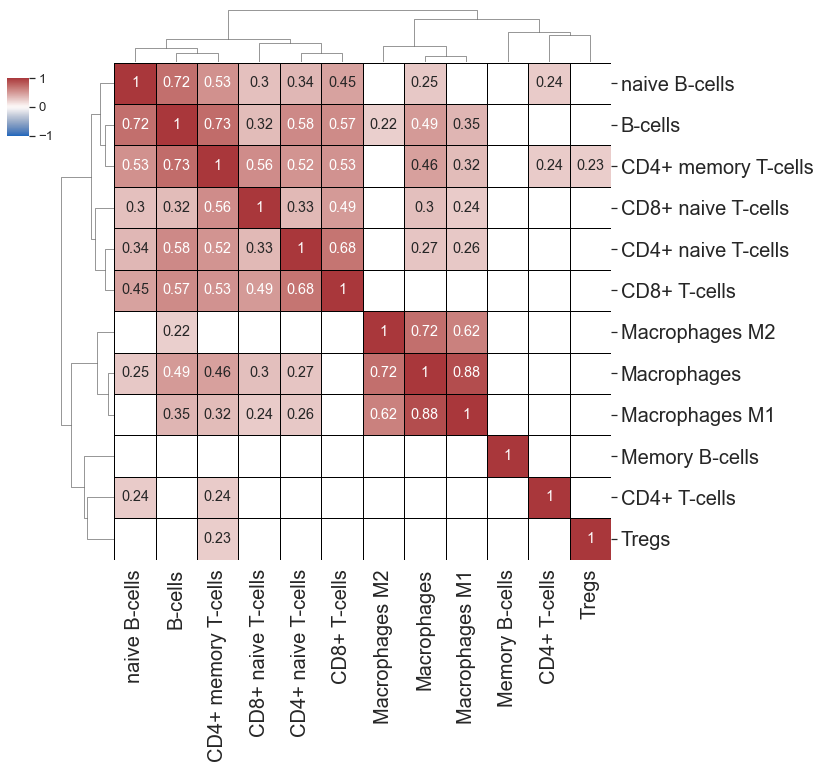

In [50]:
sns.set(style='white', font_scale=1.2)

alpha = 0.05
mask = ((fdr_mat >= alpha)*1).values 

# Plot clustered heatmap
g=sns.clustermap(df_corr, cmap="vlag", center=0, annot=True, mask=mask,\
                 linewidths=1, linecolor='black', figsize=(10,10),
                 vmin=-1, vmax=1, dendrogram_ratio=.1, 
                 metric='euclidean', method='ward'
                 )
g.cax.set_position([-.05, .8, .03, .08])

_=plt.setp(g.ax_heatmap.get_xticklabels(), fontsize=20)  # Set x label font size
_=plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=20)  # Set y label font size


## corr - level 1

In [59]:
sns.set(style='white', font_scale=1)

sel_cols = [
'B-cells', 
'CD4+ T-cells', 
'CD8+ T-cells', 
'Tregs',
'Macrophages', 
]

X1 = mg[sel_cols]

df_corr = X1.corr(method='spearman')
df_corr

B-cells  CD4+ T-cells  CD8+ T-cells     Tregs  Macrophages
B-cells       1.000000      0.206867      0.566148  0.108725     0.491558
CD4+ T-cells  0.206867      1.000000      0.187768  0.064508     0.141257
CD8+ T-cells  0.566148      0.187768      1.000000 -0.132268     0.170383
Tregs         0.108725      0.064508     -0.132268  1.000000     0.110421
Macrophages   0.491558      0.141257      0.170383  0.110421     1.000000

In [60]:
pvals = []
df_p = X1

for i in range(len(sel_cols)):
    for j in range(len(sel_cols)):
        if i<j:
            x1 = df_p.iloc[:,i].values
            x2 = df_p.iloc[:,j].values
            mask = (~np.isnan(x1)) & (~np.isnan(x2)) 
            _, pval = spearmanr(x1[mask],x2[mask])
            pvals.append(pval)
        
from statsmodels.stats.multitest import multipletests
_,fdr,_,_ = multipletests(pvals, method='fdr_bh')

fdr_mat = pd.DataFrame(np.nan, index=range(len(sel_cols)), columns=range(len(sel_cols))) 

counter = -1
for i in range(len(sel_cols)):
    for j in range(len(sel_cols)):
        if i<j:
            counter += 1
            fdr_mat.iloc[i,j] = fdr[counter]
            fdr_mat.iloc[j,i] = fdr[counter] # just duplicate
        if i==j:
            fdr_mat.iloc[i,j] = 0

fdr_df = pd.DataFrame(fdr_mat.values, columns=sel_cols, index=sel_cols)
fdr_df

B-cells  CD4+ T-cells  CD8+ T-cells     Tregs   Macrophages
B-cells       0.000000e+00      0.103026  1.401419e-09  0.289366  2.854785e-07
CD4+ T-cells  1.030263e-01      0.000000  1.264052e-01  0.505149  2.381483e-01
CD8+ T-cells  1.401419e-09      0.126405  0.000000e+00  0.243380  1.530164e-01
Tregs         2.893660e-01      0.505149  2.433797e-01  0.000000  2.893660e-01
Macrophages   2.854785e-07      0.238148  1.530164e-01  0.289366  0.000000e+00

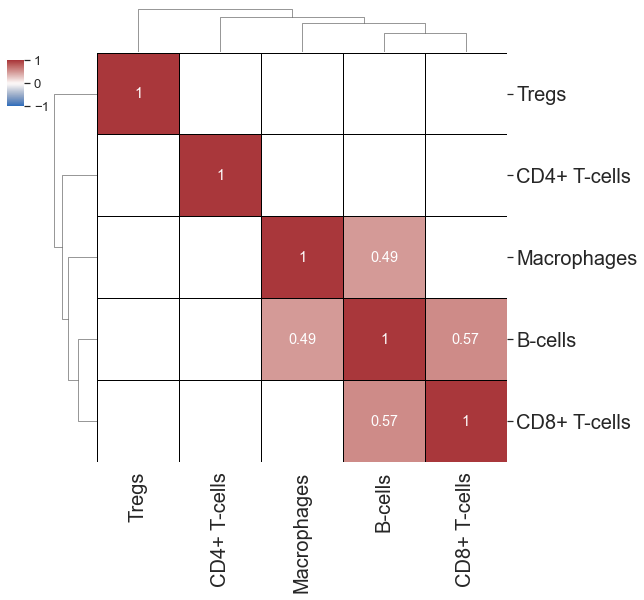

In [61]:
sns.set(style='white', font_scale=1.2)

alpha = 0.05
mask = ((fdr_mat >= alpha)*1).values 

# Plot clustered heatmap
g=sns.clustermap(df_corr, cmap="vlag", center=0, annot=True, mask=mask,\
                 linewidths=1, linecolor='black', figsize=(8,8),
                 vmin=-1, vmax=1, dendrogram_ratio=.1, 
                 metric='euclidean', method='ward'
                 )
g.cax.set_position([-.05, .8, .03, .08])

_=plt.setp(g.ax_heatmap.get_xticklabels(), fontsize=20)  # Set x label font size
_=plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=20)  # Set y label font size
